# **MIS710 Assignment 2 - Enhancing Restaurant Performance on FoodieBay: Data-Driven Insights and Predictive Models**

---


**Student:** Cam-Ha Nguyen

**ID:** s223546667


# **Coding Process**

# **1. Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Import Libraries**

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr, linregress # For correlation and linear regression

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.preprocessing import (
    MinMaxScaler,         # For Min-Max scaling of features
    StandardScaler,       # For standardization of features
    LabelEncoder          # For label encoding categorical variables
)
from sklearn.model_selection import (
    train_test_split,     # For splitting the dataset
    cross_val_score,      # For cross-validation
    GridSearchCV,         # For hyperparameter tuning using grid search
    cross_val_score,      # For cross-validation
    KFold                 # For k-fold cross-validation
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Import necessary modules for visualization
import sys
import six
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Import clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_samples, silhouette_score, mutual_info_score
from matplotlib.ticker import FixedLocator, FixedFormatter # Functions for visualizing silhouette score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

# **3. Load and Inspect Data**

## **3.1. Load the Dataset**

In [ ]:
# Load dataset for Assignment 2 - FoodieBay
foodiebay_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Assignment 2/foodiebay.csv")
print(foodiebay_dataset)

                                                     url  \
0      https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1      https://www.zomato.com/bangalore/the-burger-pl...   
2      https://www.zomato.com/bangalore/millet-mama-b...   
3      https://www.zomato.com/bangalore/red-onion-sha...   
4      https://www.zomato.com/bangalore/chaiywaala-da...   
...                                                  ...   
40125  https://www.zomato.com/bangalore/yumlane-brook...   
40126  https://www.zomato.com/bangalore/american-dess...   
40127  https://www.zomato.com/bangalore/new-arya-bhav...   
40128  https://www.zomato.com/bangalore/le-charcoal-x...   
40129  https://www.zomato.com/bangalore/kaati-zone-ch...   

                                                 address                 name  \
0      173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1      2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2      Next To Surana College, South

## **3.2. Explore the Dataset**

In [ ]:
# View sample size and number of columns
print(foodiebay_dataset.shape)
print('Sample size:', foodiebay_dataset.shape[0])
print('Number of columns:', foodiebay_dataset.shape[1])

(40130, 17)
Sample size: 40130
Number of columns: 17


In [ ]:
# Get quick overview of the foodiebay_dataset DataFrame
print(foodiebay_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

In [ ]:
foodiebay_dataset.head()

url  \
0  https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1  https://www.zomato.com/bangalore/the-burger-pl...   
2  https://www.zomato.com/bangalore/millet-mama-b...   
3  https://www.zomato.com/bangalore/red-onion-sha...   
4  https://www.zomato.com/bangalore/chaiywaala-da...   

                                             address                 name  \
0  173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1  2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2  Next To Surana College, South End Circle, Basa...          Millet Mama   
3  Money Chambers Double Road, Shanti Nagar, Bang...            Red Onion   
4  Shop 67, 69, 70, Inside Ramaiah Campus, New BE...  Chaiywaala Da Dhaba   

                              phone               location      rest_type  \
0  +91 9886986111\r\n+91 8550051111      Bannerghatta Road           Cafe   
1                    +91 9108974600  Koramangala 1st Block    Quick Bites   
2  +91 7411918648\r\n+91 9986975625           Basavanagudi    Quick Bites   
3                    +91 8867253669           Shanti Nagar  Casual Dining   
4    +91 8217431260\n+91 7975991975           New BEL Road           Cafe   

                                cuisines  \
0                                   Cafe   
1         Burger, Continental, Fast Food   
2             South Indian, Healthy Food   
3  Chinese, North Indian, Biryani, Kebab   
4                              Cafe, Tea   

                                           menu_item listed_in_type  \
0                                                 []          Cafes   
1                                                 []       Dine-out   
2                                                 []       Delivery   
3  ['Hyderabadi Biryani', 'Special Veg Combo', 'S...       Delivery   
4                                                 []       Dine-out   

          listed_in_city online_order book_table  ave_cost_for_two  \
0               JP Nagar           No         No             700.0   
1  Koramangala 5th Block          Yes         No             400.0   
2              Jayanagar          Yes         No             200.0   
3           Brigade Road          Yes        Yes            1200.0   
4           New BEL Road          Yes         No             250.0   

                                          dish_liked  votes  \
0                                                NaN     13   
1                                                NaN     28   
2                                                NaN     18   
3  Fish, Dumplings, Biryani, Paneer Tikka Masala,...    550   
4  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...     67   

   ave_review_ranking  rate  
0                4.75   3.6  
1                4.50   3.8  
2                4.00   3.9  
3                4.80   4.3  
4                3.00   3.7

In [ ]:
foodiebay_dataset.tail()

url  \
40125  https://www.zomato.com/bangalore/yumlane-brook...   
40126  https://www.zomato.com/bangalore/american-dess...   
40127  https://www.zomato.com/bangalore/new-arya-bhav...   
40128  https://www.zomato.com/bangalore/le-charcoal-x...   
40129  https://www.zomato.com/bangalore/kaati-zone-ch...   

                                                 address                name  \
40125  ACES Layout Road, Kundanahalli Gate, Brookefie...             Yumlane   
40126  18, 2nd H Cross, Dodda Banaswadi Main Road, Ne...   American Desserts   
40127                            113, MG Road, Bangalore     New Arya Bhavan   
40128  2334, Aarush Arcade, 17th Cross, 1st Sector, H...  Le Charcoal Xpress   
40129       48, Triumph Towers, Church Street, Bangalore          Kaati Zone   

                                      phone       location  \
40125                                   NaN    Brookefield   
40126                        +91 9686415784      Banaswadi   
40127                          080 40913062        MG Road   
40128      +91 9036300066\r\n+91 9036300088            HSR   
40129  +91 9148398566\r\r\r\r\n080 65660000  Church Street   

                rest_type                              cuisines  \
40125  Takeaway, Delivery                      Pizza, Fast Food   
40126  Takeaway, Delivery                      Desserts, Bakery   
40127         Quick Bites  Street Food, Beverages, North Indian   
40128         Quick Bites          Arabian, BBQ, Rolls, Chinese   
40129         Quick Bites             Fast Food, Biryani, Rolls   

                                               menu_item listed_in_type  \
40125                                                 []       Delivery   
40126                                                 []       Delivery   
40127                                                 []       Delivery   
40128                                                 []       Delivery   
40129  ['Chilli Paneer Roll', 'Paneer Tikka Roll', 'C...       Delivery   

      listed_in_city online_order book_table  ave_cost_for_two  \
40125     Whitefield           No         No               NaN   
40126   Kammanahalli          Yes         No             500.0   
40127        MG Road           No         No             300.0   
40128      Bellandur          Yes         No             500.0   
40129   Brigade Road          Yes         No             350.0   

                                              dish_liked  votes  \
40125                                                NaN     25   
40126                                                NaN     23   
40127                                                NaN     23   
40128  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...    162   
40129             Rolls, Chicken Tikka Roll, Cheese Roll    163   

       ave_review_ranking  rate  
40125            2.000000   2.9  
40126            3.454545   3.6  
40127            3.454545   3.1  
40128            3.500000   4.0  
40129            3.254808   3.1

In [ ]:
foodiebay_dataset.sample(10)

url  \
39931  https://www.zomato.com/bangalore/re-cess-hilto...   
17734  https://www.zomato.com/bangalore/samskruti-san...   
28820  https://www.zomato.com/bangalore/la-ola-marath...   
9374   https://www.zomato.com/bangalore/chaatimes-mal...   
22600  https://www.zomato.com/bangalore/toscano-malle...   
15241  https://www.zomato.com/bangalore/surabhi-resta...   
39493  https://www.zomato.com/bangalore/biryani-knigh...   
6929   https://www.zomato.com/bangalore/goli-vada-pav...   
9121   https://www.zomato.com/bangalore/gfc-biryani-b...   
6180   https://www.zomato.com/bangalore/hotel-new-kar...   

                                                 address  \
39931  Hilton Bangalore Embassy GolfLinks, Embassy Go...   
17734  2, Ashoka Pillar Circle, 2nd Block, Jayanagar,...   
28820  83/2, 5th Main, Shantiniketan Layout, Munnekol...   
9374   57, East Park Road, 15 Cross, Malleshwaram, Ba...   
22600  1st Floor, Orion Mall, Brigade Gateway, Dr. Ra...   
15241  Nirvana Tradewinds, Ground Floor Opposite K.S....   
39493                         BTM & J P Nagar, Bangalore   
6929   14, Devatha Plaza, Opposite Bishop Cotton Scho...   
9121   6, 29th Main, 12 A Main Road, NS Palya, BTM 2n...   
6180                           Hennur, Hennur, Bangalore   

                                               name  \
39931  re:cess - Hilton Bangalore Embassy GolfLinks   
17734                   Samskruti - Sanman Gardenia   
28820                                        La Ola   
9374                                      Chaatimes   
22600                                       Toscano   
15241                            Surabhi Restaurant   
39493                               Biryani Knights   
6929                            Goli Vada Pav No. 1   
9121                                    GFC Biryani   
6180                             Hotel New Karavali   

                                  phone        location           rest_type  \
39931      080 66799999\n+91 7353759841          Domlur  Casual Dining, Bar   
17734    080 26570711\r\n+91 9663684499       Jayanagar       Casual Dining   
28820                    +91 8546933913    Marathahalli            Delivery   
9374                     +91 8884272277    Malleshwaram         Quick Bites   
22600      080 22682055\n+91 7619320073    Malleshwaram       Casual Dining   
15241                    +91 9739777148      Hosur Road       Casual Dining   
39493  +91 9632111158\r\n+91 9632111162        JP Nagar            Delivery   
6929     +91 9945237893\n+91 9945378977  Residency Road         Quick Bites   
9121                     +91 9066431367             BTM         Quick Bites   
6180                     +91 9686149242          Hennur  Casual Dining, Bar   

                                                cuisines  \
39931  South Indian, North Indian, Continental, European   
17734                North Indian, Chinese, South Indian   
28820                   Fast Food, Chinese, North Indian   
9374                              Street Food, Fast Food   
22600                      Italian, Salad, Mediterranean   
15241  South Indian, North Indian, Chinese, Desserts,...   
39493                                            Biryani   
6929                                         Street Food   
9121                                             Biryani   
6180         Chinese, Mangalorean, Seafood, North Indian   

                                               menu_item listed_in_type  \
39931                                                 []  Pubs and bars   
17734                                                 []       Dine-out   
28820  ['Veg Burgers', 'Veg Jumbo Burgers', 'Chicken ...       Delivery   
9374                                                  []       Delivery   
22600                                                 []       Dine-out   
15241                                                 []       Dine-out   
39493                                                 []       Delive

## **3.3. Inspect and Handle Missing Data**

In [ ]:
# Drop irrelevant variables, keep the 'url' column as unique identifier for each restaurant to check for duplicates later
foodiebay_dataset = foodiebay_dataset.drop(columns=['address', 'name', 'phone', 'menu_item'])

In [ ]:
# Calculate and display the number of missing values in each column of the foodiebay_dataset
print(foodiebay_dataset.isna().sum().sort_values(ascending=False))

dish_liked            22779
rate                   8336
ave_review_ranking     6379
ave_cost_for_two        240
cuisines                 18
url                       0
location                  0
rest_type                 0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
votes                     0
dtype: int64


In [ ]:
# Remove rows which have missing data in the 'rate' column
foodiebay_dataset.dropna(subset=['rate'], inplace=True)

print('Sample size:', foodiebay_dataset.shape[0])
print('Number of columns:', foodiebay_dataset.shape[1])

Sample size: 31794
Number of columns: 13


In [ ]:
# Calculate and display the number of missing values in each column after deleting rows with missing 'rate' data
print(foodiebay_dataset.isna().sum().sort_values(ascending=False))

dish_liked            14551
ave_review_ranking      914
ave_cost_for_two        178
cuisines                  8
url                       0
location                  0
rest_type                 0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
votes                     0
rate                      0
dtype: int64


In [ ]:
# Calculate the percentage of null values in each column and format with 2 decimal points
null_percentages = (foodiebay_dataset.isna().sum() / foodiebay_dataset.shape[0] * 100).round(2)

# Sort the percentages in descending order
null_percentages = null_percentages.sort_values(ascending=False)

# Print the null percentages
print(null_percentages)

dish_liked            45.77
ave_review_ranking     2.87
ave_cost_for_two       0.56
cuisines               0.03
url                    0.00
location               0.00
rest_type              0.00
listed_in_type         0.00
listed_in_city         0.00
online_order           0.00
book_table             0.00
votes                  0.00
rate                   0.00
dtype: float64


In [ ]:
# Calculate the threshold for acceptable missing data based on 5% of the total number of rows in the foodiebay_dataset
threshold = round(len(foodiebay_dataset) * 0.05)
print(f'Number of maximum columns that can be dropped: {threshold}')

Number of maximum columns that can be dropped: 1590


In [ ]:
 # Remove rows with missing data in 'cuisines', 'ave_cost_for_two', 'ave_review_ranking' columns
foodiebay_dataset.dropna(subset=['cuisines', 'ave_cost_for_two', 'ave_review_ranking'], inplace=True)
print(foodiebay_dataset.isna().sum().sort_values(ascending=False))

dish_liked            13663
url                       0
location                  0
rest_type                 0
cuisines                  0
listed_in_type            0
listed_in_city            0
online_order              0
book_table                0
ave_cost_for_two          0
votes                     0
ave_review_ranking        0
rate                      0
dtype: int64


In [ ]:
# Replace null values in the 'dish_liked' column with "None"
foodiebay_dataset['dish_liked'].fillna('None', inplace=True)

# Split the 'dish_liked' values by comma and count the number of dishes liked
foodiebay_dataset['num_dishes_liked'] = foodiebay_dataset['dish_liked'].apply(lambda x: len(x.split(', ')) if x != 'None' else 0)

In [ ]:
# Split the 'cuisines' values by comma and count the number of dishes liked
foodiebay_dataset['num_cuisines'] = foodiebay_dataset['cuisines'].apply(lambda x: len(x.split(', ')))

foodiebay_dataset.sample(10)

url  \
27499  https://www.zomato.com/bangalore/cake-of-the-d...   
4173   https://www.zomato.com/bangalore/momo-jojo-btm...   
33092  https://www.zomato.com/bangalore/taste-of-kera...   
36897  https://www.zomato.com/bangalore/hotel-dil-coo...   
9178   https://www.zomato.com/bangalore/enerjuvate-st...   
5998   https://www.zomato.com/bangalore/golkonda-chim...   
20676  https://www.zomato.com/bangalore/chaatimes-mal...   
23495  https://www.zomato.com/bangalore/iyengars-bake...   
21061  https://www.zomato.com/bangalore/royal-savera-...   
29571  https://www.zomato.com/bangalore/99-variety-do...   

                    location      rest_type  \
27499           Basavanagudi         Bakery   
4173                     BTM    Quick Bites   
33092         Residency Road  Casual Dining   
36897                 Ulsoor    Quick Bites   
9178   Koramangala 4th Block           Cafe   
5998            Marathahalli  Casual Dining   
20676           Malleshwaram    Quick Bites   
23495          Richmond Road         Bakery   
21061            Frazer Town  Casual Dining   
29571                    HSR    Quick Bites   

                                                cuisines listed_in_type  \
27499                                             Bakery       Desserts   
4173                             Chinese, Tibetan, Momos       Delivery   
33092                                    Kerala, Seafood       Dine-out   
36897                         North Indian, South Indian       Delivery   
9178   Cafe, Continental, Healthy Food, Sandwich, Piz...       Delivery   
5998                      Biryani, North Indian, Mughlai       Delivery   
20676                             Street Food, Fast Food       Dine-out   
23495                                             Bakery       Desserts   
21061                              North Indian, Chinese       Dine-out   
29571            South Indian, North Indian, Street Food       Delivery   

              listed_in_city online_order book_table  ave_cost_for_two  \
27499           Basavanagudi           No         No             150.0   
4173               Jayanagar          Yes         No             300.0   
33092          Church Street           No         No             600.0   
36897            Indiranagar          Yes         No             300.0   
9178   Koramangala 7th Block          Yes        Yes             800.0   
5998            Marathahalli          Yes        Yes             850.0   
20676           Malleshwaram          Yes         No             200.0   
23495           Lavelle Road           No         No             200.0   
21061            Frazer Town           No         No             600.0   
29571                    HSR          Yes         No             250.0   

                                              dish_liked  votes  \
27499                                               None      4   
4173                                                None      6   
33092                                       Appam, Thali     48   
36897                                               None     78   
9178   Pizza, Healthy Breakfast, Momos, Enchiladas, A...    469   
5998   Paneer Tikka, Carrot Halwa, Rolls, Mutton Biry...   1824   
20676  Dabeli, Masala Poori, Misal Pav, Dahipuri, Pap...    112   
23495                                               None     14   
21061                                               None     14   
29571                                               None    101   

       ave_review_ranking  rate  num_dishes_liked  num_cuisines  
27499            1.000000   3.2                 0             1  
4173             3.500000   3.4                 0             3  
33092            2.000000   2.2                 2             2  
36897            1.000000   3.6                 0             2  
9178             3.952381   4.4                 7             7  
5998             3.117647   3.5                 7             3  
20676            3.500000   3.9  

In [ ]:
# Remove the 'cuisines' and 'dish_liked' column
#foodiebay_dataset.drop(columns=['cuisines', 'dish_liked'], inplace=True)

# Move the 'num_cuisines' and 'num_dishes_liked' columns to the desired position
foodiebay_dataset = foodiebay_dataset[['url', 'location', 'rest_type', 'listed_in_type', 'listed_in_city', 'cuisines', 'num_cuisines', 'dish_liked', 'num_dishes_liked', 'online_order', 'book_table', 'ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']]

## **3.4. Inspect and Remove Duplicates**

In [ ]:
# Check for duplicate rows based on all columns
duplicate_rows = foodiebay_dataset[foodiebay_dataset.duplicated(keep=False)]

# Set options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Print out summary for duplicated rows
print('Number of duplicate rows based on all columns:', len(duplicate_rows))

print('\nDuplicate rows based on all columns:')
print(duplicate_rows)

Number of duplicate rows based on all columns: 0

Duplicate rows based on all columns:
Empty DataFrame
Columns: [url, location, rest_type, listed_in_type, listed_in_city, cuisines, num_cuisines, dish_liked, num_dishes_liked, online_order, book_table, ave_cost_for_two, votes, ave_review_ranking, rate]
Index: []


In [ ]:
# Remove 'url' column after checking for duplicates
foodiebay_dataset = foodiebay_dataset.drop(columns=['url'])

## **3.5. Inspect and Handle Outliers**

In [ ]:
# Descriptive stats for numerical variables
foodiebay_dataset.describe().T

count        mean         std   min    25%         50%    75%      max
num_cuisines        30699.0    2.572462    1.310531   1.0    2.0    2.000000    3.0      8.0
num_dishes_liked    30699.0    2.992540    3.121914   0.0    0.0    2.000000    7.0      7.0
ave_cost_for_two    30699.0  550.862113  340.769437  40.0  300.0  500.000000  700.0   2500.0
votes               30699.0  291.534806  667.401398   0.0   22.0   72.000000  254.0  12121.0
ave_review_ranking  30699.0    3.587196    0.856374   1.0    3.0    3.714286    4.1      5.0
rate                30699.0    3.664875    0.432474   1.8    3.4    3.700000    4.0      4.9

In [ ]:
# Define numeric columns to check for outliers
columns_to_check = foodiebay_dataset.select_dtypes(include=['number']).columns.tolist()

print(columns_to_check)

['num_cuisines', 'num_dishes_liked', 'ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']


In [ ]:
# Calculate the IQR for each column
Q1 = foodiebay_dataset[columns_to_check].quantile(0.25)
Q3 = foodiebay_dataset[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
outlier_threshold = 1.5

# Find outliers in each column
outliers = ((foodiebay_dataset[columns_to_check] < (Q1 - outlier_threshold * IQR)) |
            (foodiebay_dataset[columns_to_check] > (Q3 + outlier_threshold * IQR)))

# Print the number of rows with outliers
num_rows_with_outliers = outliers.any(axis=1).sum()
print('Number of rows with outliers:', num_rows_with_outliers)

# Print rows with outliers
rows_with_outliers = foodiebay_dataset[outliers.any(axis=1)]
print('\nRows with outliers:')
print(rows_with_outliers)

Number of rows with outliers: 6580

Rows with outliers:
                    location           rest_type listed_in_type         listed_in_city                                           cuisines  num_cuisines                                         dish_liked  num_dishes_liked online_order book_table  ave_cost_for_two  votes  ave_review_ranking  rate
5               Kalyan Nagar                Cafe          Cafes           Kammanahalli  Cafe, Continental, Italian, Burger, Pizza, Sal...             7  Pizza, Burgers, Chicken Pasta, Minestrone Soup...                 7          Yes         No             650.0    140            3.500000   3.8
12     Koramangala 1st Block                Cafe          Cafes  Koramangala 4th Block                                  Cafe, Continental             2  English Breakfast, Waffles, Chocolate Cake, Fr...                 7          Yes         No             700.0    778            4.000000   4.1
18              Malleshwaram  Casual Dining, Bar       D

In [ ]:
# Initialize an empty dictionary to store the count of outliers for each column
outlier_counts = {}

# Calculate and count outliers for each numeric column
for column in columns_to_check:
    # Calculate the IQR for the column
    Q1 = foodiebay_dataset[column].quantile(0.25)
    Q3 = foodiebay_dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds for the column
    outlier_threshold = 1.5

    # Find outliers in the column
    column_outliers = ((foodiebay_dataset[column] < (Q1 - outlier_threshold * IQR)) |
                       (foodiebay_dataset[column] > (Q3 + outlier_threshold * IQR)))

    # Count the number of outliers in the column
    num_outliers = column_outliers.sum()

    # Store the count in the dictionary
    outlier_counts[column] = num_outliers

# Print the number of outliers for each numeric column
print('Number of outliers in each column:')
for column, count in outlier_counts.items():
    print(f'{column}: {count}')

Number of outliers in each column:
num_cuisines: 2264
num_dishes_liked: 0
ave_cost_for_two: 1301
votes: 3695
ave_review_ranking: 780
rate: 160


In [ ]:
print(foodiebay_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30699 entries, 0 to 40129
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            30699 non-null  object 
 1   rest_type           30699 non-null  object 
 2   listed_in_type      30699 non-null  object 
 3   listed_in_city      30699 non-null  object 
 4   cuisines            30699 non-null  object 
 5   num_cuisines        30699 non-null  int64  
 6   dish_liked          30699 non-null  object 
 7   num_dishes_liked    30699 non-null  int64  
 8   online_order        30699 non-null  object 
 9   book_table          30699 non-null  object 
 10  ave_cost_for_two    30699 non-null  float64
 11  votes               30699 non-null  int64  
 12  ave_review_ranking  30699 non-null  float64
 13  rate                30699 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 3.5+ MB
None


# **4. Conduct Exploratory Data Analysis - EDA**

## **4.1. Univariate Analysis**

### **4.1.1. Explore numerical variables**

In [ ]:
# Set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Get descriptive statistics for all numerical variables
foodiebay_dataset.describe().T

count   mean    std   min    25%    50%    75%      max
num_cuisines       30699.00   2.57   1.31  1.00   2.00   2.00   3.00     8.00
num_dishes_liked   30699.00   2.99   3.12  0.00   0.00   2.00   7.00     7.00
ave_cost_for_two   30699.00 550.86 340.77 40.00 300.00 500.00 700.00  2500.00
votes              30699.00 291.53 667.40  0.00  22.00  72.00 254.00 12121.00
ave_review_ranking 30699.00   3.59   0.86  1.00   3.00   3.71   4.10     5.00
rate               30699.00   3.66   0.43  1.80   3.40   3.70   4.00     4.90

**'rate' column - target variable**

In [ ]:
# Get descriptive statistics for the 'rate' column in the foodiebay_dataset
foodiebay_dataset.rate.describe()

count   30699.00
mean        3.66
std         0.43
min         1.80
25%         3.40
50%         3.70
75%         4.00
max         4.90
Name: rate, dtype: float64

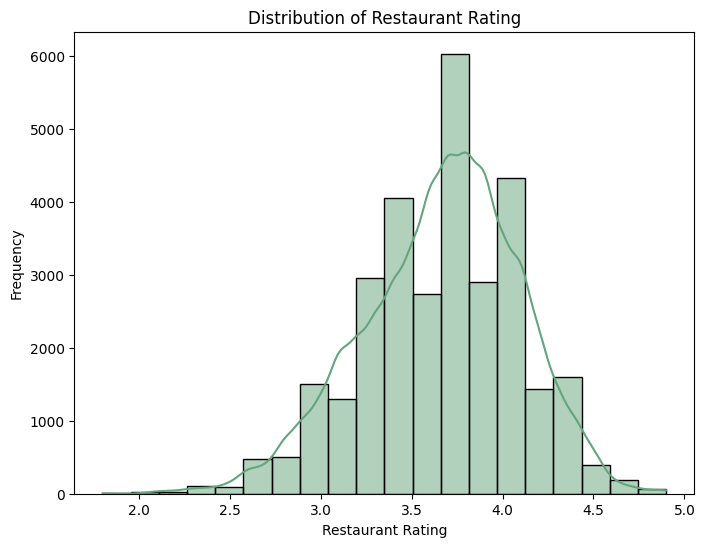

In [ ]:
# Create a histogram to visualize the distribution of 'rate'
plt.figure(figsize=(8, 6))
sns.histplot(data=foodiebay_dataset, x='rate', bins=20, kde=True, color='#64A57B')
plt.title('Distribution of Restaurant Rating')
plt.xlabel('Restaurant Rating')
plt.ylabel('Frequency')
plt.show()

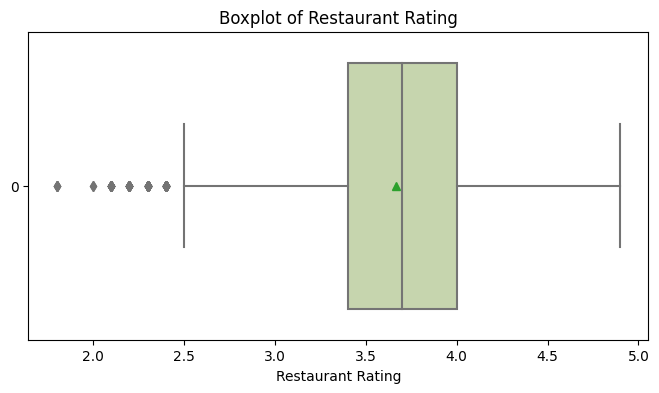

In [ ]:
# Create a boxplot to visualize the distribution of 'rate'
plt.figure(figsize=(8, 4))
sns.boxplot(data=foodiebay_dataset['rate'], showmeans=True, color='#C8DBA8', orient='h')
plt.title('Boxplot of Restaurant Rating')
plt.xlabel('Restaurant Rating')
plt.show()

**'num_cuisines' column**

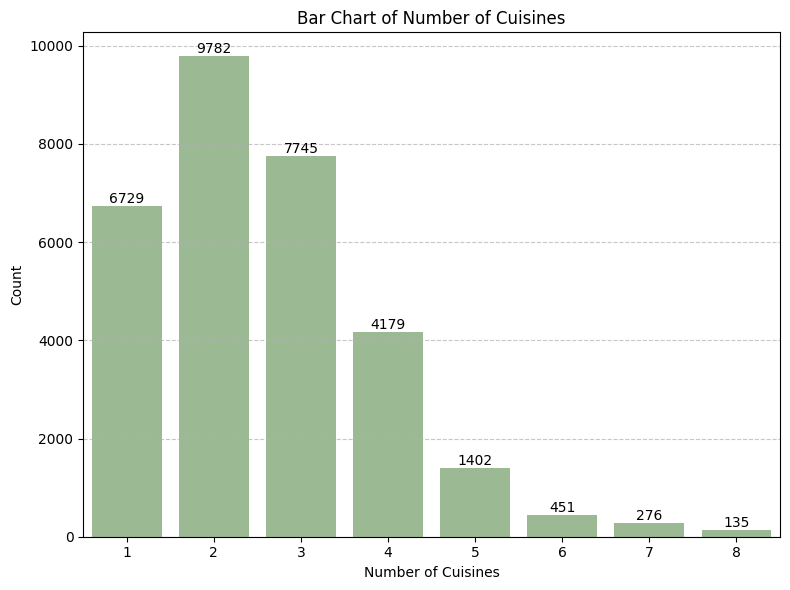

In [ ]:
# Create a bar chart to visualize the distribution of 'num_cuisines'
plt.figure(figsize=(8, 6))
sns.countplot(data=foodiebay_dataset, x='num_cuisines', color='#97C08E')
plt.title('Bar Chart of Number of Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**'cuisine' column**

In [ ]:
# Split the "cuisines" column and create a list of all cuisines
all_cuisines = foodiebay_dataset['cuisines'].str.split(', ').explode().reset_index(drop=True)

In [ ]:
# Count the number of unique cuisines
unique_cuisines_count = all_cuisines.nunique()
print("Number of unique cuisines:", unique_cuisines_count)

Number of unique cuisines: 97


In [ ]:
# Get the Top 10 cuisines by frequency
top_10_cuisines = all_cuisines.value_counts().head(10)
print("Top 10 cuisines:")
print(top_10_cuisines)

Top 10 cuisines:
North Indian    14502
Chinese         11098
South Indian     5736
Fast Food        4831
Biryani          4641
Cafe             3415
Continental      3081
Italian          2204
Beverages        1991
Desserts         1590
Name: cuisines, dtype: int64


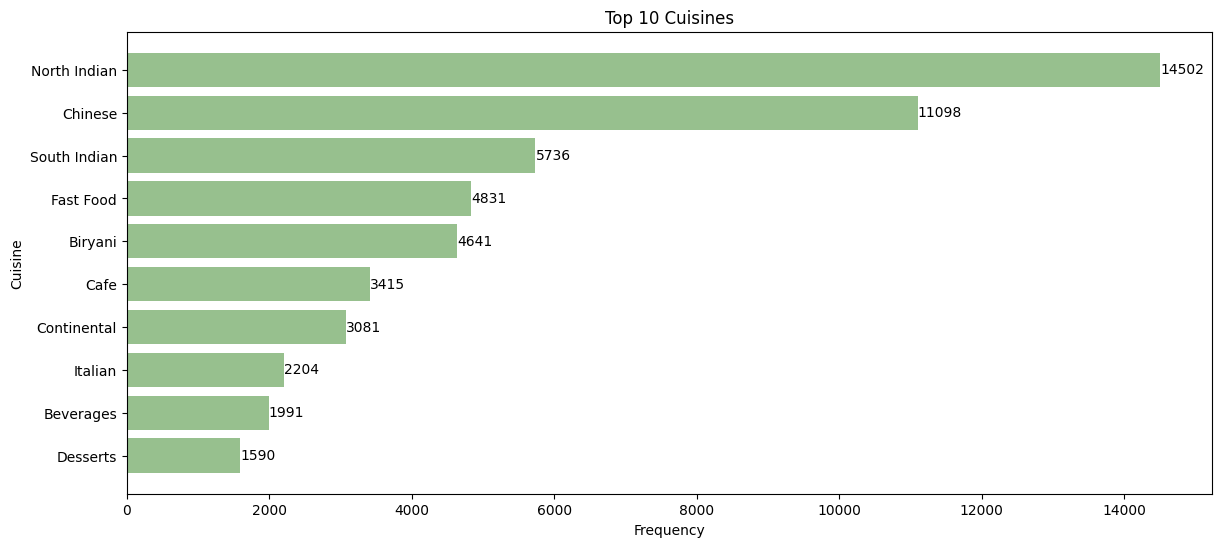

In [ ]:
# Create a horizontal bar chart for top cuisines
plt.figure(figsize=(14, 6))
plt.barh(top_10_cuisines.index, top_10_cuisines.values, color='#97C08E')
plt.xlabel('Frequency')
plt.ylabel('Cuisine')
plt.title('Top 10 Cuisines')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent cuisine at the top

# Annotate the count on each bar
for i, v in enumerate(top_10_cuisines.values):
    plt.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

**'num_dishes_liked' column**

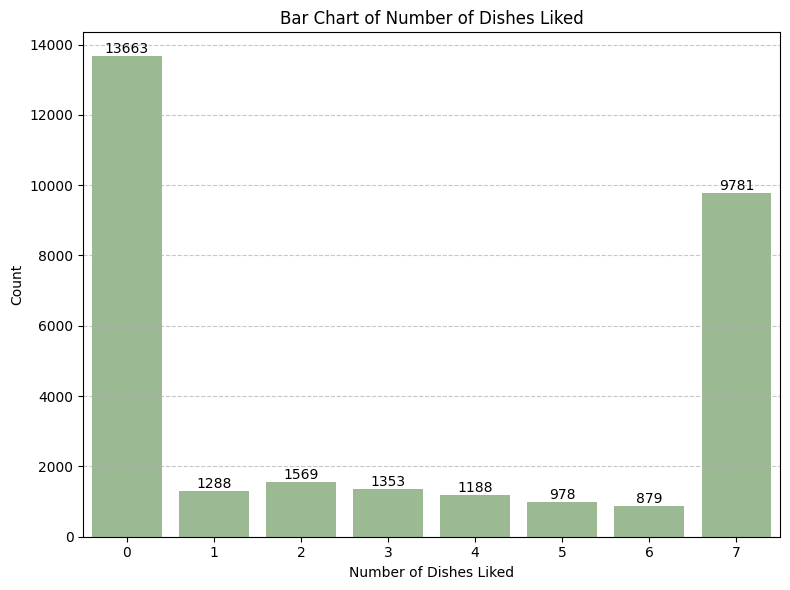

In [ ]:
# Create a bar chart to visualize the distribution of 'num_dishes_liked'
plt.figure(figsize=(8, 6))
sns.countplot(data=foodiebay_dataset, x='num_dishes_liked', color='#97C08E')
plt.title('Bar Chart of Number of Dishes Liked')
plt.xlabel('Number of Dishes Liked')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**'dish_liked' column**

In [ ]:
# Replace 'None' values in the 'dish_liked' column with NaN
foodiebay_dataset['dish_liked'] = foodiebay_dataset['dish_liked'].replace('None', float('nan'))

# Split the "dish_liked" column and create a list of all dishes liked
all_dishes_liked = foodiebay_dataset['dish_liked'].str.split(', ').explode().reset_index(drop=True)

In [ ]:
# Get the top 10 dishes liked by frequency
top_10_dishes_liked = all_dishes_liked.value_counts().head(10)
print("Top 10 dishes liked:")
print(top_10_dishes_liked)

Top 10 dishes liked:
Pasta              2269
Burgers            2153
Biryani            1716
Pizza              1441
Coffee             1359
Paratha            1328
Noodles            1199
Chicken Biryani    1177
Mocktails          1137
Salads             1115
Name: dish_liked, dtype: int64


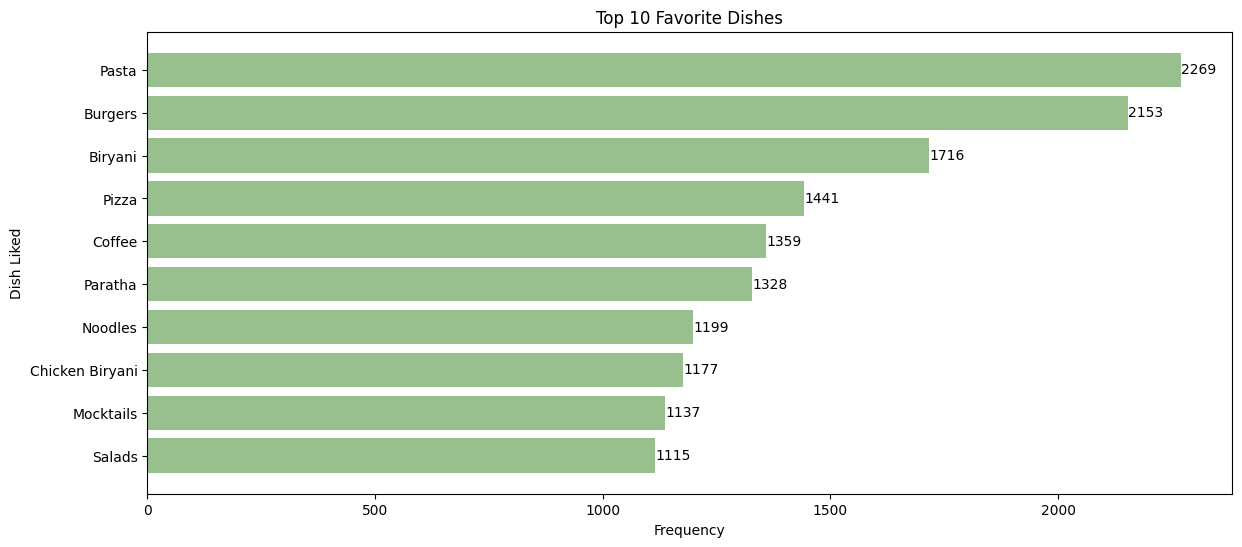

In [ ]:
# Create a horizontal bar chart for top dishes liked
plt.figure(figsize=(14, 6))
plt.barh(top_10_dishes_liked.index, top_10_dishes_liked.values, color='#97C08E')
plt.xlabel('Frequency')
plt.ylabel('Dish Liked')
plt.title('Top 10 Favorite Dishes')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent dish liked at the top

# Annotate the count on each bar
for i, v in enumerate(top_10_dishes_liked.values):
    plt.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.show()

In [ ]:
# Replace NaN values in the 'dish_liked' column back to 'None'
foodiebay_dataset['dish_liked'] = foodiebay_dataset['dish_liked'].fillna('None')

**'ave_cost_for_two' column**

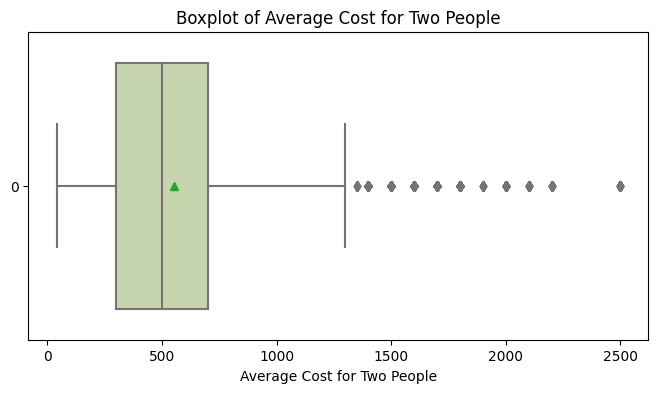

In [ ]:
# Create a boxplot to visualize the distribution of 'ave_cost_for_two'
plt.figure(figsize=(8, 4))
sns.boxplot(data=foodiebay_dataset['ave_cost_for_two'], showmeans=True, color='#C8DBA8', orient='h')
plt.title('Boxplot of Average Cost for Two People')
plt.xlabel('Average Cost for Two People')
plt.show()

**'votes' column**

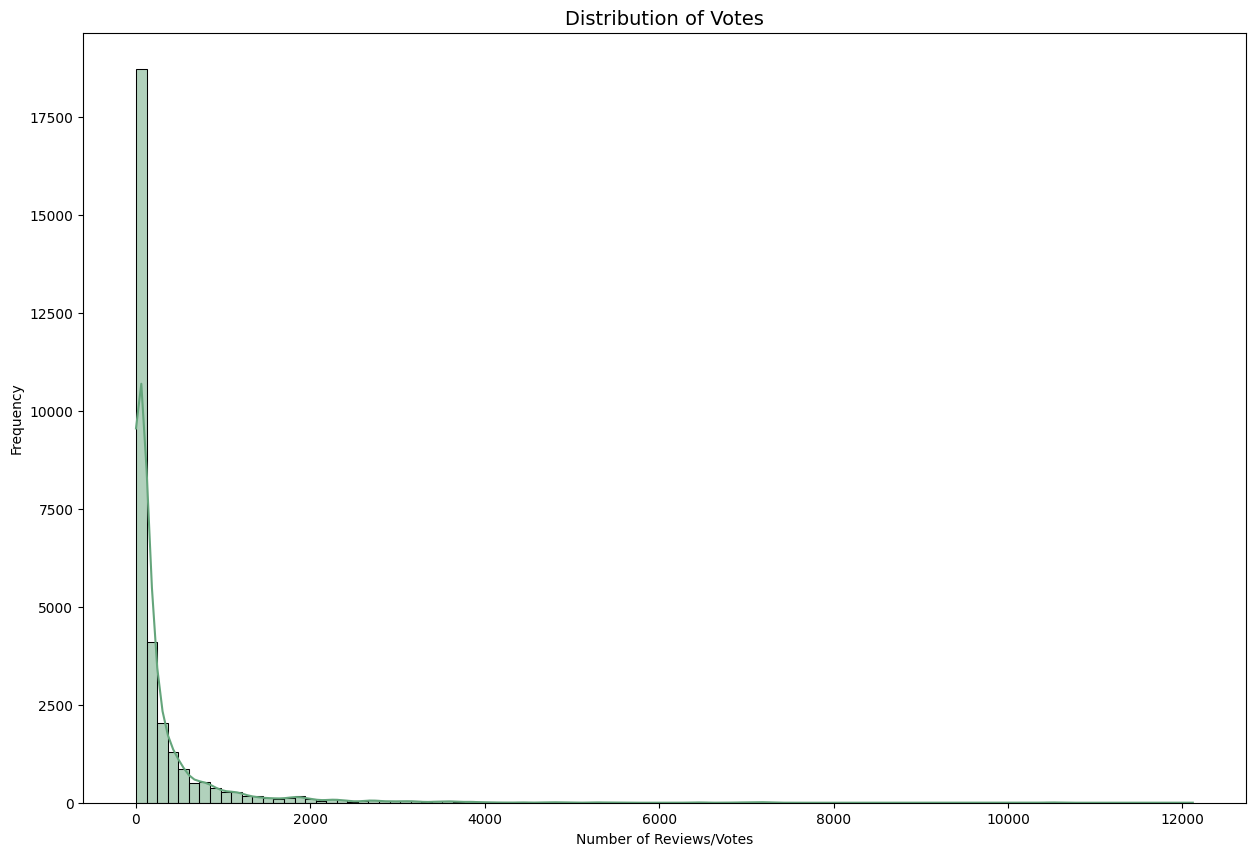

In [ ]:
# Create a histogram to visualize the distribution of 'votes'
plt.figure(figsize=(15, 10))
sns.histplot(data=foodiebay_dataset, x='votes', bins=100, kde=True, color='#64A57B')
plt.title('Distribution of Votes', fontsize=14)
plt.xlabel('Number of Reviews/Votes')
plt.ylabel('Frequency')
plt.show()

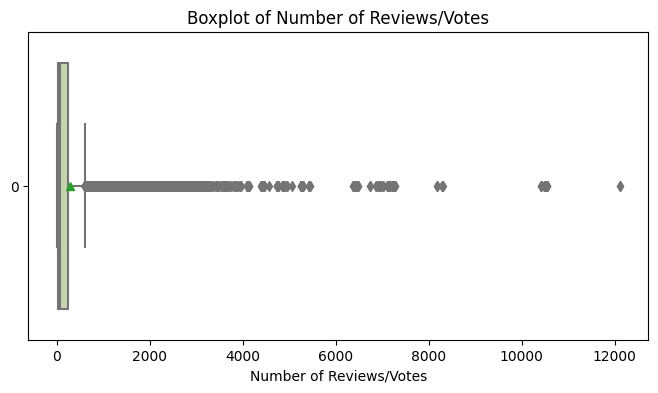

In [ ]:
# Create a boxplot to visualize the distribution of 'votes'
plt.figure(figsize=(8, 4))
sns.boxplot(data=foodiebay_dataset['votes'], showmeans=True, color='#C8DBA8', orient='h')
plt.title('Boxplot of Number of Reviews/Votes')
plt.xlabel('Number of Reviews/Votes')
plt.show()

**'ave_review_ranking' column**

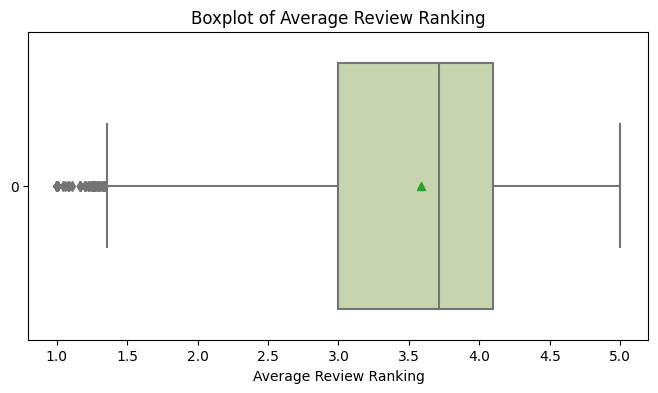

In [ ]:
# Create a boxplot to visualize the distribution of 'ave_review_ranking'
plt.figure(figsize=(8, 4))
sns.boxplot(data=foodiebay_dataset['ave_review_ranking'], showmeans=True, color='#C8DBA8', orient='h')
plt.title('Boxplot of Average Review Ranking')
plt.xlabel('Average Review Ranking')
plt.show()

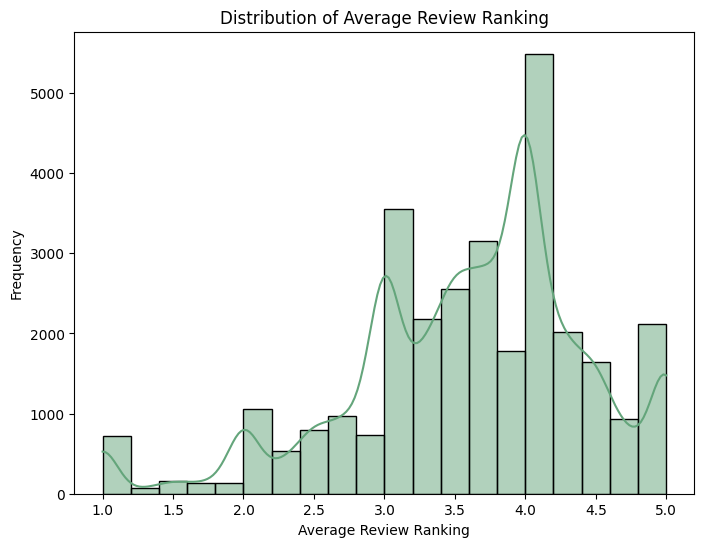

In [ ]:
# Create a histogram to visualize the distribution of 'ave_review_ranking'
plt.figure(figsize=(8, 6))
sns.histplot(data=foodiebay_dataset, x='ave_review_ranking', bins=20, kde=True, color='#64A57B')
plt.title('Distribution of Average Review Ranking')
plt.xlabel('Average Review Ranking')
plt.ylabel('Frequency')
plt.show()

### **4.1.2. Explore categorical variables**

**'location' column**

In [ ]:
# Get unique values from the 'location' column in the dataset
unique_locations = foodiebay_dataset['location'].unique()
num_unique_locations = len(unique_locations)

print("Unique Locations:")
print(unique_locations)

print(f"\nNumber of Unique Locations: {num_unique_locations}")

Unique Locations:
['Bannerghatta Road' 'Koramangala 1st Block' 'Basavanagudi' 'Shanti Nagar'
 'New BEL Road' 'Kalyan Nagar' 'Ulsoor' 'BTM' 'Brookefield' 'Whitefield'
 'Koramangala 5th Block' 'Malleshwaram' 'HSR' 'Brigade Road' 'MG Road'
 'Jayanagar' 'JP Nagar' 'Koramangala 3rd Block' 'Koramangala 6th Block'
 'Residency Road' 'Indiranagar' 'Thippasandra' 'Sarjapur Road'
 'Frazer Town' 'Yeshwantpur' 'Varthur Main Road, Whitefield' 'Banaswadi'
 'Cunningham Road' 'Bellandur' 'Koramangala 4th Block' 'Banashankari'
 'Domlur' 'Shivajinagar' 'Marathahalli' 'Koramangala 7th Block'
 'Richmond Road' 'Infantry Road' 'Kammanahalli' 'Koramangala 2nd Block'
 'Commercial Street' 'Hennur' 'Race Course Road' 'CV Raman Nagar'
 'Church Street' 'Ejipura' 'Sankey Road' 'Rajajinagar' 'South Bangalore'
 'Uttarahalli' 'City Market' 'St. Marks Road' 'Nagawara' 'Bommanahalli'
 'Kumaraswamy Layout' 'Lavelle Road' 'RT Nagar' 'Kaggadasapura'
 'Electronic City' 'Seshadripuram' 'Sadashiv Nagar' 'Wilson Garden'
 'East

**'listed_in_city' column**

In [ ]:
# Get unique values from the 'listed_in_city' column in the dataset
unique_cities = foodiebay_dataset['listed_in_city'].unique()
num_unique_cities = len(unique_cities)

print("Unique Cities:")
print(unique_cities)

print(f"\nNumber of Unique Cities: {num_unique_cities}")

Unique Cities:
['JP Nagar' 'Koramangala 5th Block' 'Jayanagar' 'Brigade Road'
 'New BEL Road' 'Kammanahalli' 'BTM' 'Brookefield' 'Koramangala 4th Block'
 'Malleshwaram' 'Bellandur' 'Marathahalli' 'Church Street'
 'Koramangala 7th Block' 'HSR' 'MG Road' 'Koramangala 6th Block'
 'Bannerghatta Road' 'Indiranagar' 'Old Airport Road' 'Sarjapur Road'
 'Whitefield' 'Basavanagudi' 'Kalyan Nagar' 'Frazer Town' 'Lavelle Road'
 'Banashankari' 'Residency Road' 'Rajajinagar' 'Electronic City']

Number of Unique Cities: 30


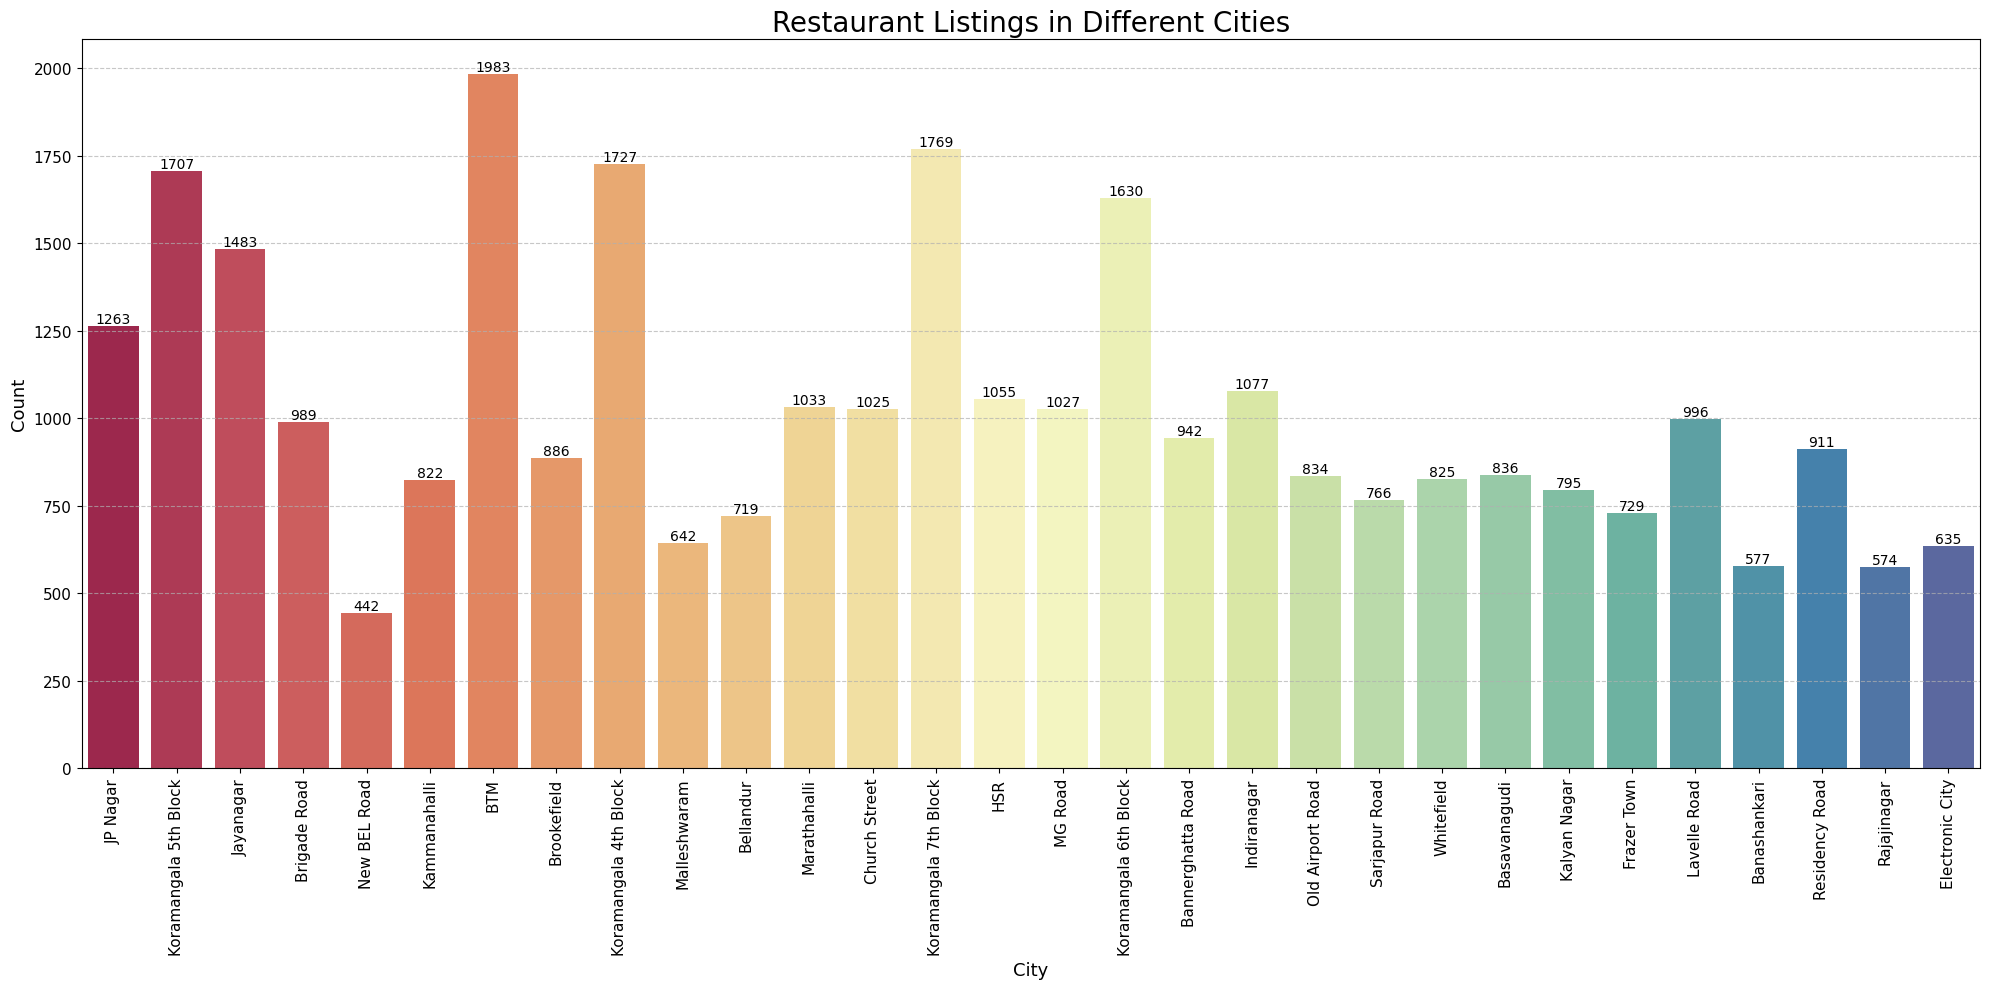

In [ ]:
# Create a countplot to visualize the distribution of 'listed_in_city'
plt.figure(figsize=(20, 10))
sns.countplot(data=foodiebay_dataset, x='listed_in_city', palette='Spectral')
plt.title("Restaurant Listings in Different Cities", fontsize=20)
plt.xlabel("City", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # adjust layout to prevent clipping of labels
plt.show()

In [ ]:
# Group the data by 'listed_in_city' and count the number of restaurants in each city
city_counts = foodiebay_dataset['listed_in_city'].value_counts()

# Print the city and count of restaurants in each city
print("City\t\tCount of Restaurants")
print(city_counts)

City		Count of Restaurants
BTM                      1983
Koramangala 7th Block    1769
Koramangala 4th Block    1727
Koramangala 5th Block    1707
Koramangala 6th Block    1630
Jayanagar                1483
JP Nagar                 1263
Indiranagar              1077
HSR                      1055
Marathahalli             1033
MG Road                  1027
Church Street            1025
Lavelle Road              996
Brigade Road              989
Bannerghatta Road         942
Residency Road            911
Brookefield               886
Basavanagudi              836
Old Airport Road          834
Whitefield                825
Kammanahalli              822
Kalyan Nagar              795
Sarjapur Road             766
Frazer Town               729
Bellandur                 719
Malleshwaram              642
Electronic City           635
Banashankari              577
Rajajinagar               574
New BEL Road              442
Name: listed_in_city, dtype: int64


**'rest_type' column**

In [ ]:
# Get unique values from the 'rest_type' column in the dataset
unique_types = foodiebay_dataset['rest_type'].unique()
num_unique_types = len(unique_types)

print("Unique Types:")
print(unique_types)

print(f"\nNumber of Unique Types: {num_unique_types}")

Unique Types:
['Cafe' 'Quick Bites' 'Casual Dining' 'Takeaway, Delivery'
 'Casual Dining, Bar' 'Bakery' 'Delivery']

Number of Unique Types: 7


**'listed_in_type' column**

In [ ]:
# Get unique values from the 'listed_in_type' column in the dataset
unique_services = foodiebay_dataset['listed_in_type'].unique()
num_unique_services = len(unique_services)

print("Unique Services:")
print(unique_services)

print(f"\nNumber of Unique Services: {num_unique_services}")

Unique Services:
['Cafes' 'Dine-out' 'Delivery' 'Buffet' 'Desserts' 'Pubs and bars'
 'Drinks & nightlife']

Number of Unique Services: 7


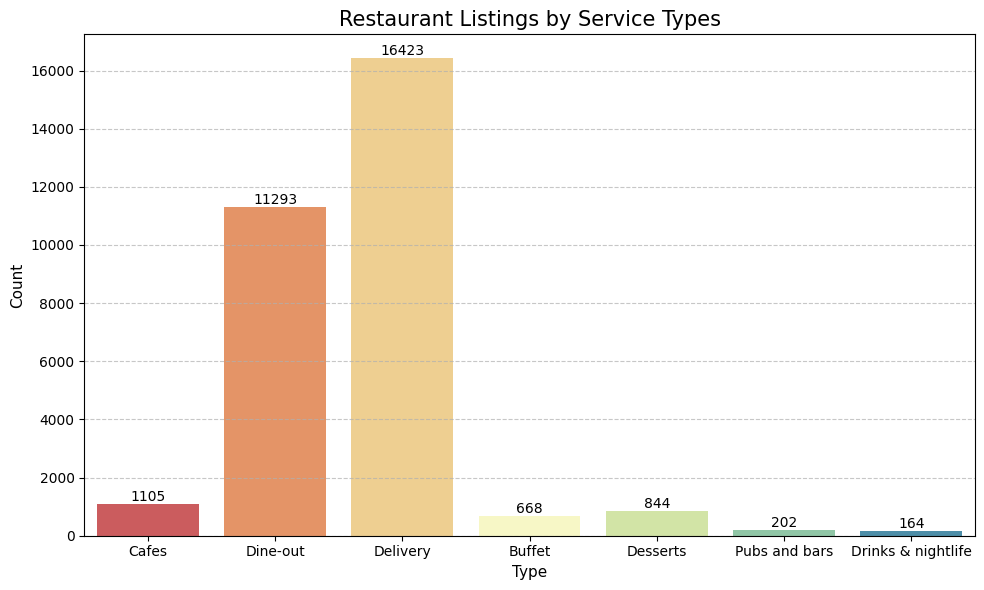

In [ ]:
# Create a countplot to visualize the distribution of 'listed_in_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=foodiebay_dataset, x='listed_in_type', palette='Spectral')
plt.title("Restaurant Listings by Service Types", fontsize=15)
plt.xlabel("Type", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

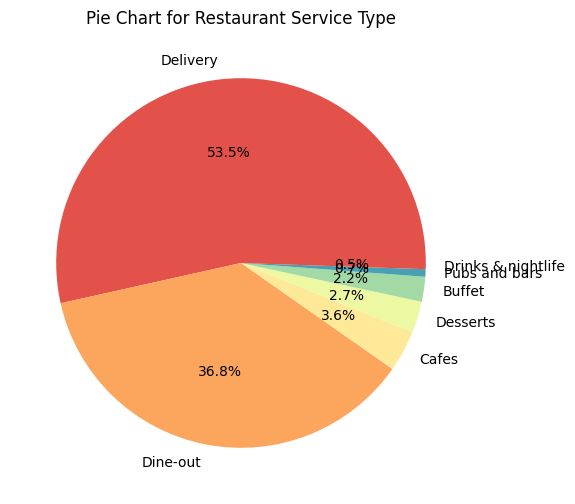

In [ ]:
# Describe categorical variable 'listed_in_type' using pie chart
plt.figure(figsize=(8,6))
plt.pie(foodiebay_dataset['listed_in_type'].value_counts(), labels=foodiebay_dataset['listed_in_type'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Spectral'))

plt.title("Pie Chart for Restaurant Service Type")
plt.show()

**'online_order' column**

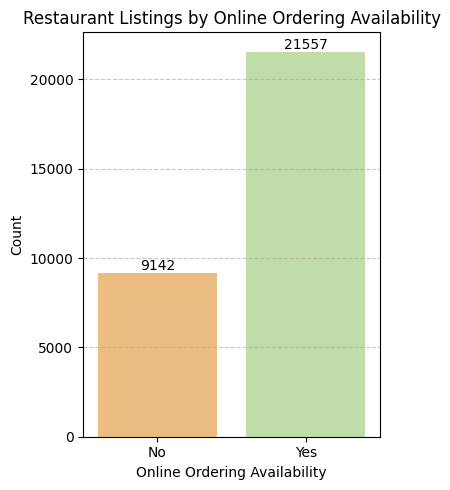

Yes: 70.22%
No: 29.78%


In [ ]:
# Create a countplot to visualize the distribution of 'online_order'
plt.figure(figsize=(4, 5))
sns.countplot(data=foodiebay_dataset, x='online_order', palette='Spectral')
plt.title("Restaurant Listings by Online Ordering Availability", fontsize=12)
plt.xlabel("Online Ordering Availability")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and print the percentage of each category
total_count = len(foodiebay_dataset)
online_order_counts = foodiebay_dataset['online_order'].value_counts()
for category, count in online_order_counts.items():
    percentage = (count / total_count) * 100
    print(f'{category}: {percentage:.2f}%')

**'book_table' column**

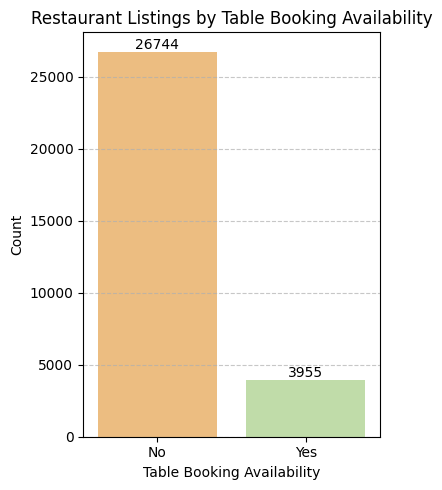

No: 87.12%
Yes: 12.88%


In [ ]:
# Create a countplot to visualize the distribution of 'book_table'
plt.figure(figsize=(4,5))
sns.countplot(data=foodiebay_dataset, x='book_table', palette='Spectral')
plt.title("Restaurant Listings by Table Booking Availability", fontsize=12)
plt.xlabel("Table Booking Availability")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and print the percentage of each category
book_table_counts = foodiebay_dataset['book_table'].value_counts()
for category, count in book_table_counts.items():
    percentage = (count / total_count) * 100
    print(f'{category}: {percentage:.2f}%')

## **4.2. Bivariate Analysis**

**'rate' by 'listed_in_type'**

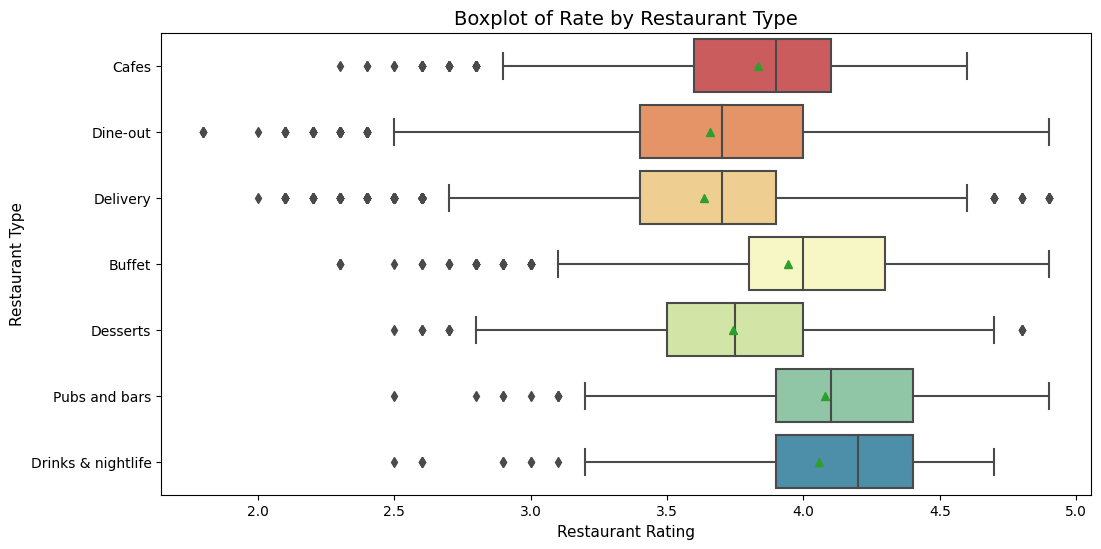

In [ ]:
# Create a boxplot for 'rate' grouped by 'listed_in_type'
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(data=foodiebay_dataset, x='rate', y='listed_in_type', showmeans=True, palette='Spectral', orient='h')
plt.title('Boxplot of Rate by Restaurant Type', fontsize=14)
plt.xlabel('Restaurant Rating', fontsize=11)
plt.ylabel('Restaurant Type', fontsize=11)
plt.show()

In [ ]:
# Get the summary statistics for rate by restaurant type
summary_stats_rate_by_type = foodiebay_dataset.groupby('listed_in_type')['rate'].describe()

# Print the results
print("Summary Statistics for Rate by Restaurant Type:")
print(summary_stats_rate_by_type)

Summary Statistics for Rate by Restaurant Type:
                      count  mean  std  min  25%  50%  75%  max
listed_in_type                                                 
Buffet               668.00  3.94 0.49 2.30 3.80 4.00 4.30 4.90
Cafes               1105.00  3.83 0.43 2.30 3.60 3.90 4.10 4.60
Delivery           16423.00  3.64 0.41 2.00 3.40 3.70 3.90 4.90
Desserts             844.00  3.74 0.38 2.50 3.50 3.75 4.00 4.80
Dine-out           11293.00  3.66 0.44 1.80 3.40 3.70 4.00 4.90
Drinks & nightlife   164.00  4.06 0.44 2.50 3.90 4.20 4.40 4.70
Pubs and bars        202.00  4.08 0.42 2.50 3.90 4.10 4.40 4.90


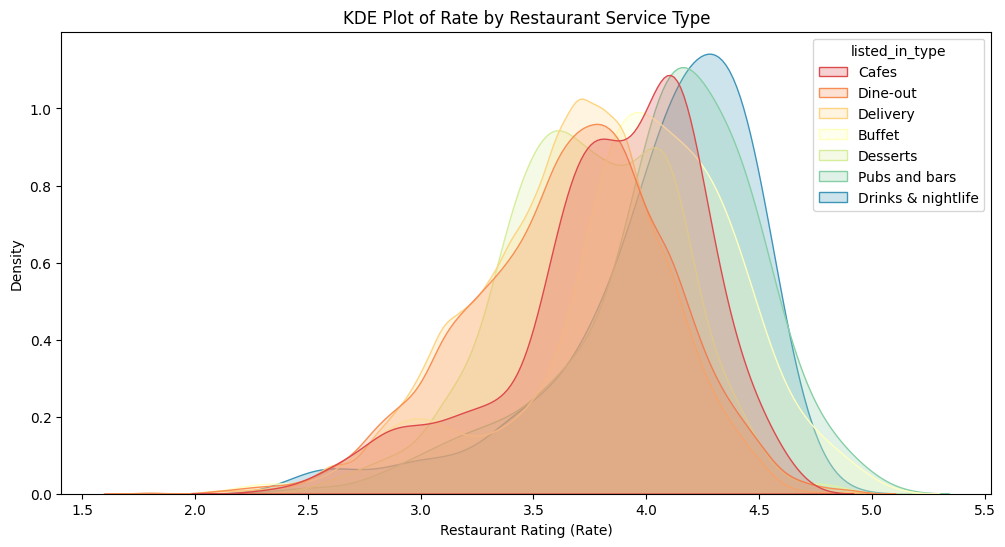

In [ ]:
# Create a KDE plot for 'rate' by 'listed_in_type'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=foodiebay_dataset, x='rate', hue='listed_in_type', palette='Spectral', fill=True, common_norm=False)

plt.title('KDE Plot of Rate by Restaurant Service Type')
plt.xlabel('Restaurant Rating (Rate)')
plt.ylabel('Density')

plt.show()

**'ave_cost_for_two' by 'listed_in_type'**

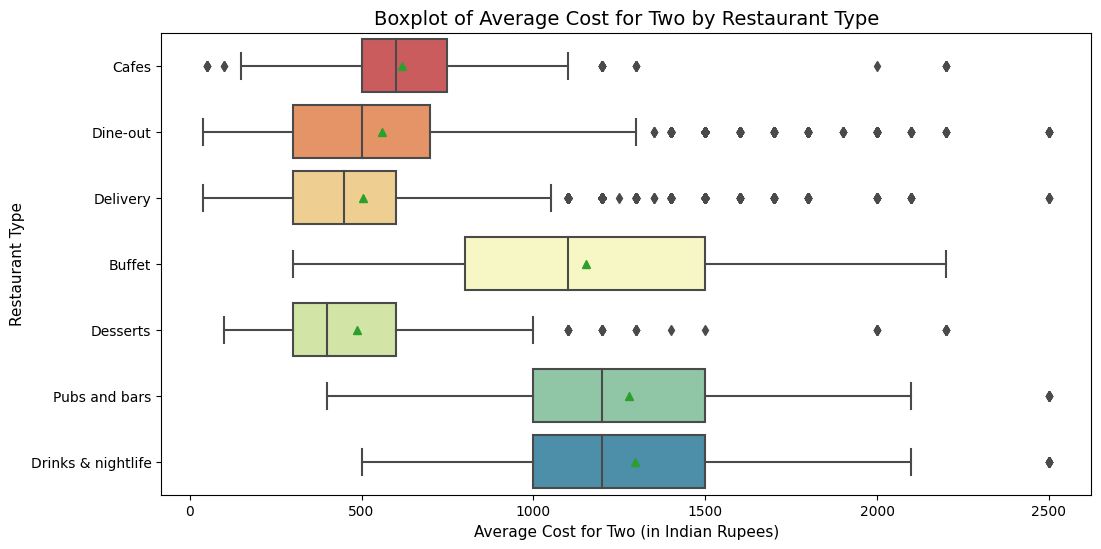

In [ ]:
# Create a boxplot for 'ave_cost_for_two' grouped by 'listed_in_type'
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(data=foodiebay_dataset, x='ave_cost_for_two', y='listed_in_type', showmeans=True, palette='Spectral', orient='h')
plt.title('Boxplot of Average Cost for Two by Restaurant Type', fontsize=14)
plt.xlabel('Average Cost for Two (in Indian Rupees)', fontsize=11)
plt.ylabel('Restaurant Type', fontsize=11)
plt.show()

In [ ]:
# Get the summary statistics for ave_cost_for_two by restaurant type
summary_stats_by_type = foodiebay_dataset.groupby('listed_in_type')['ave_cost_for_two'].describe()

# Print the results
print("Summary Statistics for Average Cost for Two by Restaurant Type:")
print(summary_stats_by_type)

Summary Statistics for Average Cost for Two by Restaurant Type:
                      count    mean    std    min     25%     50%     75%     max
listed_in_type                                                                   
Buffet               668.00 1152.25 373.39 300.00  800.00 1100.00 1500.00 2200.00
Cafes               1105.00  617.74 248.02  50.00  500.00  600.00  750.00 2200.00
Delivery           16423.00  503.07 282.49  40.00  300.00  450.00  600.00 2500.00
Desserts             844.00  488.15 307.48 100.00  300.00  400.00  600.00 2200.00
Dine-out           11293.00  559.13 360.22  40.00  300.00  500.00  700.00 2500.00
Drinks & nightlife   164.00 1294.82 426.92 500.00 1000.00 1200.00 1500.00 2500.00
Pubs and bars        202.00 1277.48 406.29 400.00 1000.00 1200.00 1500.00 2500.00


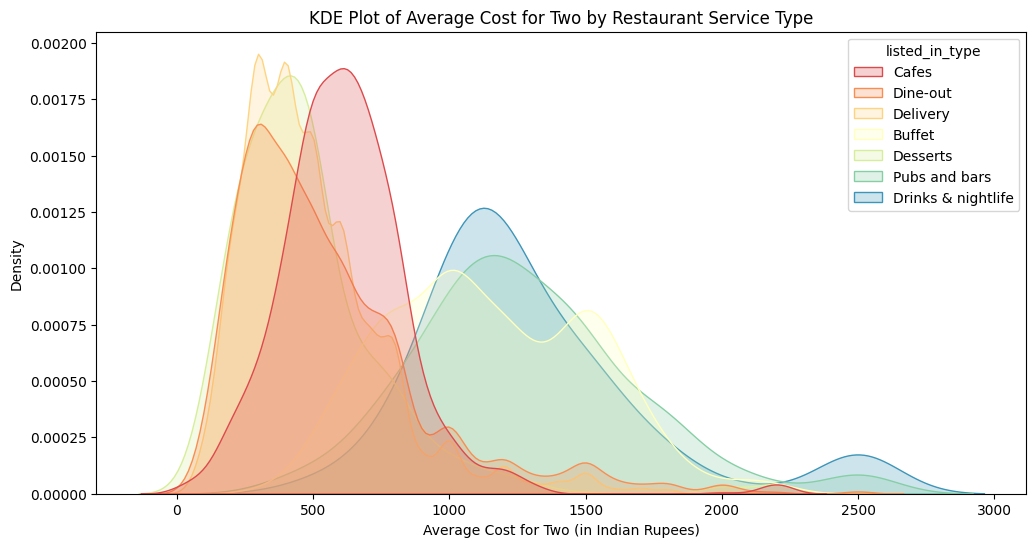

In [ ]:
# Create a KDE plot for 'rate' by 'ave_cost_for_two'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=foodiebay_dataset, x='ave_cost_for_two', hue='listed_in_type', palette='Spectral', fill=True, common_norm=False)

plt.title('KDE Plot of Average Cost for Two by Restaurant Service Type')
plt.xlabel('Average Cost for Two (in Indian Rupees)')
plt.ylabel('Density')

plt.show()

**'rate' by 'listed_in_city'**

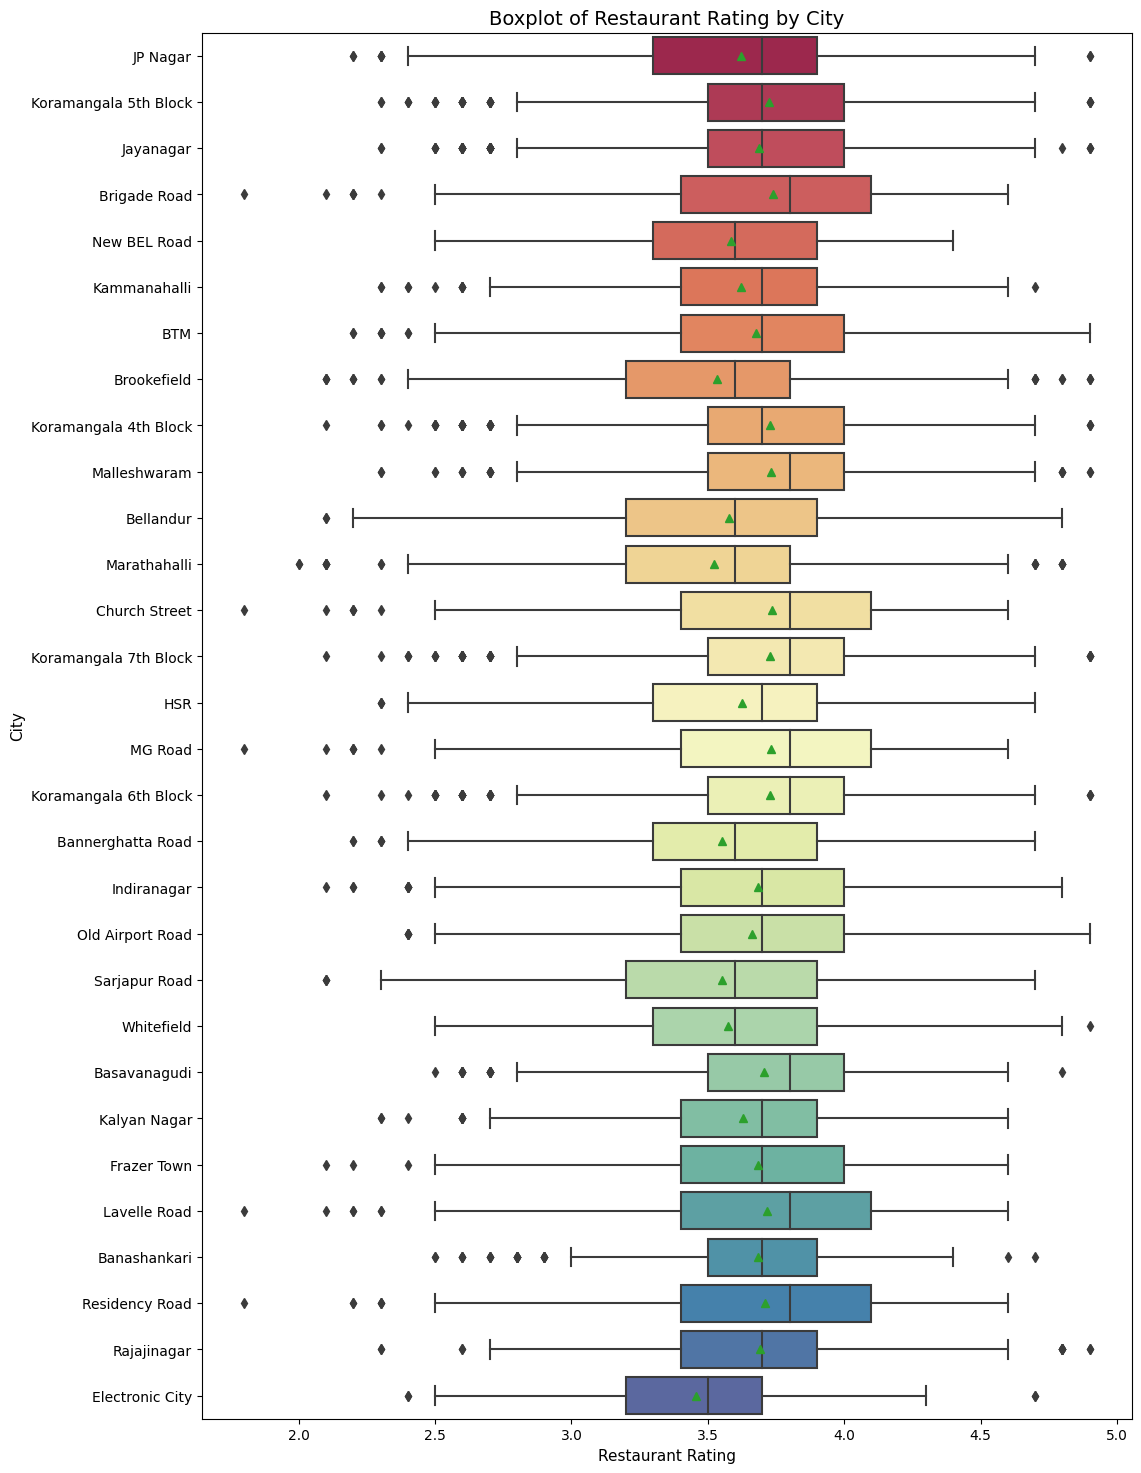

In [ ]:
# Create a boxplot for 'rate' grouped by 'listed_in_city'
plt.figure(figsize=(12, 18))
sns.boxplot(data=foodiebay_dataset, x='rate', y='listed_in_city', showmeans=True, palette='Spectral', orient='h')
plt.title('Boxplot of Restaurant Rating by City', fontsize=14)
plt.xlabel('Restaurant Rating', fontsize=11)
plt.ylabel('City', fontsize=11)
plt.show()

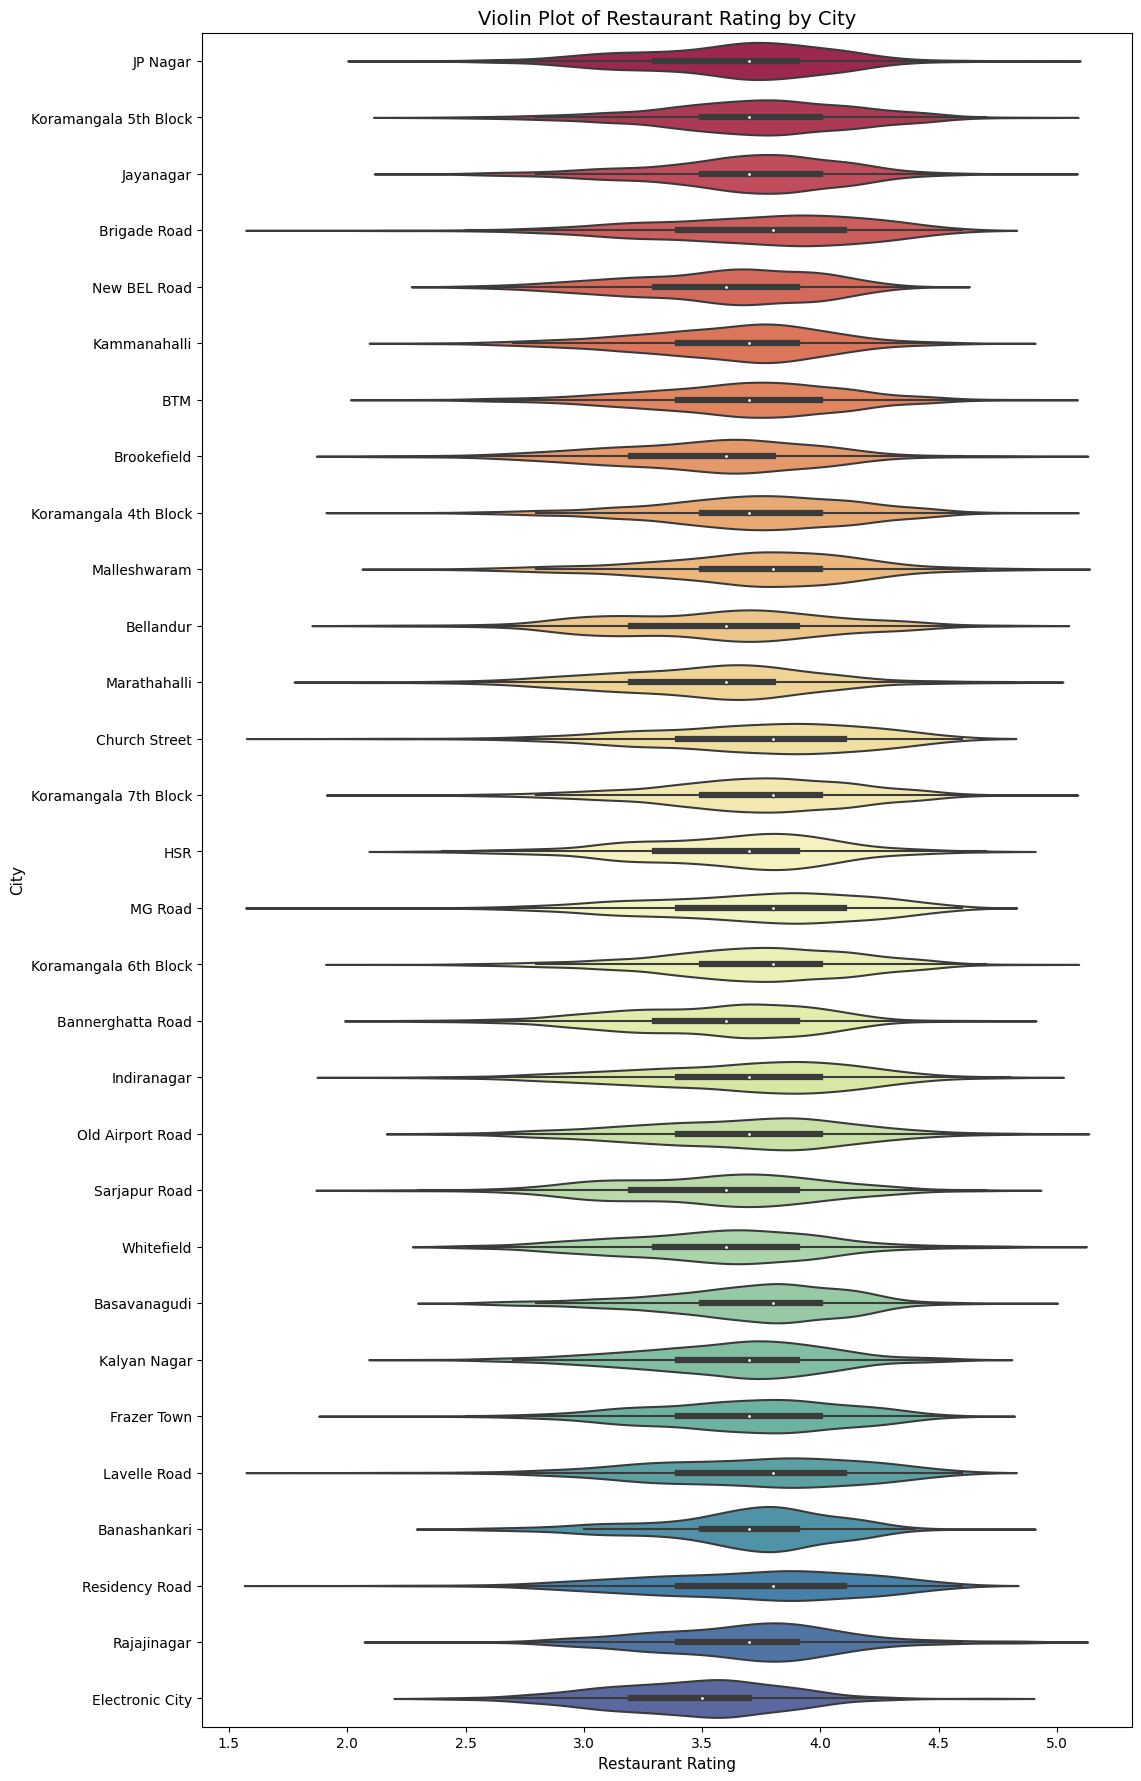

In [ ]:
# Create a violin plot
plt.figure(figsize=(12, 22))
sns.violinplot(data=foodiebay_dataset, x='rate', y='listed_in_city', palette='Spectral')
plt.title('Violin Plot of Restaurant Rating by City', fontsize=14)
plt.xlabel('Restaurant Rating', fontsize=11)
plt.ylabel('City', fontsize=11)
plt.show()

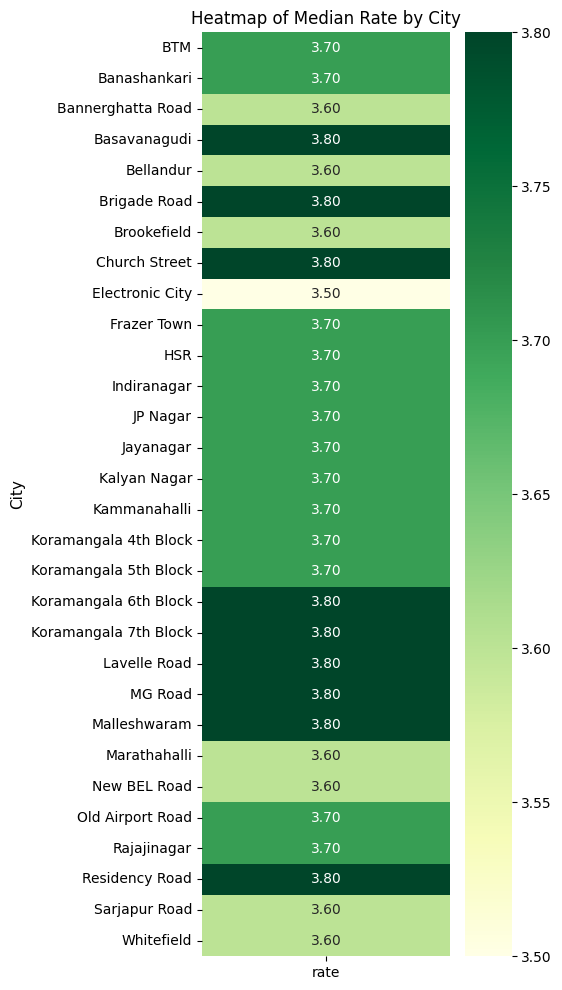

In [ ]:
# Create a pivot table to calculate the median rate for each city
median_rate_pivot = foodiebay_dataset.pivot_table(index='listed_in_city', values='rate', aggfunc='median')

# Create a heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(median_rate_pivot, cmap='YlGn', annot=True, fmt='.2f',)
plt.title('Heatmap of Median Rate by City')
plt.ylabel('City', fontsize=11)
plt.show()

**'rate' by 'num_cuisines'**

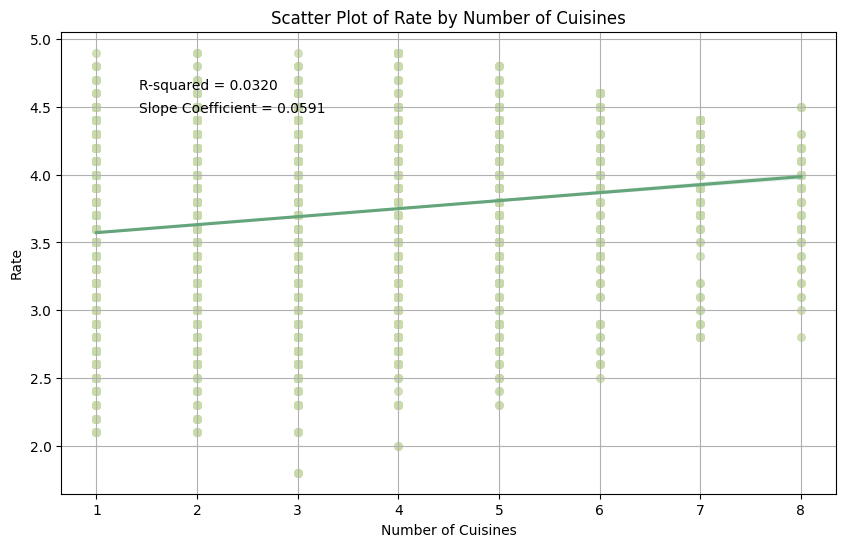

In [ ]:
# Create a scatter plot with regression line and R-squared metric
plt.figure(figsize=(10, 6))
sns.regplot(data=foodiebay_dataset, x='num_cuisines', y='rate', color='#C8DBA8', scatter_kws={'s': 30}, line_kws={'color': '#64A57B'})  # Adjust the color and marker size
plt.title('Scatter Plot of Rate by Number of Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Rate')

# Calculate and display R-squared metric
r, _ = pearsonr(foodiebay_dataset['num_cuisines'], foodiebay_dataset['rate'])
plt.text(0.1, 0.9, f'R-squared = {r**2:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Calculate the slope coefficient
slope, _, _, _, _ = linregress(foodiebay_dataset['num_cuisines'], foodiebay_dataset['rate'])
plt.text(0.1, 0.85, f'Slope Coefficient = {slope:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.grid(True)  # Add grid lines for better readability
plt.show()

**'rate' by 'num_dishes_liked'**

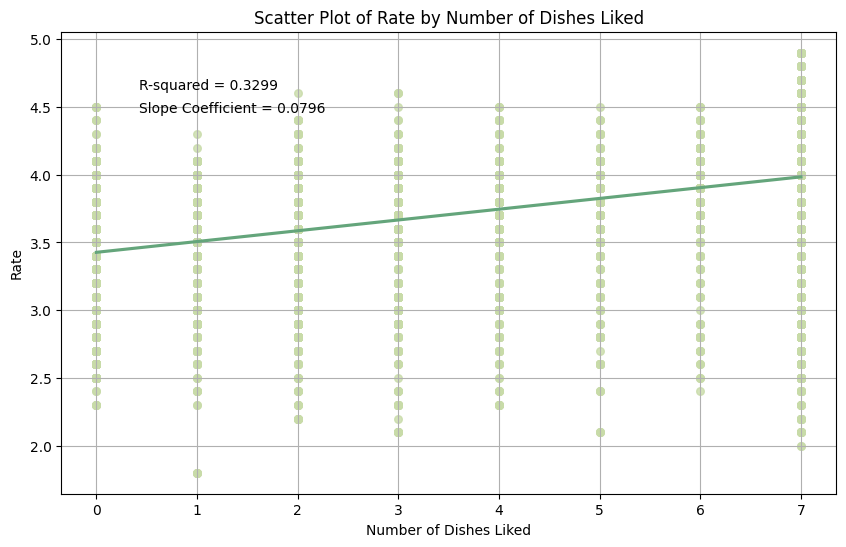

In [ ]:
# Create a scatter plot with regression line and R-squared metric
plt.figure(figsize=(10, 6))
sns.regplot(data=foodiebay_dataset, x='num_dishes_liked', y='rate', color='#C8DBA8', scatter_kws={'s': 30}, line_kws={'color': '#64A57B'})
plt.title('Scatter Plot of Rate by Number of Dishes Liked')
plt.xlabel('Number of Dishes Liked')
plt.ylabel('Rate')

# Calculate and display R-squared metric
r, _ = pearsonr(foodiebay_dataset['num_dishes_liked'], foodiebay_dataset['rate'])
plt.text(0.1, 0.9, f'R-squared = {r**2:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Calculate the slope coefficient
slope, _, _, _, _ = linregress(foodiebay_dataset['num_dishes_liked'], foodiebay_dataset['rate'])
plt.text(0.1, 0.85, f'Slope Coefficient = {slope:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.grid(True)
plt.show()

**'rate' by 'online_order'**

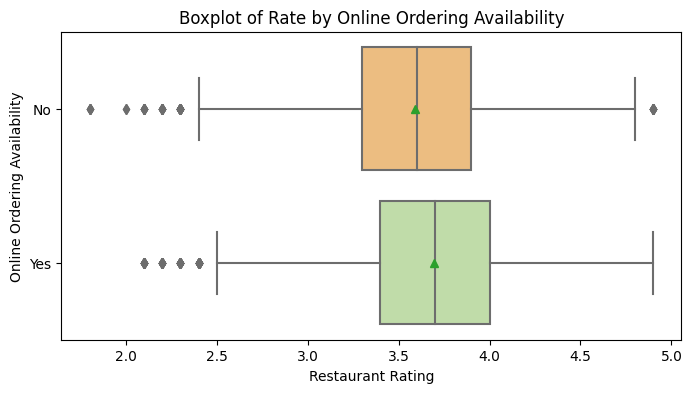

In [ ]:
# Create a boxplot for 'rate' grouped by 'online_order'
plt.figure(figsize=(8, 4))
sns.boxplot(data=foodiebay_dataset, x='rate', y='online_order', showmeans=True, palette='Spectral', orient='h')
plt.title('Boxplot of Rate by Online Ordering Availability')
plt.xlabel('Restaurant Rating')
plt.ylabel('Online Ordering Availability')
plt.show()

In [ ]:
# Get the summary statistics for rate by online ordering availability
summary_stats_by_online_order = foodiebay_dataset.groupby('online_order')['rate'].describe()
print(summary_stats_by_online_order)

                count  mean  std  min  25%  50%  75%  max
online_order                                             
0             9142.00  3.59 0.45 1.80 3.30 3.60 3.90 4.90
1            21557.00  3.70 0.42 2.10 3.40 3.70 4.00 4.90


Text(0, 0.5, 'Density')

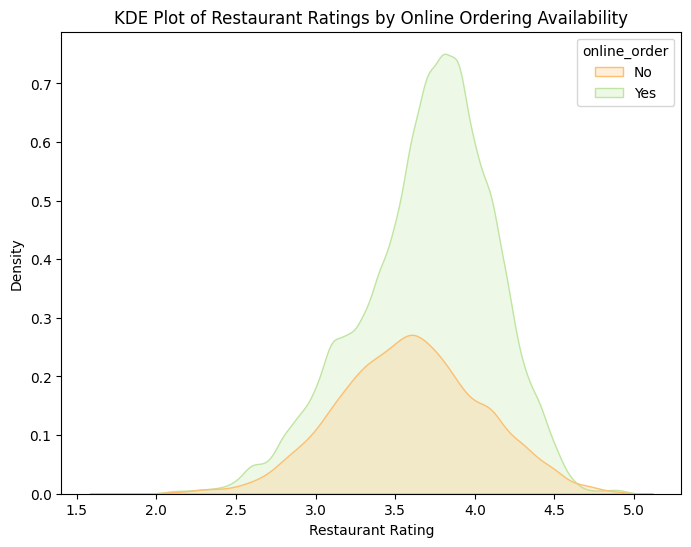

In [ ]:
# Create a KDE plot for 'rate' by 'online_order'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=foodiebay_dataset, x='rate', hue='online_order', fill=True, palette='Spectral')
plt.title('KDE Plot of Restaurant Ratings by Online Ordering Availability')
plt.xlabel('Restaurant Rating')
plt.ylabel('Density')

**'rate' by 'book_table'**

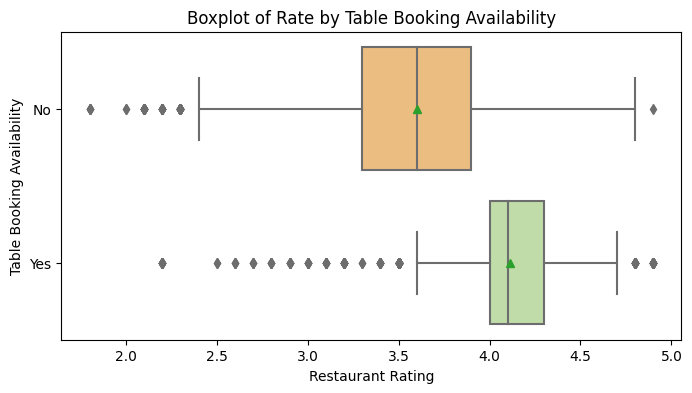

In [ ]:
# Create a boxplot for 'rate' grouped by 'book_table'
plt.figure(figsize=(8, 4))
sns.boxplot(data=foodiebay_dataset, x='rate', y='book_table', showmeans=True, palette='Spectral', orient='h')
plt.title('Boxplot of Rate by Table Booking Availability')
plt.xlabel('Restaurant Rating')
plt.ylabel('Table Booking Availability')
plt.show()

In [ ]:
# Get the summary statistics for rate by booking availability
summary_stats_by_booking = foodiebay_dataset.groupby('book_table')['rate'].describe()
print(summary_stats_by_booking)

              count  mean  std  min  25%  50%  75%  max
book_table                                             
0          26744.00  3.60 0.41 1.80 3.30 3.60 3.90 4.90
1           3955.00  4.11 0.32 2.20 4.00 4.10 4.30 4.90


Text(0, 0.5, 'Density')

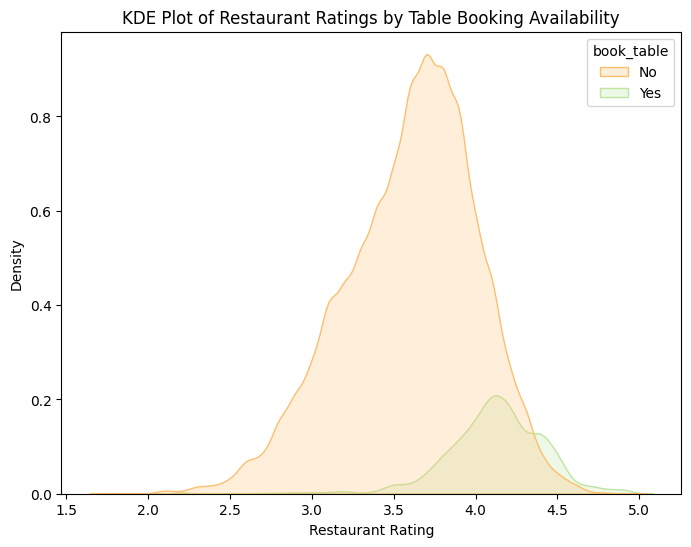

In [ ]:
# Create a KDE plot for 'rate' by 'book_table'
plt.figure(figsize=(8, 6))
sns.kdeplot(data=foodiebay_dataset, x='rate', hue='book_table', fill=True, palette='Spectral')
plt.title('KDE Plot of Restaurant Ratings by Table Booking Availability')
plt.xlabel('Restaurant Rating')
plt.ylabel('Density')

**'rate' by 'ave_cost_for_two'**

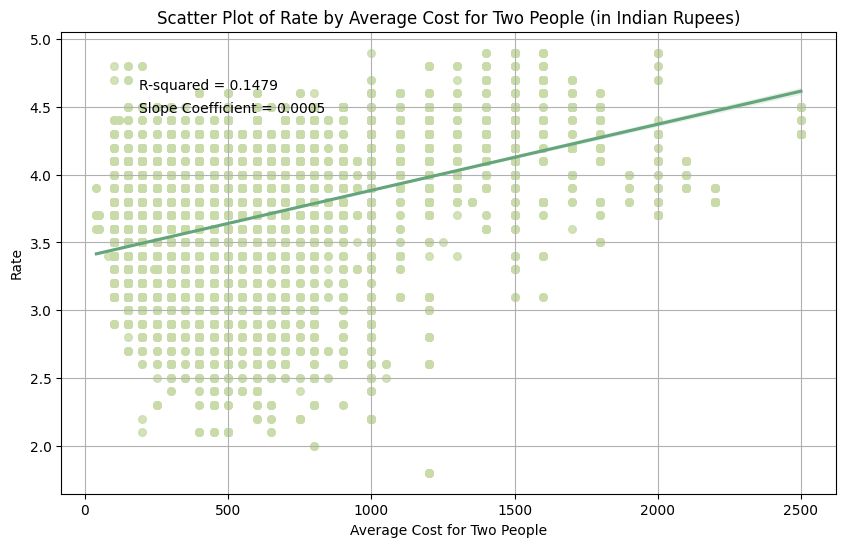

In [ ]:
# Create a scatter plot with regression line and R-squared metric
plt.figure(figsize=(10, 6))
sns.regplot(data=foodiebay_dataset, x='ave_cost_for_two', y='rate', color='#C8DBA8', scatter_kws={'s': 30}, line_kws={'color': '#64A57B'})
plt.title('Scatter Plot of Rate by Average Cost for Two People (in Indian Rupees)')
plt.xlabel('Average Cost for Two People')
plt.ylabel('Rate')

# Calculate and display R-squared metric
r, _ = pearsonr(foodiebay_dataset['ave_cost_for_two'], foodiebay_dataset['rate'])
plt.text(0.1, 0.9, f'R-squared = {r**2:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Calculate the slope coefficient
slope, _, _, _, _ = linregress(foodiebay_dataset['ave_cost_for_two'], foodiebay_dataset['rate'])
plt.text(0.1, 0.85, f'Slope Coefficient = {slope:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.grid(True)
plt.show()

**'rate' by 'votes'**

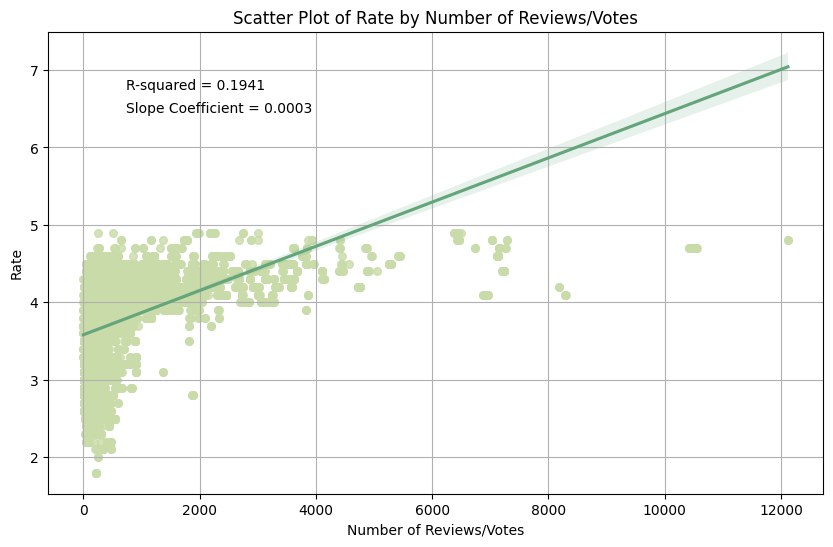

In [ ]:
# Create a scatter plot with regression line and R-squared metric
plt.figure(figsize=(10, 6))
sns.regplot(data=foodiebay_dataset, x='votes', y='rate', color='#C8DBA8', scatter_kws={'s': 30}, line_kws={'color': '#64A57B'})
plt.title('Scatter Plot of Rate by Number of Reviews/Votes')
plt.xlabel('Number of Reviews/Votes')
plt.ylabel('Rate')

# Calculate and display R-squared metric
r, _ = pearsonr(foodiebay_dataset['votes'], foodiebay_dataset['rate'])
plt.text(0.1, 0.9, f'R-squared = {r**2:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Calculate the slope coefficient
slope, _, _, _, _ = linregress(foodiebay_dataset['votes'], foodiebay_dataset['rate'])
plt.text(0.1, 0.85, f'Slope Coefficient = {slope:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.grid(True)
plt.show()

**'rate' by 'ave_review_ranking'**

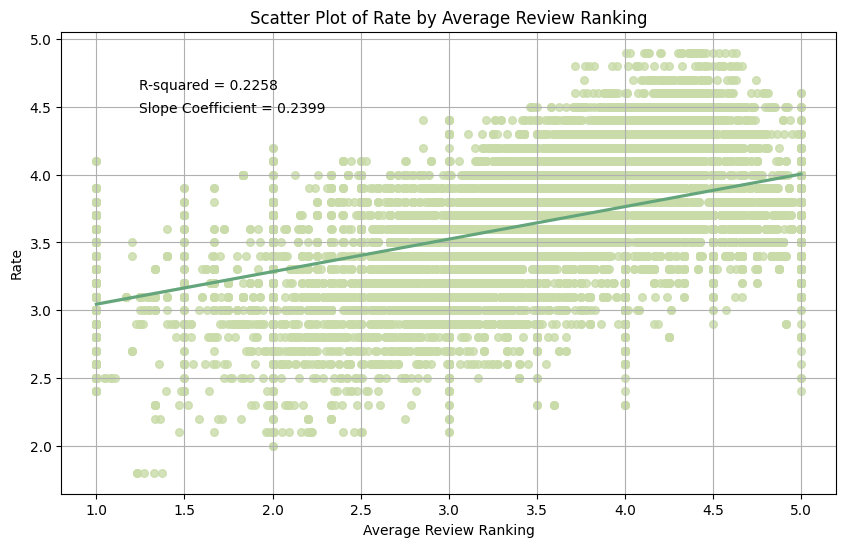

In [ ]:
# Create a scatter plot with regression line and R-squared metric
plt.figure(figsize=(10, 6))
sns.regplot(data=foodiebay_dataset, x='ave_review_ranking', y='rate', color='#C8DBA8', scatter_kws={'s': 30}, line_kws={'color': '#64A57B'})
plt.title('Scatter Plot of Rate by Average Review Ranking')
plt.xlabel('Average Review Ranking')
plt.ylabel('Rate')

# Calculate and display R-squared metric
r, _ = pearsonr(foodiebay_dataset['ave_review_ranking'], foodiebay_dataset['rate'])
plt.text(0.1, 0.9, f'R-squared = {r**2:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

# Calculate the slope coefficient
slope, _, _, _, _ = linregress(foodiebay_dataset['ave_review_ranking'], foodiebay_dataset['rate'])
plt.text(0.1, 0.85, f'Slope Coefficient = {slope:.4f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.grid(True)
plt.show()

## **4.3. Multivariate Analysis**

**'rate' by 'ave_cost_for_two' and 'online_order'**

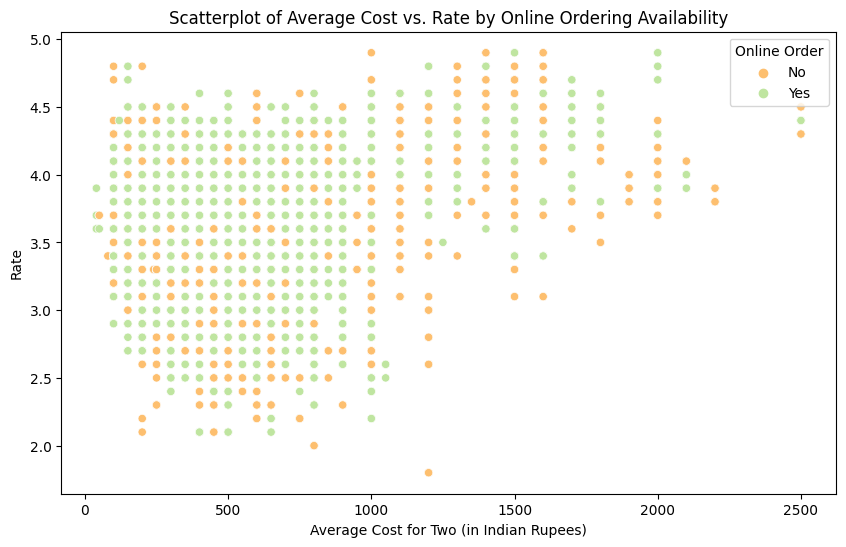

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=foodiebay_dataset, x='ave_cost_for_two', y='rate', hue='online_order', palette='Spectral')

plt.xlabel('Average Cost for Two (in Indian Rupees)')
plt.ylabel('Rate')
plt.title('Scatterplot of Average Cost vs. Rate by Online Ordering Availability')

plt.legend(title='Online Order', loc='upper right')

plt.show()

<Figure size 1600x800 with 0 Axes>

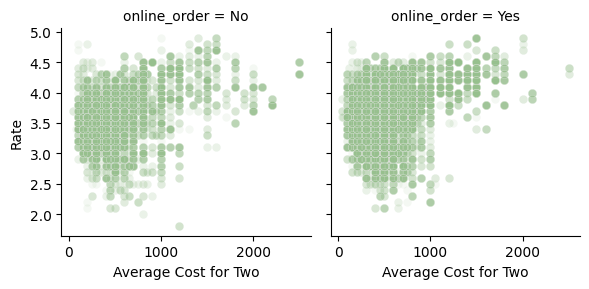

In [ ]:
plt.figure(figsize=(16, 8))
g = sns.FacetGrid(data=foodiebay_dataset, col='online_order', margin_titles=True)

g.map(sns.scatterplot, 'ave_cost_for_two', 'rate', alpha=0.1, color='#97C08E')
g.set_axis_labels('Average Cost for Two', 'Rate')

plt.show()

**'rate' by 'ave_cost_for_two' and 'book_table'**

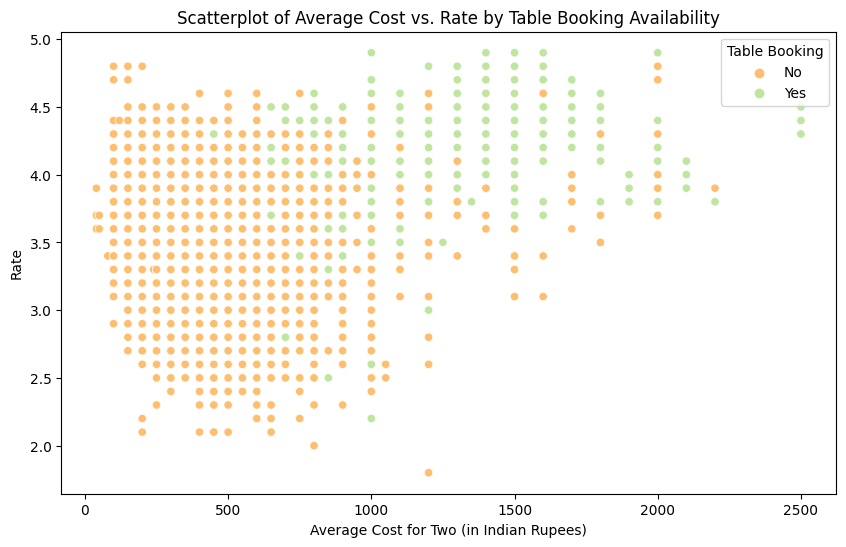

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=foodiebay_dataset, x='ave_cost_for_two', y='rate', hue='book_table', palette='Spectral')

plt.xlabel('Average Cost for Two (in Indian Rupees)')
plt.ylabel('Rate')
plt.title('Scatterplot of Average Cost vs. Rate by Table Booking Availability')

plt.legend(title='Table Booking', loc='upper right')

plt.show()

<Figure size 1600x800 with 0 Axes>

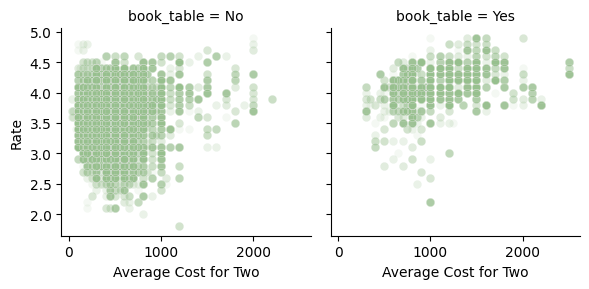

In [ ]:
plt.figure(figsize=(16, 8))
g = sns.FacetGrid(data=foodiebay_dataset, col='book_table', margin_titles=True)

g.map(sns.scatterplot, 'ave_cost_for_two', 'rate', alpha=0.1, color='#97C08E')
g.set_axis_labels('Average Cost for Two', 'Rate')

plt.show()

**'rate' by 'listed_in_type' and 'online_order'**

Text(0, 0.5, 'Rate')

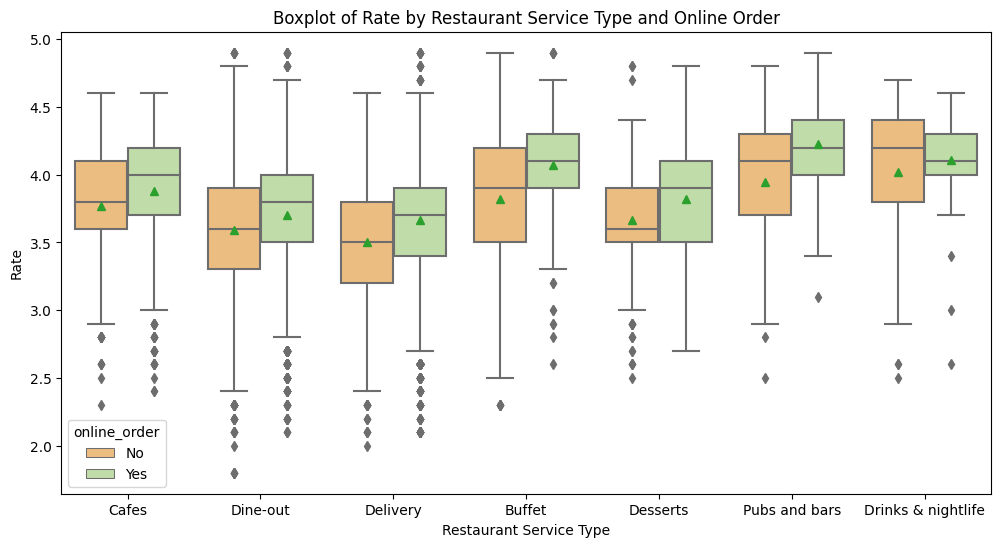

In [ ]:
# Create a boxplot for 'rate' grouped by 'listed_in_type' and 'online_order'
plt.figure(figsize=(12, 6))
sns.boxplot(data=foodiebay_dataset, x='listed_in_type', y='rate', hue='online_order', showmeans=True, palette='Spectral')
plt.title('Boxplot of Rate by Restaurant Service Type and Online Order')
plt.xlabel('Restaurant Service Type')
plt.ylabel('Rate')

In [ ]:
# Calculate mean and median ratings for each 'listed_in_type'
stat_sum_for_type = foodiebay_dataset.groupby('listed_in_type')['rate'].agg(['mean', 'median'])
stat_sum_for_type.columns = ['Mean', 'Median']
print(stat_sum_for_type)

                    Mean  Median
listed_in_type                  
Buffet              3.94    4.00
Cafes               3.83    3.90
Delivery            3.64    3.70
Desserts            3.74    3.75
Dine-out            3.66    3.70
Drinks & nightlife  4.06    4.20
Pubs and bars       4.08    4.10


Text(0, 0.5, 'Rate')

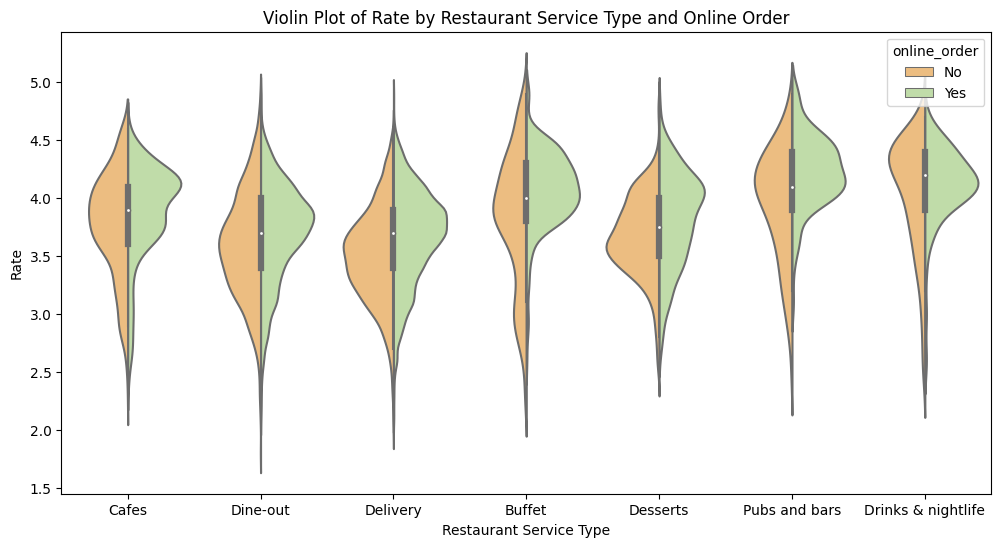

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=foodiebay_dataset, x='listed_in_type', y='rate', hue='online_order', palette='Spectral', split=True)
plt.title('Violin Plot of Rate by Restaurant Service Type and Online Order')
plt.xlabel('Restaurant Service Type')
plt.ylabel('Rate')

## **4.4. Encode Data - Convert Categorical Data to Numeric**

In [ ]:
# Convert the 'listed_in_type' column into dummy variables
service_dummies = pd.get_dummies(foodiebay_dataset['listed_in_type'], prefix='servicetype')

print(service_dummies)

       servicetype_Buffet  servicetype_Cafes  servicetype_Delivery  servicetype_Desserts  servicetype_Dine-out  servicetype_Drinks & nightlife  servicetype_Pubs and bars
0                       0                  1                     0                     0                     0                               0                          0
1                       0                  0                     0                     0                     1                               0                          0
2                       0                  0                     1                     0                     0                               0                          0
3                       0                  0                     1                     0                     0                               0                          0
4                       0                  0                     0                     0                     1                               0        

In [ ]:
# Merge the dummy variables back into the original DataFrame
foodiebay_dataset = pd.concat([foodiebay_dataset, service_dummies], axis=1)
foodiebay_dataset = foodiebay_dataset.rename(columns=lambda x: x.lower())

# Rename columns to lowercase and remove prefix
foodiebay_dataset.columns = foodiebay_dataset.columns.str.replace('servicetype_', '')
foodiebay_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30699 entries, 0 to 40129
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            30699 non-null  object 
 1   rest_type           30699 non-null  object 
 2   listed_in_type      30699 non-null  object 
 3   listed_in_city      30699 non-null  object 
 4   cuisines            30699 non-null  object 
 5   num_cuisines        30699 non-null  int64  
 6   dish_liked          30699 non-null  object 
 7   num_dishes_liked    30699 non-null  int64  
 8   online_order        30699 non-null  object 
 9   book_table          30699 non-null  object 
 10  ave_cost_for_two    30699 non-null  float64
 11  votes               30699 non-null  int64  
 12  ave_review_ranking  30699 non-null  float64
 13  rate                30699 non-null  float64
 14  buffet              30699 non-null  uint8  
 15  cafes               30699 non-null  uint8  
 16  deli

In [ ]:
# Rename columns in the dataset
foodiebay_dataset.rename(columns={
    'dine-out': 'dineout',
    'drinks & nightlife': 'drinks_and_nightlife',
    'pubs and bars': 'pubs_and_bars'
    },
    inplace=True)

In [ ]:
# Define a dictionary to map "Yes" to 1 and "No" to "0"
binary_mapping = {"Yes": 1, "No": 0}

# Convert the columns to "1" and "0" using the mapping
foodiebay_dataset['online_order'] = foodiebay_dataset['online_order'].replace(binary_mapping)
foodiebay_dataset['book_table'] = foodiebay_dataset['book_table'].replace(binary_mapping)

In [ ]:
foodiebay_dataset.sample(5)

location      rest_type listed_in_type         listed_in_city                                     cuisines  num_cuisines                                         dish_liked  num_dishes_liked  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate  buffet  cafes  delivery  desserts  dineout  drinks_and_nightlife  pubs_and_bars
39828            Brookefield  Casual Dining       Dine-out           Marathahalli               Biryani, North Indian, Chinese             3  Tandoori Chicken, Chicken Biryani, Naan, Dum B...                 7             0           0            500.00    198                3.08  3.60       0      0         0         0        1                     0              0
20901     Jeevan Bhima Nagar    Quick Bites       Delivery       Old Airport Road                        Chinese, North Indian             2                                               None                 0             1           0            200.00     28                4.00  3.10       0      0         1         0        0                     0              0
15251     Jeevan Bhima Nagar  Casual Dining       Dine-out            Indiranagar                               Biryani, Kebab             2  Vegetable Biryani, Raita, Mutton Biryani, Chic...                 7             1           0            750.00    682                3.38  4.00       0      0         0         0        1                     0              0
805             Brigade Road  Casual Dining       Delivery            Indiranagar                Seafood, Mangalorean, Chinese             3                                               None                 0             1           0            700.00     22                3.00  3.00       0      0         1         0        0                     0              0
18816  Koramangala 5th Block           Cafe       Delivery  Koramangala 6th Block  Cafe, Continental, Mediterranean, Beverages             4  Salads, Healthy Breakfast, Quinoa Salad, Fritt...                 7             0           1            900.00    550                4.20  4.50       0      0         1         0        0                     0              0

## **4.5. Correlation Heatmap**

In [ ]:
# Reorder the columns in the foodiebay_dataset DataFrame
first_columns = ['location', 'listed_in_city', 'rest_type', 'listed_in_type']
listed_in_type_columns = ['buffet', 'cafes', 'delivery', 'desserts', 'dineout', 'drinks_and_nightlife', 'pubs_and_bars']
new_column_order = first_columns + listed_in_type_columns
foodiebay_dataset = foodiebay_dataset.reindex(columns=new_column_order + [col for col in foodiebay_dataset.columns if col not in new_column_order])

In [ ]:
# Remove irrelevant columns and calculate correlation matrix
correlation_data = foodiebay_dataset.drop(['location'], axis=1)
correlation_matrix = correlation_data.corr(numeric_only=True)

print(correlation_matrix)

                      buffet  cafes  delivery  desserts  dineout  drinks_and_nightlife  pubs_and_bars  num_cuisines  num_dishes_liked  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate
buffet                  1.00  -0.03     -0.16     -0.03    -0.11                 -0.01          -0.01          0.06              0.12         -0.07        0.22              0.26   0.16                0.03  0.10
cafes                  -0.03   1.00     -0.21     -0.03    -0.15                 -0.01          -0.02          0.04              0.07         -0.07        0.01              0.04   0.04                0.03  0.07
delivery               -0.16  -0.21      1.00     -0.18    -0.82                 -0.08          -0.09         -0.04             -0.08          0.27       -0.12             -0.15  -0.09               -0.05 -0.07
desserts               -0.03  -0.03     -0.18      1.00    -0.13                 -0.01          -0.01         -0.02             -0.04         -0.07       -0

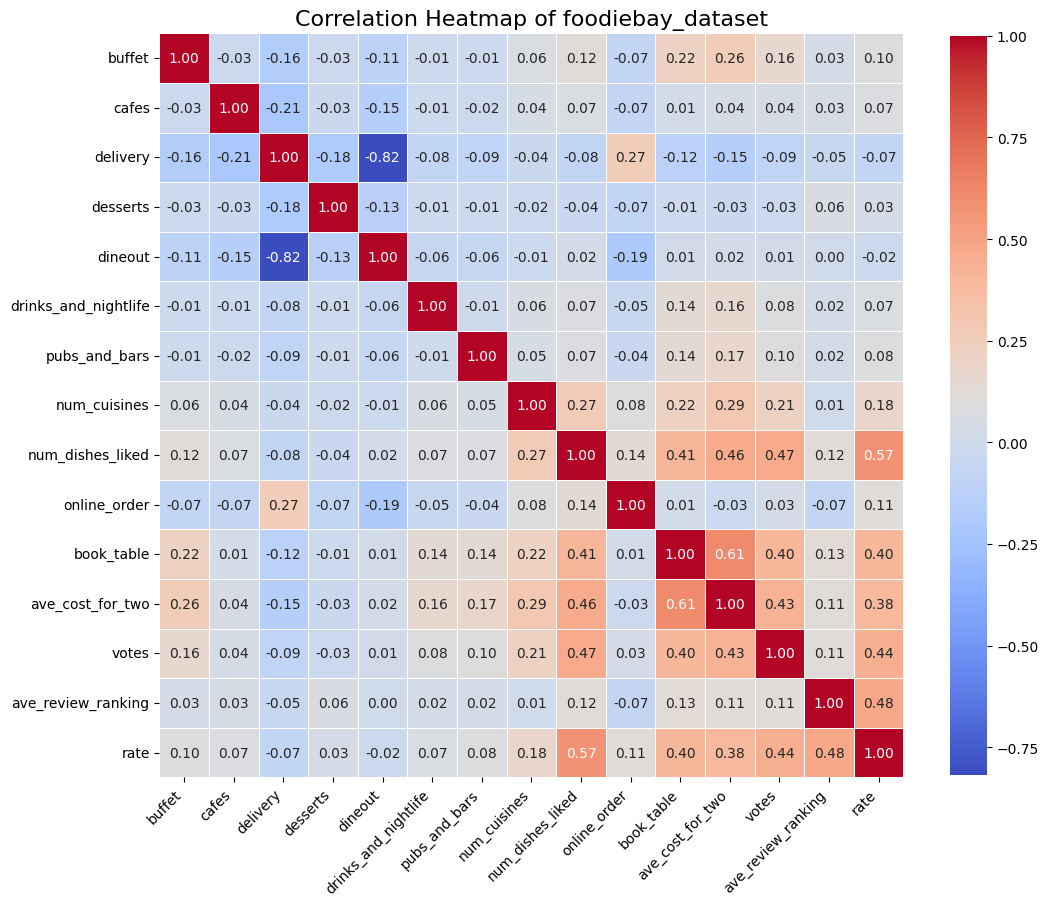

In [ ]:
# Create and display correlation heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of foodiebay_dataset", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()

buffet                  0.10
cafes                   0.07
delivery               -0.07
desserts                0.03
dineout                -0.02
drinks_and_nightlife    0.07
pubs_and_bars           0.08
num_cuisines            0.18
num_dishes_liked        0.57
online_order            0.11
book_table              0.40
ave_cost_for_two        0.38
votes                   0.44
ave_review_ranking      0.48
rate                    1.00
Name: rate, dtype: float64


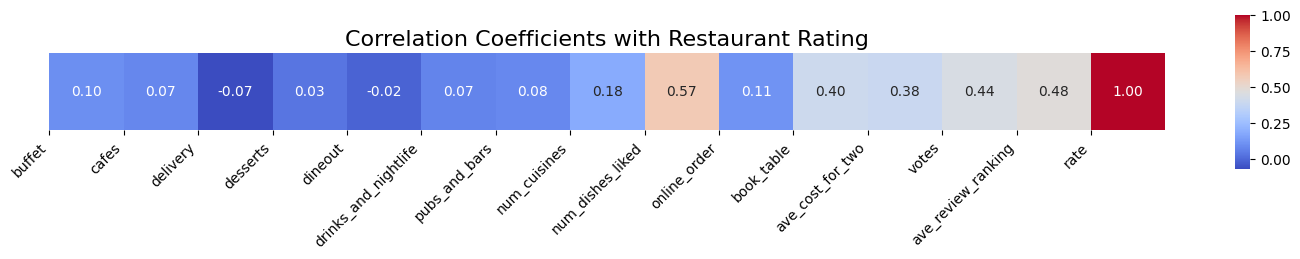

In [ ]:
# Extract correlation coefficients for 'rate' only
rate_correlation = correlation_matrix['rate']
print(rate_correlation)

# Reshape the correlation values for heatmap visualization
correlation_values = rate_correlation.values.reshape(1, -1)

# Create heatmap for the extracted correlation coefficients
plt.figure(figsize=(18, 1))
sns.heatmap(correlation_values, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={"shrink": 2, "aspect": 10})
plt.title("Correlation Coefficients with Restaurant Rating", fontsize=16)
plt.xticks(range(len(rate_correlation)), rate_correlation.index, rotation=45, ha='right', fontsize=10)
plt.yticks([])
plt.show()

# **6. Develop Supervised Machine Learning Models**

## **6.1. Select Features for Model Development**

In [ ]:
# Drop the 'rate' column from the DataFrame to consider only other variables
all_features = correlation_matrix['rate'].drop('rate')

# Select the top 5 features with the highest absolute correlation scores
selected_features = all_features.abs().nlargest(5).index.tolist()

# Print the selected features
print("Top 5 features with the highest absolute correlation scores:")
print(selected_features)

Top 5 features with the highest absolute correlation scores:
['num_dishes_liked', 'ave_review_ranking', 'votes', 'book_table', 'ave_cost_for_two']


In [ ]:
# Define the selected features for supervised machine learning models
selected_features = ['num_dishes_liked', 'ave_review_ranking', 'votes', 'book_table', 'ave_cost_for_two']
target = ['rate']

In [ ]:
# Create the new DataFrame 'foodiebay_sl' for K-Nearest Neighbors
foodiebay_sl1 = foodiebay_dataset[selected_features + target].copy()
foodiebay_sl1.to_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Assignment 2/foodiebay_sl1.csv", index=False)

In [ ]:
# Create the new DataFrame 'foodiebay_sl' for Decision Tree and Random Forest
foodiebay_sl2 = foodiebay_dataset[selected_features + target].copy()
foodiebay_sl2.to_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Assignment 2/foodiebay_sl2.csv", index=False)

## **6.3. Implement Model and Evaluate Model Performance - K-Nearest Neighbors**

### **6.3.1. Split and Scale Variables**

In [ ]:
# Load dataset for KNN
foodiebay_sl1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Assignment 2/foodiebay_sl1.csv")
print(foodiebay_sl1)

       num_dishes_liked  ave_review_ranking  votes  book_table  ave_cost_for_two  rate
0                     0                4.75     13           0            700.00  3.60
1                     0                4.50     28           0            400.00  3.80
2                     0                4.00     18           0            200.00  3.90
3                     7                4.80    550           1           1200.00  4.30
4                     5                3.00     67           0            250.00  3.70
...                 ...                 ...    ...         ...               ...   ...
30694                 2                3.00    200           1           1000.00  3.80
30695                 0                3.45     23           0            500.00  3.60
30696                 0                3.45     23           0            300.00  3.10
30697                 6                3.50    162           0            500.00  4.00
30698                 3                3.25

In [ ]:
# Select relevant predictors
X = foodiebay_sl1[selected_features]

# Select the target variable for prediction
y = foodiebay_sl1['rate']

In [ ]:
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2912)

In [ ]:
# Inspect the split datasets
print("Training dataset - Features:")
print(X_train.head())
print("\nTraining dataset - Target:")
print(y_train.head())

print("\nTraining dataset size:", X_train.shape)
print("Test dataset size:", X_test.shape)

Training dataset - Features:
       num_dishes_liked  ave_review_ranking  votes  book_table  ave_cost_for_two
13913                 0                3.83     11           0            300.00
18414                 0                5.00     23           0            800.00
6315                  4                4.29     69           0            500.00
21177                 0                4.75      7           0            250.00
14656                 0                2.85     15           0            600.00

Training dataset - Target:
13913   3.50
18414   3.80
6315    3.80
21177   3.40
14656   3.00
Name: rate, dtype: float64

Training dataset size: (24559, 5)
Test dataset size: (6140, 5)


In [ ]:
# Features to scale
features_to_scale = ['num_dishes_liked', 'ave_review_ranking', 'votes', 'ave_cost_for_two']

# Features to keep
features_to_keep = ['book_table']

In [ ]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler(clip=True)

In [ ]:
# Fit and transform the features to scale on the training data
X_train_scaled_values = scaler.fit_transform(X_train[features_to_scale])
# Transform the features to scale on the test data
X_test_scaled_values = scaler.transform(X_test[features_to_scale])

# Create DataFrames from the scaled values
X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=features_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_train_scaled = pd.concat([X_train_scaled, X_train[features_to_keep].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[features_to_keep].reset_index(drop=True)], axis=1)

In [ ]:
X_train_scaled.head(5)

num_dishes_liked  ave_review_ranking  votes  ave_cost_for_two  book_table
0              0.00                0.71   0.00              0.11           0
1              0.00                1.00   0.00              0.31           0
2              0.57                0.82   0.01              0.19           0
3              0.00                0.94   0.00              0.09           0
4              0.00                0.46   0.00              0.23           0

In [ ]:
X_train_scaled.describe().T

count  mean  std  min  25%  50%  75%  max
num_dishes_liked   24559.00  0.43 0.45 0.00 0.00 0.29 1.00 1.00
ave_review_ranking 24559.00  0.65 0.21 0.00 0.50 0.68 0.77 1.00
votes              24559.00  0.02 0.06 0.00 0.00 0.01 0.02 1.00
ave_cost_for_two   24559.00  0.21 0.14 0.00 0.11 0.19 0.27 1.00
book_table         24559.00  0.13 0.34 0.00 0.00 0.00 0.00 1.00

In [ ]:
# Fit and transform the target on the training data
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
# Transform the target to scale on the test data
y_test_scaled = scaler.transform(y_test.values.reshape(-1,1))

y_train_scaled = y_train_scaled.reshape(-1)
y_test_scaled = y_test_scaled.reshape(-1)

In [ ]:
print(y_train_scaled)

[0.5483871  0.64516129 0.64516129 ... 0.67741935 0.87096774 0.80645161]


### **6.3.2. Train a K-Nearest Neighbors Model and Make Predictions**

In [ ]:
# Create a KNN regressor
knn1 = KNeighborsRegressor(n_neighbors = 5)

In [ ]:
# Fit the model to the scaled training data
knn1.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor()

In [ ]:
# Perform prediction using the scaled test dataset
knn1_y_pred_scaled = knn1.predict(X_test_scaled)

In [ ]:
print(knn1_y_pred_scaled)

[0.52258065 0.52903226 0.75483871 ... 0.4516129  0.5483871  0.57419355]


In [ ]:
# Inverse transform the scaled predictions to the original scale
knn1_y_pred_scaled_reshaped = knn1_y_pred_scaled.reshape(-1, 1) # reshape the 1D array to a 2D array with a single feature for inverse transformation
knn1_y_pred = scaler.inverse_transform(knn1_y_pred_scaled_reshaped)

print(knn1_y_pred)

[[3.42]
 [3.44]
 [4.14]
 ...
 [3.2 ]
 [3.5 ]
 [3.58]]


### **6.3.3. Evaluate Model Performance**

* Root Mean Squared Error (RMSE) measures the differences between predicted and actual values of the target variable.

* Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted and actual values.

* R-Squared (R²) measures the proportion of variance in the target variable that can be explained by the independent variables - also called Coefficient of Determination.

**Training Set**

In [ ]:
# Convert knn1_y_pred to a 1D array to create DataFrame for inspection
knn1_y_pred = knn1_y_pred.flatten()
print(knn1_y_pred)

[3.42 3.44 4.14 ... 3.2  3.5  3.58]


In [ ]:
knn1_inspection = pd.DataFrame({'actual_rate':y_test, 'predicted_rate': knn1_y_pred})
knn1_inspection.head()

actual_rate  predicted_rate
26078         3.20            3.42
17601         3.60            3.44
28495         4.10            4.14
23412         3.50            3.46
18786         3.40            3.28

In [ ]:
# Calculate performance metrics for the first model
knn1_rmse = np.sqrt(mean_squared_error(y_test, knn1_y_pred))
knn1_r2 = r2_score(y_test, knn1_y_pred)
knn1_mae = mean_absolute_error(y_test, knn1_y_pred)

# Print performance metrics for the first model
print("Root Mean Squared Error (RMSE): {:.3f}".format(knn1_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(knn1_mae))
print("R-squared (R2): {:.3f}".format(knn1_r2))

Root Mean Squared Error (RMSE): 0.211
Mean Absolute Error (MAE): 0.125
R-squared (R2): 0.763


**Cross-Validation on Training Set**

In [ ]:
# Create a KFold object for 10-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2912)

In [ ]:
# Perform cross-validation on the KNN1 model for RMSE and R2 scores
knn1_neg_mse_scores = cross_val_score(knn1, X_train_scaled, y_train_scaled, cv=kf, scoring='neg_mean_squared_error')
knn1_r2_scores = cross_val_score(knn1, X_train_scaled, y_train_scaled, scoring='r2')

# Calculate RMSE (Root Mean Squared Error) from the negative mean squared error scores
knn1_rmse_scores = np.sqrt(-knn1_neg_mse_scores)

# Calculate mean and standard deviation of RMSE scores
knn1_mean_rmse = np.mean(knn1_rmse_scores)
knn1_std_rmse = np.std(knn1_rmse_scores)

# Calculate 95% confidence interval for mean RMSE
knn1_margin_of_error_rmse = 1.96 * (knn1_std_rmse / np.sqrt(len(knn1_rmse_scores)))
knn1_lower_bound_rmse = knn1_mean_rmse - knn1_margin_of_error_rmse
knn1_upper_bound_rmse = knn1_mean_rmse + knn1_margin_of_error_rmse

# Calculate mean and standard deviation of R2 scores
knn1_mean_r2 = np.mean(knn1_r2_scores)
knn1_std_r2 = np.std(knn1_r2_scores)

# Calculate 95% confidence interval for mean R2
knn1_margin_of_error_r2 = 1.96 * (knn1_std_r2 / np.sqrt(len(knn1_r2_scores)))
knn1_lower_bound_r2 = knn1_mean_r2 - knn1_margin_of_error_r2
knn1_upper_bound_r2 = knn1_mean_r2 + knn1_margin_of_error_r2

# Print the results with 95% confidence intervals in a more interpretable format for Decision Tree (DT)
print("Cross-Validation for Training Set - K-Nearest Neighbors (KNN1):")
print("\nAverage Root Mean Squared Error (RMSE): {:.3f}".format(knn1_mean_rmse))
print("95% Confidence Interval for RMSE: {:.3f} - {:.3f}".format(knn1_lower_bound_rmse, knn1_upper_bound_rmse))
print("\nAverage R-squared (R2): {:.3f}".format(knn1_mean_r2))
print("95% Confidence Interval for R2: {:.3f} - {:.3f}".format(knn1_lower_bound_r2, knn1_upper_bound_r2))

Cross-Validation for Training Set - K-Nearest Neighbors (KNN1):

Average Root Mean Squared Error (RMSE): 0.069
95% Confidence Interval for RMSE: 0.068 - 0.070

Average R-squared (R2): 0.739
95% Confidence Interval for R2: 0.733 - 0.746


### **6.3.4.Optimize k Value**

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 21))
cross_val_scores = []

# Train and evaluate KNN Regressor with different k values
best_k = 5
best_knn_rmse = 0.212
error_rates=[]

for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_scaled, y_train_scaled)
    knn_y_pred_scaled = knn.predict(X_test_scaled)
    knn_rmse = np.sqrt(mean_squared_error(y_test_scaled, knn_y_pred_scaled))
    error_rates.append(knn_rmse)
    if knn_rmse <= best_knn_rmse:
        best_k = k
        best_knn_rmse = knn_rmse

# Find the best k value with highest accuracy score
print(f"Best k value: {best_k}")
print(f"Best RMSE: {best_knn_rmse:.3f}")

Best k value: 1
Best RMSE: 0.058


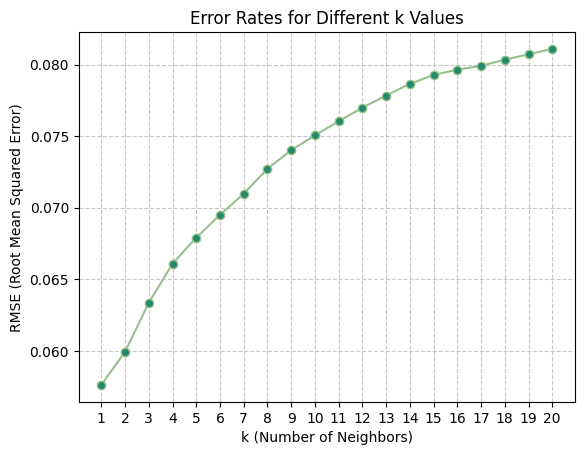

In [ ]:
# Plot k values against RMSE scores
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='#97C08E', markersize=6, markerfacecolor='#23896C')
plt.title('Error Rates for Different k Values')
plt.ylabel('RMSE (Root Mean Squared Error)')
plt.xlabel('k (Number of Neighbors)')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 21))

# Train and evaluate knn regressors with different k values
best_k = 5
best_knn_r2 = 0.763
knn_r2_scores = []

for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_scaled, y_train)
    knn_y_pred = knn.predict(X_test_scaled)

    knn_r2 = r2_score(y_test, knn_y_pred)  # calculate R^2
    knn_r2_scores.append(knn_r2)

    if knn_r2 >= best_knn_r2:  # set the condition to find the highest R^2
        best_k = k
        best_knn_r2 = knn_r2

# Find the best k value with the highest R^2 score
print(f"Best k value: {best_k}")
print(f"Best R-squared score: {best_knn_r2:.3f}")

Best k value: 1
Best R-squared score: 0.829


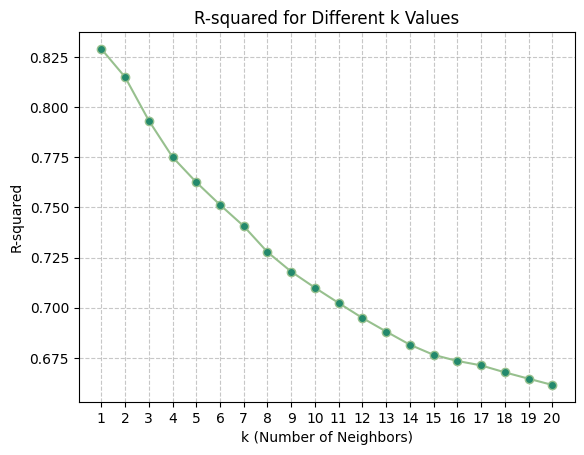

In [ ]:
# Plot k values against R-squared scores
plt.plot(k_values, knn_r2_scores, marker='o', linestyle='-', color='#97C08E', markersize=6, markerfacecolor='#23896C')
plt.ylabel('R-squared')
plt.xlabel('k (Number of Neighbors)')
plt.title('R-squared for Different k Values')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_values)

plt.show()

### **6.3.5. Rebuild Model with Optimal k and Evaluate Model Performance**

In [ ]:
# Create a KNN regressor using best k
knn2 = KNeighborsRegressor(n_neighbors = best_k) # k = 1

# Write code to fit the model to the scaled training data
knn2.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
# Perform prediction using the test dataset
knn2_y_pred_scaled = knn2.predict(X_test_scaled)

In [ ]:
# Inverse transform the scaled predictions to the original scale
knn2_y_pred_scaled_reshaped = knn2_y_pred_scaled.reshape(-1, 1) # reshape the 1D array to a 2D array with a single feature for inverse transformation
knn2_y_pred = scaler.inverse_transform(knn2_y_pred_scaled_reshaped)

In [ ]:
# Convert knn2_y_pred to a 1D array to create DataFrame for inspection
knn2_y_pred = knn2_y_pred.flatten()
print(knn2_y_pred)

[3.6 3.6 4.1 ... 3.2 3.5 3.5]


In [ ]:
knn2_inspection = pd.DataFrame({'actual_rate':y_test, 'predicted_rate': knn2_y_pred})
knn2_inspection.head()

actual_rate  predicted_rate
26078         3.20            3.60
17601         3.60            3.60
28495         4.10            4.10
23412         3.50            3.50
18786         3.40            3.40

In [ ]:
# Calculate performance metrics for the first model
knn2_rmse = np.sqrt(mean_squared_error(y_test, knn2_y_pred))
knn2_r2 = r2_score(y_test, knn2_y_pred)
knn2_mae = mean_absolute_error(y_test, knn2_y_pred)

# Print performance metrics for the first model
print("Root Mean Squared Error (RMSE): {:.3f}".format(knn2_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(knn2_mae))
print("R-squared (R2): {:.3f}".format(knn2_r2))

Root Mean Squared Error (RMSE): 0.179
Mean Absolute Error (MAE): 0.069
R-squared (R2): 0.829


### **6.3.6. Perform Cross-Validation**

In [ ]:
# Create a KFold object for 10-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2912)

In [ ]:
# Perform cross-validation on the KNN2 model for RMSE and R2 scores
knn2_neg_mse_scores = cross_val_score(knn2, X_train_scaled, y_train_scaled, cv=kf, scoring='neg_mean_squared_error')
knn2_r2_scores = cross_val_score(knn2, X_train_scaled, y_train_scaled, scoring='r2')

In [ ]:
# Calculate RMSE (Root Mean Squared Error) from the negative mean squared error scores
knn2_rmse_scores = np.sqrt(-knn2_neg_mse_scores)

# Calculate mean and standard deviation of RMSE scores
knn2_mean_rmse = np.mean(knn2_rmse_scores)
knn2_std_rmse = np.std(knn2_rmse_scores)

# Calculate 95% confidence interval for mean RMSE
knn2_margin_of_error_rmse = 1.96 * (knn2_std_rmse / np.sqrt(len(knn2_rmse_scores)))
knn2_lower_bound_rmse = knn2_mean_rmse - knn2_margin_of_error_rmse
knn2_upper_bound_rmse = knn2_mean_rmse + knn2_margin_of_error_rmse

In [ ]:
# Calculate mean and standard deviation of R2 scores
knn2_mean_r2 = np.mean(knn2_r2_scores)
knn2_std_r2 = np.std(knn2_r2_scores)

# Calculate 95% confidence interval for mean R2
knn2_margin_of_error_r2 = 1.96 * (knn2_std_r2 / np.sqrt(len(knn2_r2_scores)))
knn2_lower_bound_r2 = knn2_mean_r2 - knn2_margin_of_error_r2
knn2_upper_bound_r2 = knn2_mean_r2 + knn2_margin_of_error_r2

In [ ]:
# Print the results with 95% confidence intervals in a more interpretable format
print("Average Root Mean Squared Error (RMSE) - KNN2: {:.3f}".format(knn2_mean_rmse))
print("95% Confidence Interval for RMSE: {:.3f} - {:.3f}".format(knn2_lower_bound_rmse, knn2_upper_bound_rmse))
print("\nAverage R-squared (R2) - KNN2: {:.3f}".format(knn2_mean_r2))
print("95% Confidence Interval for R2: {:.3f} - {:.3f}".format(knn2_lower_bound_r2, knn2_upper_bound_r2))

Average Root Mean Squared Error (RMSE) - KNN2: 0.063
95% Confidence Interval for RMSE: 0.061 - 0.064

Average R-squared (R2) - KNN2: 0.784
95% Confidence Interval for R2: 0.782 - 0.787


In [ ]:
# Print the results with mean +/- error margin for KNN2
print("Average Root Mean Squared Error (RMSE) - KNN2: {:.3f} +/- {:.3f}".format(knn2_mean_rmse, knn2_margin_of_error_rmse))
print("Average R-squared (R2) - KNN2: {:.3f} +/- {:.3f}".format(knn2_mean_r2, knn2_margin_of_error_r2))

Average Root Mean Squared Error (RMSE) - KNN2: 0.063 +/- 0.002
Average R-squared (R2) - KNN2: 0.784 +/- 0.002


### **6.3.7. Conduct Post Analysis**

In [ ]:
knn2_inspection.describe()

actual_rate  predicted_rate
count      6140.00         6140.00
mean          3.66            3.66
std           0.43            0.43
min           2.00            2.00
25%           3.40            3.40
50%           3.70            3.70
75%           4.00            4.00
max           4.90            4.90

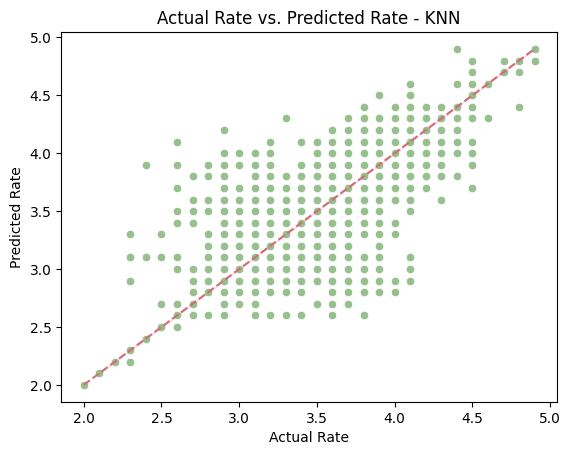

In [ ]:
sns.scatterplot(data = knn2_inspection, x = knn2_inspection.actual_rate, y = knn2_inspection.predicted_rate, color = '#97C08E')

# Line where Actual and Predicted are the same
sns.lineplot(x = knn2_inspection['actual_rate'], y = knn2_inspection['actual_rate'], color='#D26C75', linestyle='--')

plt.title('Actual Rate vs. Predicted Rate - KNN')
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')
plt.show()

In [ ]:
knn2_residuals = y_test - knn2_y_pred

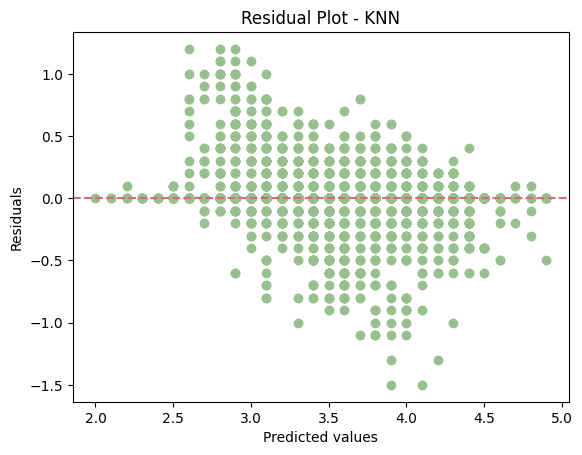

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(knn2_y_pred, knn2_residuals, color = '#97C08E')
plt.title('Residual Plot - KNN')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='#D26C75', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

## **6.4. Implement Model and Evaluate Model Performance - Decision Tree**

### **6.4.1. Split the Dataset**

In [ ]:
# Load dataset for Decision Tree and Random Forest
foodiebay_sl2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Assignment 2/foodiebay_sl2.csv")
print(foodiebay_sl2)

       num_dishes_liked  ave_review_ranking  votes  book_table  ave_cost_for_two  rate
0                     0                4.75     13           0            700.00  3.60
1                     0                4.50     28           0            400.00  3.80
2                     0                4.00     18           0            200.00  3.90
3                     7                4.80    550           1           1200.00  4.30
4                     5                3.00     67           0            250.00  3.70
...                 ...                 ...    ...         ...               ...   ...
30694                 2                3.00    200           1           1000.00  3.80
30695                 0                3.45     23           0            500.00  3.60
30696                 0                3.45     23           0            300.00  3.10
30697                 6                3.50    162           0            500.00  4.00
30698                 3                3.25

In [ ]:
# Select relevant predictors
X = foodiebay_sl2[selected_features]

# Select the target variable for prediction
y = foodiebay_sl2['rate']

In [ ]:
# Split dataset into training set 80% and test set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2912)

In [ ]:
# Inspect the split datasets
print("Training dataset - Features:")
print(X_train.head())
print("\nTraining dataset - Target:")
print(y_train.head())

print("\nTraining dataset size:", X_train.shape)
print("Test dataset size:", X_test.shape)

Training dataset - Features:
       num_dishes_liked  ave_review_ranking  votes  book_table  ave_cost_for_two
13913                 0                3.83     11           0            300.00
18414                 0                5.00     23           0            800.00
6315                  4                4.29     69           0            500.00
21177                 0                4.75      7           0            250.00
14656                 0                2.85     15           0            600.00

Training dataset - Target:
13913   3.50
18414   3.80
6315    3.80
21177   3.40
14656   3.00
Name: rate, dtype: float64

Training dataset size: (24559, 5)
Test dataset size: (6140, 5)


### **6.4.2. Train a Decision Tree Model and Make Predictions**

**Base Decision Tree**

In [ ]:
# Create Decision Tree regressor object
dt1 = DecisionTreeRegressor(random_state=2912)

In [ ]:
# Train base Decision Tree model using the training dataset
dt1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2912)

In [ ]:
# Perform prediction using the test dataset
dt1_y_test_pred = dt1.predict(X_test)

### **6.4.3. Evaluate Model Performance**

**Training Set**

In [ ]:
# Calculate evaluation metrics for the training set
dt1_y_train_pred = dt1.predict(X_train) # use the trained model to make predictions on the same training data it was trained on
dt1_train_rmse = np.sqrt(mean_squared_error(y_train, dt1_y_train_pred))
dt1_train_mae = mean_absolute_error(y_train, dt1_y_train_pred)
dt1_train_r2 = r2_score(y_train, dt1_y_train_pred)

# Print training set metrics
print("Training Set Metrics - Base Decision Tree:")
print("Root Mean Squared Error (RMSE): {:.3f}".format(dt1_train_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(dt1_train_mae))
print("R-squared (R2): {:.3f}".format(dt1_train_r2))

Training Set Metrics - Base Decision Tree:
Root Mean Squared Error (RMSE): 0.045
Mean Absolute Error (MAE): 0.011
R-squared (R2): 0.989


**Test Set**

In [ ]:
dt1_inspection = pd.DataFrame({'actual_rate':y_test, 'predicted_rate': dt1_y_test_pred})
dt1_inspection.head()

actual_rate  predicted_rate
26078         3.20            3.20
17601         3.60            3.60
28495         4.10            4.10
23412         3.50            3.47
18786         3.40            3.22

In [ ]:
# Calculate performance metrics for the base tree
dt1_test_rmse = np.sqrt(mean_squared_error(y_test, dt1_y_test_pred))
dt1_test_r2 = r2_score(y_test, dt1_y_test_pred)
dt1_test_mae = mean_absolute_error(y_test, dt1_y_test_pred)

# Print performance metrics for the base tree
print("Test Set Metrics - Base Decision Tree:")
print("Root Mean Squared Error (RMSE): {:.3f}".format(dt1_test_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(dt1_test_mae))
print("R-squared (R2): {:.3f}".format(dt1_test_r2))

Test Set Metrics - Base Decision Tree:
Root Mean Squared Error (RMSE): 0.178
Mean Absolute Error (MAE): 0.070
R-squared (R2): 0.830


**Cross-Validation on Training Set**

In [ ]:
# Create a KFold object for 10-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2912)

In [ ]:
# Perform cross-validation on the Decision Tree (DT1) model for RMSE and R2 scores
dt1_neg_mse_scores = cross_val_score(dt1, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
dt1_r2_scores = cross_val_score(dt1, X_train, y_train, scoring='r2')

# Calculate RMSE (Root Mean Squared Error) from the negative mean squared error scores
dt1_rmse_scores = np.sqrt(-dt1_neg_mse_scores)

# Calculate mean and standard deviation of RMSE scores
dt1_mean_rmse = np.mean(dt1_rmse_scores)
dt1_std_rmse = np.std(dt1_rmse_scores)

# Calculate 95% confidence interval for mean RMSE
dt1_margin_of_error_rmse = 1.96 * (dt1_std_rmse / np.sqrt(len(dt1_rmse_scores)))
dt1_lower_bound_rmse = dt1_mean_rmse - dt1_margin_of_error_rmse
dt1_upper_bound_rmse = dt1_mean_rmse + dt1_margin_of_error_rmse

# Calculate mean and standard deviation of R2 scores
dt1_mean_r2 = np.mean(dt1_r2_scores)
dt1_std_r2 = np.std(dt1_r2_scores)

# Calculate 95% confidence interval for mean R2
dt1_margin_of_error_r2 = 1.96 * (dt1_std_r2 / np.sqrt(len(dt1_r2_scores)))
dt1_lower_bound_r2 = dt1_mean_r2 - dt1_margin_of_error_r2
dt1_upper_bound_r2 = dt1_mean_r2 + dt1_margin_of_error_r2

# Print the results with 95% confidence intervals in a more interpretable format for Decision Tree (DT)
print("Cross-Validation for Training Set - Decision Tree (DT1):")
print("\nAverage Root Mean Squared Error (RMSE): {:.3f}".format(dt1_mean_rmse))
print("95% Confidence Interval for RMSE: {:.3f} - {:.3f}".format(dt1_lower_bound_rmse, dt1_upper_bound_rmse))
print("\nAverage R-squared (R2): {:.3f}".format(dt1_mean_r2))
print("95% Confidence Interval for R2: {:.3f} - {:.3f}".format(dt1_lower_bound_r2, dt1_upper_bound_r2))

Cross-Validation for Training Set - Decision Tree (DT1):

Average Root Mean Squared Error (RMSE): 0.193
95% Confidence Interval for RMSE: 0.188 - 0.197

Average R-squared (R2): 0.788
95% Confidence Interval for R2: 0.781 - 0.795


In [ ]:
# [Optional as the tree for this regression problem is too large] Visualize Base Decision Tree
#dot_data = StringIO()
#export_graphviz(dt1,
                #filled=True,
                #rounded = True,
                #special_characters = True,
                #feature_names = selected_features,
                #out_file = dot_data)

#base_graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Increase the image size
#plt.figure(figsize=(300, 200))

#base_graph.write_png('Restaurant Rating - Base DT.png')
#Image(base_graph.create_png())

### **6.4.4. Perform Hypermarameter Tuning**

**Post-prune Decision Tree (Cost-Complexity Pruning for Decision Trees)**

In [ ]:
# Calculate the Cost-Complexity Pruning Alphas for the existing Decision Tree
ccp_alphas = dt1.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']

# Print the number of values in ccp_alphas
num_ccp_alphas = len(ccp_alphas)
print("Number of values in ccp_alphas:", num_ccp_alphas)
print(ccp_alphas)

Number of values in ccp_alphas: 6692
[ 0.00000000e+00 -2.09767709e-18 -2.02524498e-18 ...  1.22531994e-02
  1.81397988e-02  5.73356163e-02]


In [ ]:
# Initialize a list to store pruned trees
pruned_trees = []

# Iterate through different alpha values and create pruned trees
for alpha in ccp_alphas:
    # Check if alpha is non-negative and not too close to zero
    if alpha >= 0.00001:  # set threshold to exclude very small or negative ccp_alpha values that might cause issues
        pruned_tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=2912)
        pruned_tree.fit(X_train, y_train)
        pruned_trees.append(pruned_tree)

In [ ]:
# Print the number of pruned trees
num_pruned_trees = len(pruned_trees)
print("Number of pruned trees:", num_pruned_trees)
print(pruned_trees)

Number of pruned trees: 925
[DecisionTreeRegressor(ccp_alpha=1.0076075301652024e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0084235113755468e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0134770788574802e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0136095408997271e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.014824582559271e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0159191482440962e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0179567571969543e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0179567571970122e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0183853705273233e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0199926707110072e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0214015532581197e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0257126182034284e-05, random_state=2912), DecisionTreeRegressor(ccp_alpha=1.0261004112544891e-05, rand

In [ ]:
# Evaluate each pruned tree on the test dataset and choose the best one
best_mse = float('inf')
best_pruned_tree = None

for tree in pruned_trees:
    y_pred = tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_pruned_tree = tree

In [ ]:
# Print the best Mean Squared Error (MSE) achieved by pruning and the best pruned tree
print("Best MSE (Pruned): {:.3f}".format(best_mse))
print("Best Pruned Tree:", best_pruned_tree)

Best MSE (Pruned): 0.038
Best Pruned Tree: DecisionTreeRegressor(ccp_alpha=1.0076075301652024e-05, random_state=2912)


In [ ]:
dt2 = best_pruned_tree

### **6.4.5. Rebuild Model with Optimal ccp_alpha and Evaluate Model Performance**

**Training Set**

In [ ]:
# Calculate predictions on the training set using the best pruned tree
dt2_y_train_pred = dt2.predict(X_train)

# Calculate evaluation metrics for the training set using the best pruned tree
dt2_train_rmse = np.sqrt(mean_squared_error(y_train, dt2_y_train_pred))
dt2_train_mae = mean_absolute_error(y_train, dt2_y_train_pred)
dt2_train_r2 = r2_score(y_train, dt2_y_train_pred)

# Print the metrics for the best pruned tree on training set
print("Training Set Metrics - Post-pruned Tree:")
print("Root Mean Squared Error (RMSE): {:.3f}".format(dt2_train_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(dt2_train_mae))
print("R-squared (R2): {:.3f}".format(dt2_train_r2))

Training Set Metrics - Post-pruned Tree:
Root Mean Squared Error (RMSE): 0.126
Mean Absolute Error (MAE): 0.088
R-squared (R2): 0.916


**Test Set**

In [ ]:
# Calculate predictions on the test set using the best pruned tree
dt2_y_test_pred = dt2.predict(X_test)

# Calculate evaluation metrics for the best pruned tree
dt2_test_rmse = np.sqrt(mean_squared_error(y_test, dt2_y_test_pred))
dt2_test_mae = mean_absolute_error(y_test, dt2_y_test_pred)
dt2_test_r2 = r2_score(y_test, dt2_y_test_pred)

# Print performance metrics for the best pruned tree on test set
print("Training Set Metrics - Post-pruned Tree:")
print("Root Mean Squared Error (RMSE): {:.3f}".format(dt2_test_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(dt2_test_mae))
print("R-squared (R2): {:.3f}".format(dt2_test_r2))

Training Set Metrics - Post-pruned Tree:
Root Mean Squared Error (RMSE): 0.195
Mean Absolute Error (MAE): 0.122
R-squared (R2): 0.796


In [ ]:
# Inspect model results
dt2_inspection = pd.DataFrame({'actual_rate':y_test, 'predicted_rate': dt2_y_test_pred})
dt2_inspection.head()

actual_rate  predicted_rate
26078         3.20            3.10
17601         3.60            3.62
28495         4.10            4.08
23412         3.50            3.52
18786         3.40            3.22

### **6.4.6. Perform Cross-Validation**

In [ ]:
# Create a KFold object for 10-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2912)

In [ ]:
# Perform cross-validation on the Decision Tree (DT2) model for RMSE and R2 scores
dt2_neg_mse_scores = cross_val_score(dt2, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
dt2_r2_scores = cross_val_score(dt2, X_train, y_train, scoring='r2')

In [ ]:
# Calculate RMSE (Root Mean Squared Error) from the negative mean squared error scores
dt2_rmse_scores = np.sqrt(-dt2_neg_mse_scores)

# Calculate mean and standard deviation of RMSE scores
dt2_mean_rmse = np.mean(dt2_rmse_scores)
dt2_std_rmse = np.std(dt2_rmse_scores)

# Calculate 95% confidence interval for mean RMSE
dt2_margin_of_error_rmse = 1.96 * (dt2_std_rmse / np.sqrt(len(dt2_rmse_scores)))
dt2_lower_bound_rmse = dt2_mean_rmse - dt2_margin_of_error_rmse
dt2_upper_bound_rmse = dt2_mean_rmse + dt2_margin_of_error_rmse

In [ ]:
# Calculate mean and standard deviation of R2 scores
dt2_mean_r2 = np.mean(dt2_r2_scores)
dt2_std_r2 = np.std(dt2_r2_scores)

# Calculate 95% confidence interval for mean R2
dt2_margin_of_error_r2 = 1.96 * (dt2_std_r2 / np.sqrt(len(dt2_r2_scores)))
dt2_lower_bound_r2 = dt2_mean_r2 - dt2_margin_of_error_r2
dt2_upper_bound_r2 = dt2_mean_r2 + dt2_margin_of_error_r2

In [ ]:
# Print the results with 95% confidence intervals in a more interpretable format for Decision Tree (DT2)
print("Average Root Mean Squared Error (RMSE) - Decision Tree (DT2): {:.3f}".format(dt2_mean_rmse))
print("95% Confidence Interval for RMSE: {:.3f} - {:.3f}".format(dt2_lower_bound_rmse, dt2_upper_bound_rmse))
print("\nAverage R-squared (R2) - Decision Tree (DT2): {:.3f}".format(dt2_mean_r2))
print("95% Confidence Interval for R2: {:.3f} - {:.3f}".format(dt2_lower_bound_r2, dt2_upper_bound_r2))

Average Root Mean Squared Error (RMSE) - Decision Tree (DT2): 0.205
95% Confidence Interval for RMSE: 0.201 - 0.209

Average R-squared (R2) - Decision Tree (DT2): 0.764
95% Confidence Interval for R2: 0.758 - 0.770


In [ ]:
# Print the results with mean +/- error margin for Decision Tree (DT)
print("Average Root Mean Squared Error (RMSE) - Decision Tree (DT2): {:.3f} +/- {:.3f}".format(dt2_mean_rmse, dt2_margin_of_error_rmse))
print("Average R-squared (R2) - Decision Tree (DT2): {:.3f} +/- {:.3f}".format(dt2_mean_r2, dt2_margin_of_error_r2))

Average Root Mean Squared Error (RMSE) - Decision Tree (DT2): 0.205 +/- 0.004
Average R-squared (R2) - Decision Tree (DT2): 0.764 +/- 0.006


### **6.4.7. Conduct Post Analysis**

In [ ]:
dt2_inspection.describe()

actual_rate  predicted_rate
count      6140.00         6140.00
mean          3.66            3.66
std           0.43            0.41
min           2.00            2.10
25%           3.40            3.40
50%           3.70            3.70
75%           4.00            3.94
max           4.90            4.77

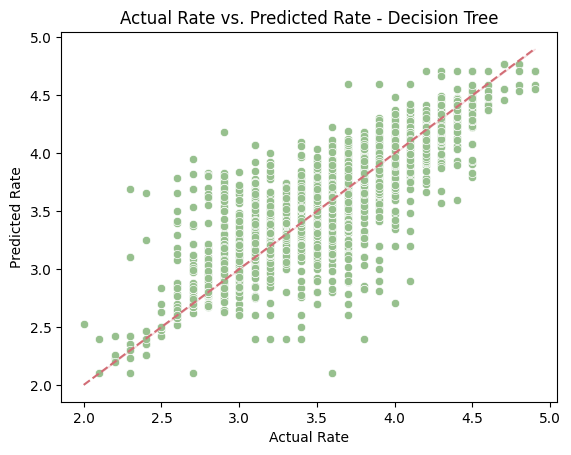

In [ ]:
sns.scatterplot(data = dt2_inspection, x = dt2_inspection.actual_rate, y = dt2_inspection.predicted_rate, color = '#97C08E')

# Line where Actual and Predicted are the same
sns.lineplot(x = dt2_inspection['actual_rate'], y = dt2_inspection['actual_rate'], color='#D26C75', linestyle='--')

plt.title('Actual Rate vs. Predicted Rate - Decision Tree')
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')
plt.show()

In [ ]:
dt2_residuals = y_test - dt2_y_test_pred

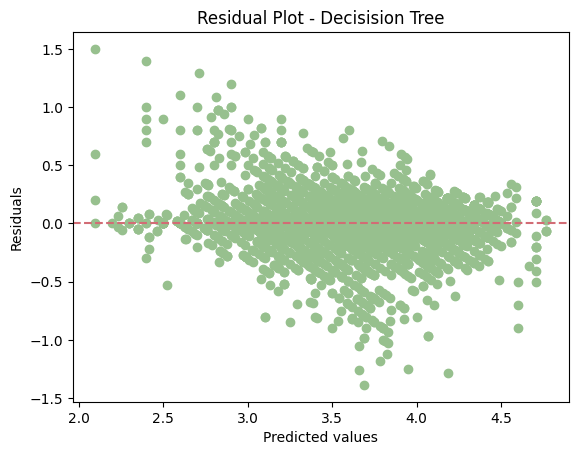

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(dt2_y_test_pred, dt2_residuals, color='#97C08E')
plt.title('Residual Plot - Decisision Tree')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='#D26C75', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

## **6.5. Implement Model and Evaluate Model Performance - Random Forest**

### **6.5.1. Split the Dataset**

The dataset was splitted in 6.4.1

### **6.5.2. Train a Random Forest Model and Make Predictions**

**Base Random Forest**

In [ ]:
# Create the random forest regressor ensemble learner model
rf1 = RandomForestRegressor(random_state = 2912)

# Train the model on the training data
rf1.fit(X_train, y_train)

RandomForestRegressor(random_state=2912)

In [ ]:
# Make predictions on the testing data
rf1_y_test_pred = rf1.predict(X_test)

### **6.5.3. Evaluate Model Performance**

**Training Set**

In [ ]:
# Calculate evaluation metrics for the training set
rf1_y_train_pred = rf1.predict(X_train) # use the trained model to make predictions on the same training data it was trained on
rf1_train_rmse = np.sqrt(mean_squared_error(y_train, rf1_y_train_pred))
rf1_train_mae = mean_absolute_error(y_train, rf1_y_train_pred)
rf1_train_r2 = r2_score(y_train, rf1_y_train_pred)

# Print training set metrics
print("Training Set Metrics - Base Random Forest:")
print("Root Mean Squared Error (RMSE): {:.3f}".format(rf1_train_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(rf1_train_mae))
print("R-squared (R2): {:.3f}".format(rf1_train_r2))

Training Set Metrics - Base Random Forest:
Root Mean Squared Error (RMSE): 0.069
Mean Absolute Error (MAE): 0.035
R-squared (R2): 0.975


**Test Set**

In [ ]:
rf1_inspection = pd.DataFrame({'actual_rate':y_test, 'predicted_rate': rf1_y_test_pred})
rf1_inspection.head()

actual_rate  predicted_rate
26078         3.20            3.19
17601         3.60            3.59
28495         4.10            4.10
23412         3.50            3.47
18786         3.40            3.23

In [ ]:
# Calculate evaluation metrics for the test set
rf1_test_rmse = np.sqrt(mean_squared_error(y_test, rf1_y_test_pred))
rf1_test_r2 = r2_score(y_test, rf1_y_test_pred)
rf1_test_mae = mean_absolute_error(y_test, rf1_y_test_pred)

# Print performance metrics for the base tree
print("Test Set Metrics - Base Random Forest:")
print("Root Mean Squared Error (RMSE): {:.3f}".format(rf1_test_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(rf1_test_mae))
print("R-squared (R2): {:.3f}".format(rf1_test_r2))

Test Set Metrics - Base Random Forest:
Root Mean Squared Error (RMSE): 0.147
Mean Absolute Error (MAE): 0.075
R-squared (R2): 0.885


**Cross-Validation on Training Set**

In [ ]:
# Create a KFold object for 10-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2912)

In [ ]:
# Perform cross-validation on the Random Forest (RF1) model for RMSE and R2 scores
rf1_neg_mse_scores = cross_val_score(rf1, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf1_r2_scores = cross_val_score(rf1, X_train, y_train, scoring='r2')

# Calculate RMSE (Root Mean Squared Error) from the negative mean squared error scores
rf1_rmse_scores = np.sqrt(-rf1_neg_mse_scores)

# Calculate mean and standard deviation of RMSE scores
rf1_mean_rmse = np.mean(rf1_rmse_scores)
rf1_std_rmse = np.std(rf1_rmse_scores)

# Calculate 95% confidence interval for mean RMSE
rf1_margin_of_error_rmse = 1.96 * (rf1_std_rmse / np.sqrt(len(rf1_rmse_scores)))
rf1_lower_bound_rmse = rf1_mean_rmse - rf1_margin_of_error_rmse
rf1_upper_bound_rmse = rf1_mean_rmse + rf1_margin_of_error_rmse

# Calculate mean and standard deviation of R2 scores
rf1_mean_r2 = np.mean(rf1_r2_scores)
rf1_std_r2 = np.std(rf1_r2_scores)

# Calculate 95% confidence interval for mean R2
rf1_margin_of_error_r2 = 1.96 * (rf1_std_r2 / np.sqrt(len(rf1_r2_scores)))
rf1_lower_bound_r2 = rf1_mean_r2 - rf1_margin_of_error_r2
rf1_upper_bound_r2 = rf1_mean_r2 + rf1_margin_of_error_r2

# Print the results with 95% confidence intervals in a more interpretable format for Decision Tree (DT)
print("Cross-Validation for Training Set - Random Forest (RF1):")
print("\nAverage Root Mean Squared Error (RMSE): {:.3f}".format(rf1_mean_rmse))
print("95% Confidence Interval for RMSE: {:.3f} - {:.3f}".format(rf1_lower_bound_rmse, rf1_upper_bound_rmse))
print("\nAverage R-squared (R2): {:.3f}".format(rf1_mean_r2))
print("95% Confidence Interval for R2: {:.3f} - {:.3f}".format(rf1_lower_bound_r2, rf1_upper_bound_r2))

Cross-Validation for Training Set - Random Forest (RF1):

Average Root Mean Squared Error (RMSE): 0.156
95% Confidence Interval for RMSE: 0.152 - 0.160

Average R-squared (R2): 0.858
95% Confidence Interval for R2: 0.852 - 0.865


### **6.5.4. Perform Hyperparameter Tuning**

**Pre-prune Randome Forest**

In [ ]:
# Define a parameter grid for hyperparameter tuning
rf2_param_grid = {
    'n_estimators': [50, 100, 200],           # number of trees in the forest
    'max_depth': [10, 20, 40],                # maximum depth of each tree
    'min_samples_split': [2, 4, 6],           # minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],            # minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt'],         # number of features to consider when looking for the best split
}

In [ ]:
# Create a GridSearchCV object
rf2_grid_search = GridSearchCV(estimator=rf1,
                           param_grid=rf2_param_grid,
                           cv=5,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           refit='r2',
                           n_jobs=-1)

In [ ]:
# Fit the GridSearchCV object to the data
rf2_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2912),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             refit='r2', scoring=['r2', 'neg_mean_absolute_error'])

In [ ]:
# Get the best hyperparameters
rf2_params = rf2_grid_search.best_params_
print(rf2_params)

{'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Convert the cv_results_ attribute to a pandas DataFrame
rf2_gridsearchcv_results = pd.DataFrame(rf2_grid_search.cv_results_)

# Sort the DataFrame by the 'mean_test_r2' column in descending order
rf2_gridsearchcv_results = rf2_gridsearchcv_results.sort_values(by='mean_test_r2', ascending=False)

# Save the DataFrame to a CSV file
rf2_gridsearchcv_results.to_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Assignment 2/rf2_gridsearchcv_results.csv", index=False)

After reviewing the .csv file for hyperparameters and corresponding model performance, model with 200 and 100 trees in the forest resulted in R-squared equal to 0.8708 and 0.8693 respectively. Since the difference is not significant, we will keep the n_estimators at 100 to accelerate the training process.

### **6.5.5. Rebuild Model with Optimal Hyperparameters and Evaluate Model Performance**

In [ ]:
rf2 = RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=2912)
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', random_state=2912)

**Training Set**

In [ ]:
# Calculate predictions on the training set using the best pruned tree
rf2_y_train_pred = rf2.predict(X_train)

# Calculate evaluation metrics for the training set using the best pruned tree
rf2_train_rmse = np.sqrt(mean_squared_error(y_train, rf2_y_train_pred))
rf2_train_mae = mean_absolute_error(y_train, rf2_y_train_pred)
rf2_train_r2 = r2_score(y_train, rf2_y_train_pred)

# Print the metrics for the best pruned tree on both training and test sets
print("Training Set Metrics - Tuned Random Forest:")
print("Root Mean Squared Error (RMSE): {:.3f}".format(rf2_train_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(rf2_train_mae))
print("R-squared (R2): {:.3f}".format(rf2_train_r2))

Training Set Metrics - Tuned Random Forest:
Root Mean Squared Error (RMSE): 0.067
Mean Absolute Error (MAE): 0.034
R-squared (R2): 0.976


**Test Set**

In [ ]:
# Calculate predictions on the test set using the best pruned tree
rf2_y_test_pred = rf2.predict(X_test)

# Calculate evaluation metrics for the best pruned tree
rf2_test_rmse = np.sqrt(mean_squared_error(y_test, rf2_y_test_pred))
rf2_test_mae = mean_absolute_error(y_test, rf2_y_test_pred)
rf2_test_r2 = r2_score(y_test, rf2_y_test_pred)

# Print performance metrics for the best pruned tree
print("Test Set Metrics - Tuned Random Forest:")
print("Root Mean Squared Error (RMSE): {:.3f}".format(rf2_test_rmse))
print("Mean Absolute Error (MAE): {:.3f}".format(rf2_test_mae))
print("R-squared (R2): {:.3f}".format(rf2_test_r2))

Test Set Metrics - Tuned Random Forest:
Root Mean Squared Error (RMSE): 0.141
Mean Absolute Error (MAE): 0.072
R-squared (R2): 0.894


In [ ]:
# Inspect model results
rf2_inspection = pd.DataFrame({'actual_rate':y_test, 'predicted_rate': rf2_y_test_pred})
rf2_inspection.head()

actual_rate  predicted_rate
26078         3.20            3.22
17601         3.60            3.60
28495         4.10            4.11
23412         3.50            3.47
18786         3.40            3.23

### **6.5.6. Perform Cross-Validation**

In [ ]:
# Create a KFold object for 10-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2912)

In [ ]:
# Perform cross-validation on the Random Forest (RF2) model for RMSE and R2 scores
rf2_neg_mse_scores = cross_val_score(rf2, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf2_r2_scores = cross_val_score(rf2, X_train, y_train, scoring='r2')

In [ ]:
# Calculate RMSE (Root Mean Squared Error) from the negative mean squared error scores
rf2_rmse_scores = np.sqrt(-rf2_neg_mse_scores)

# Calculate mean and standard deviation of RMSE scores
rf2_mean_rmse = np.mean(rf2_rmse_scores)
rf2_std_rmse = np.std(rf2_rmse_scores)

# Calculate 95% confidence interval for mean RMSE
rf2_margin_of_error_rmse = 1.96 * (rf2_std_rmse / np.sqrt(len(rf2_rmse_scores)))
rf2_lower_bound_rmse = rf2_mean_rmse - rf2_margin_of_error_rmse
rf2_upper_bound_rmse = rf2_mean_rmse + rf2_margin_of_error_rmse

In [ ]:
# Calculate mean and standard deviation of R2 scores
rf2_mean_r2 = np.mean(rf2_r2_scores)
rf2_std_r2 = np.std(rf2_r2_scores)

# Calculate 95% confidence interval for mean R2
rf2_margin_of_error_r2 = 1.96 * (rf2_std_r2 / np.sqrt(len(rf2_r2_scores)))
rf2_lower_bound_r2 = rf2_mean_r2 - rf2_margin_of_error_r2
rf2_upper_bound_r2 = rf2_mean_r2 + rf2_margin_of_error_r2

In [ ]:
# Print the results with 95% confidence intervals in a more interpretable format for Random Forest (RF)
print("Average Root Mean Squared Error (RMSE) - Random Forest (RF2): {:.3f}".format(rf2_mean_rmse))
print("95% Confidence Interval for RMSE: {:.3f} - {:.3f}".format(rf2_lower_bound_rmse, rf2_upper_bound_rmse))
print("\nAverage R-squared (R2) - Random Forest (RF2): {:.3f}".format(rf2_mean_r2))
print("95% Confidence Interval for R2: {:.3f} - {:.3f}".format(rf2_lower_bound_r2, rf2_upper_bound_r2))

Average Root Mean Squared Error (RMSE) - Random Forest (RF2): 0.149
95% Confidence Interval for RMSE: 0.146 - 0.152

Average R-squared (R2) - Random Forest (RF2): 0.869
95% Confidence Interval for R2: 0.864 - 0.874


In [ ]:
# Print the results with mean +/- error margin for Random Forest (RF)
print("Average Root Mean Squared Error (RMSE) - Random Forest (RF2): {:.3f} +/- {:.3f}".format(rf2_mean_rmse, rf2_margin_of_error_rmse))
print("Average R-squared (R2) - Random Forest (RF2): {:.3f} +/- {:.3f}".format(rf2_mean_r2, rf2_margin_of_error_r2))

Average Root Mean Squared Error (RMSE) - Random Forest (RF2): 0.149 +/- 0.003
Average R-squared (R2) - Random Forest (RF2): 0.869 +/- 0.005


### **6.5.7. Conduct Post Analysis**

In [ ]:
rf2_inspection.describe()

actual_rate  predicted_rate
count      6140.00         6140.00
mean          3.66            3.66
std           0.43            0.40
min           2.00            2.19
25%           3.40            3.40
50%           3.70            3.70
75%           4.00            3.94
max           4.90            4.89

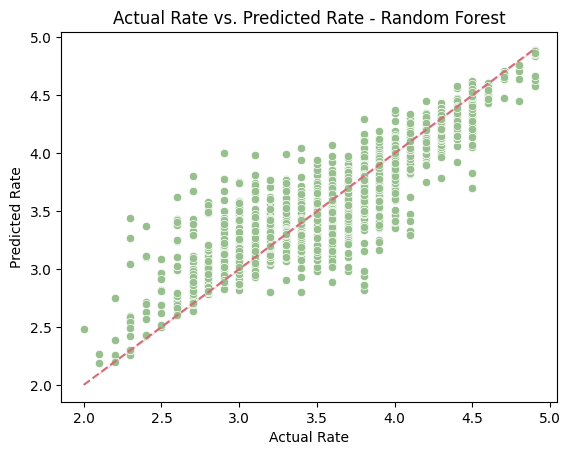

In [ ]:
sns.scatterplot(data = rf2_inspection, x = rf2_inspection.actual_rate, y = rf2_inspection.predicted_rate, color = '#97C08E')

# Line where Actual and Predicted are the same
sns.lineplot(x=rf2_inspection['actual_rate'], y=rf2_inspection['actual_rate'], color='#D26C75', linestyle='--')

plt.title('Actual Rate vs. Predicted Rate - Random Forest')
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')
plt.show()

In [ ]:
rf2_residuals = y_test - rf2_y_test_pred

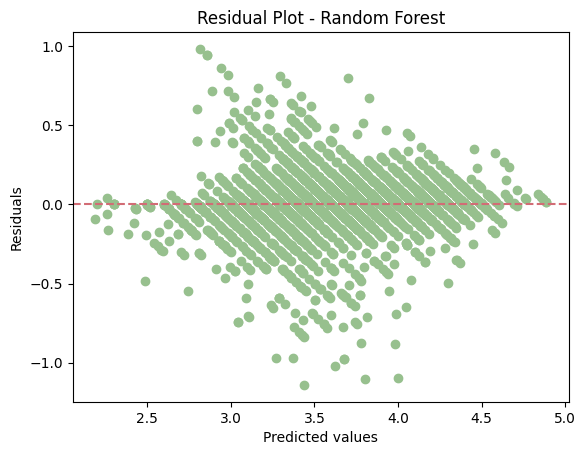

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(rf2_y_test_pred, rf2_residuals, color = '#97C08E')
plt.title('Residual Plot - Random Forest')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='#D26C75', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

# **7. Develop Unsupervised Machine Learning Model - K-Means Clustering**

## **7.1. Select and Scale Variables**

In [ ]:
print(foodiebay_dataset)

                    location         listed_in_city           rest_type listed_in_type  buffet  cafes  delivery  desserts  dineout  drinks_and_nightlife  pubs_and_bars                               cuisines  num_cuisines                                         dish_liked  num_dishes_liked  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate
0          Bannerghatta Road               JP Nagar                Cafe          Cafes       0      1         0         0        0                     0              0                                   Cafe             1                                               None                 0             0           0            700.00     13                4.75  3.60
1      Koramangala 1st Block  Koramangala 5th Block         Quick Bites       Dine-out       0      0         0         0        1                     0              0         Burger, Continental, Fast Food             3                                              

In [ ]:
# Select features for K-means clustering
cols_to_drop = ['location', 'rest_type', 'buffet', 'cafes', 'delivery', 'desserts', 'dineout', 'drinks_and_nightlife', 'pubs_and_bars']

In [ ]:
# Create the new DataFrame 'foodiebay_ul' for Unsupervised Learning models
foodiebay_ul = foodiebay_dataset.drop(cols_to_drop, axis=1).copy()
foodiebay_ul.to_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Assignment 2/foodiebay_ul.csv", index=False)

In [ ]:
# Load dataset for Unsupervised Machine Learning
foodiebay_ul = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710 2023 T2/Assignment 2/foodiebay_ul.csv")
print(foodiebay_ul)

              listed_in_city listed_in_type                               cuisines  num_cuisines                                         dish_liked  num_dishes_liked  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate
0                   JP Nagar          Cafes                                   Cafe             1                                               None                 0             0           0            700.00     13                4.75  3.60
1      Koramangala 5th Block       Dine-out         Burger, Continental, Fast Food             3                                               None                 0             1           0            400.00     28                4.50  3.80
2                  Jayanagar       Delivery             South Indian, Healthy Food             2                                               None                 0             1           0            200.00     18                4.00  3.90
3               Brigade Road

In [ ]:
foodiebay_ul.describe().T

count   mean    std   min    25%    50%    75%      max
num_cuisines       30699.00   2.57   1.31  1.00   2.00   2.00   3.00     8.00
num_dishes_liked   30699.00   2.99   3.12  0.00   0.00   2.00   7.00     7.00
online_order       30699.00   0.70   0.46  0.00   0.00   1.00   1.00     1.00
book_table         30699.00   0.13   0.34  0.00   0.00   0.00   0.00     1.00
ave_cost_for_two   30699.00 550.86 340.77 40.00 300.00 500.00 700.00  2500.00
votes              30699.00 291.53 667.40  0.00  22.00  72.00 254.00 12121.00
ave_review_ranking 30699.00   3.59   0.86  1.00   3.00   3.71   4.10     5.00
rate               30699.00   3.66   0.43  1.80   3.40   3.70   4.00     4.90

In [ ]:
selected_features = ['num_cuisines', 'online_order', 'book_table', 'ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']
X = foodiebay_ul[selected_features]

In [ ]:
# Features to scale
features_to_scale = ['num_cuisines', 'ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']

# Features to keep
features_to_keep = ['online_order', 'book_table']

In [ ]:
# Initialize Min-Max Scaler
scaler = MinMaxScaler(clip=True)

In [ ]:
# Fit and transform the features to scale
X_scaled_values = scaler.fit_transform(X[features_to_scale])

# Create DataFrames from the scaled values
X_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_scaled = pd.concat([X_scaled, X[features_to_keep].reset_index(drop=True)], axis=1)

In [ ]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30699 entries, 0 to 30698
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_cuisines        30699 non-null  float64
 1   ave_cost_for_two    30699 non-null  float64
 2   votes               30699 non-null  float64
 3   ave_review_ranking  30699 non-null  float64
 4   rate                30699 non-null  float64
 5   online_order        30699 non-null  int64  
 6   book_table          30699 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.6 MB


In [ ]:
X_scaled.describe().T

count  mean  std  min  25%  50%  75%  max
num_cuisines       30699.00  0.22 0.19 0.00 0.14 0.14 0.29 1.00
ave_cost_for_two   30699.00  0.21 0.14 0.00 0.11 0.19 0.27 1.00
votes              30699.00  0.02 0.06 0.00 0.00 0.01 0.02 1.00
ave_review_ranking 30699.00  0.65 0.21 0.00 0.50 0.68 0.77 1.00
rate               30699.00  0.60 0.14 0.00 0.52 0.61 0.71 1.00
online_order       30699.00  0.70 0.46 0.00 0.00 1.00 1.00 1.00
book_table         30699.00  0.13 0.34 0.00 0.00 0.00 0.00 1.00

## **7.2. Build K-Means Clustering Model**

In [ ]:
# Set an initial value for K and initialize 'kmeans' object
k = 2
kmeans = KMeans(n_clusters=k, n_init=15, max_iter=300, random_state=2912)

In [ ]:
# Fit K-means clustering model with an initially selected number of clusters
cluster_labels = kmeans.fit(X_scaled)

## **7.3. Evaluate Clusters**

### **7.3.1. Within-Cluster Sum of Squares (SSE)**

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

Within-Cluster Sum of Squares (WCSS): 7185.086


### **7.3.2. The Davies-Bouldin Index (DBI)**

In [ ]:
# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 0.827


### **7.3.3. Silhouette Score**

In [ ]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.520


## **7.4. Optimize k**

In [ ]:
# Generate a range of K values to evaluate
k_values = range(2, 11)

# Initialize empty lists to store evaluation scores
wcss_scores = []
davies_bouldin_scores = []
silhouette_scores = []

# Loop through different values of K and evaluate the model
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=2912)
    kmeans.fit(X_scaled)

    # Evaluate WCSS (Within-Cluster Sum of Squares)
    wcss_scores.append(kmeans.inertia_)

    # Evaluate Davies-Bouldin index
    dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
    davies_bouldin_scores.append(dbs)

    # Evaluate Silhouette score
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

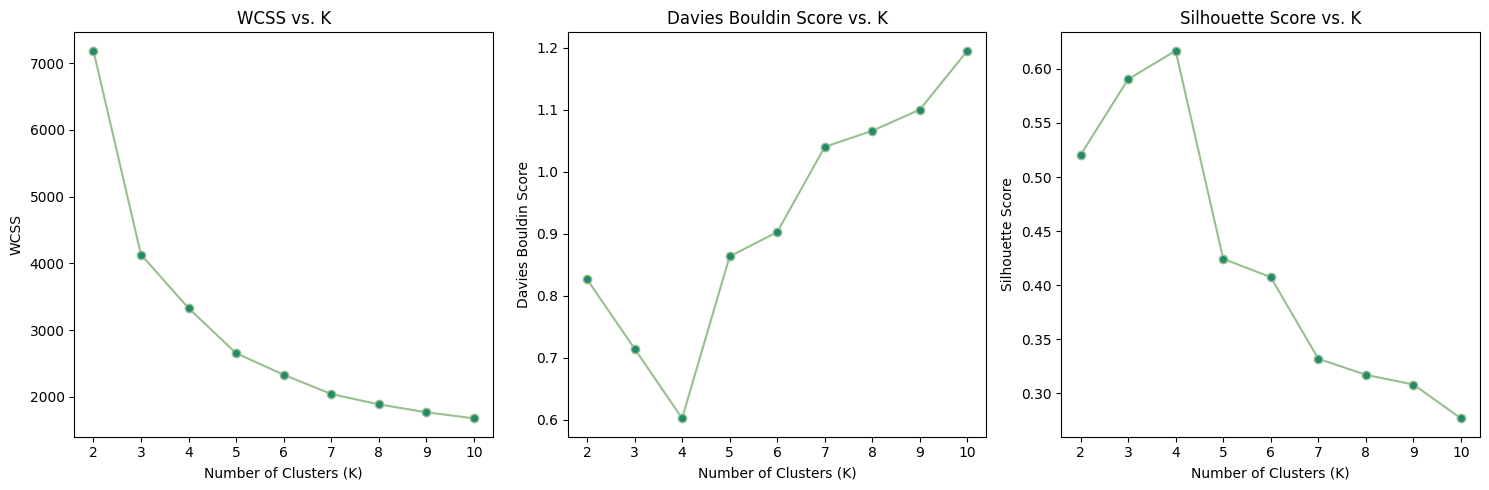

In [ ]:
# Create subplots for each evaluation metric
plt.figure(figsize=(15, 5))

# Plot WCSS
plt.subplot(131)
plt.plot(k_values, wcss_scores, color='#97C08E', marker='o', markerfacecolor='#23896C')
plt.title('WCSS vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

# Plot Davies-Bouldin score
plt.subplot(132)
plt.plot(k_values, davies_bouldin_scores, color='#97C08E', marker='o', markerfacecolor='#23896C')
plt.title('Davies Bouldin Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies Bouldin Score')

# Plot Silhouette score
plt.subplot(133)
plt.plot(k_values, silhouette_scores, color='#97C08E', marker='o', markerfacecolor='#23896C')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## **7.5. Select Model**

In [ ]:
# Create and fit the K-Means model with the best_k value
best_k=4
kmeans = KMeans(n_clusters=best_k, n_init=10, max_iter=300, random_state=2912)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=2912)

In [ ]:
# Get the cluster labels
cluster = kmeans.labels_

In [ ]:
# Add cluster labels to original dataset
foodiebay_ul['cluster'] = kmeans.labels_
print(foodiebay_ul)

              listed_in_city listed_in_type                               cuisines  num_cuisines                                         dish_liked  num_dishes_liked  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate  cluster
0                   JP Nagar          Cafes                                   Cafe             1                                               None                 0             0           0            700.00     13                4.75  3.60        2
1      Koramangala 5th Block       Dine-out         Burger, Continental, Fast Food             3                                               None                 0             1           0            400.00     28                4.50  3.80        0
2                  Jayanagar       Delivery             South Indian, Healthy Food             2                                               None                 0             1           0            200.00     18                4.00  3.90  

In [ ]:
# Calculate Silhouette values for each data point
silhouette_vals = silhouette_samples(X_scaled, cluster, metric='euclidean')

# Find the unique cluster labels
unique_cluster_labels = np.unique(cluster)
# Calculate the number of clusters
n_clusters = unique_cluster_labels.shape[0]

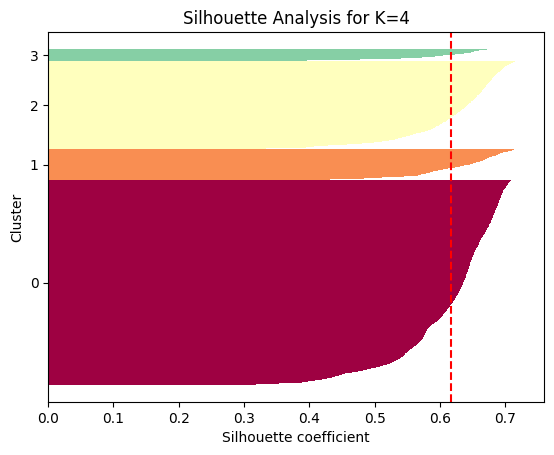

In [ ]:
# Initialize lower and upper y-axis for plotting
y_ax_lower, y_ax_upper = 0, 0

# Create a list for y-ticks
yticks = []

# Create the silhouette plot
for i, c in enumerate(unique_cluster_labels):
    c_silhouette_vals = silhouette_vals[cluster == c]                                                             # extract silhouette values for data points in cluster 'c'
    c_silhouette_vals.sort()                                                                                      # sort silhouette values in ascending order
    y_ax_upper += len(c_silhouette_vals)                                                                          # update the upper limit of the y-axis for the current cluster
    color = cm.Spectral(float(i) / n_clusters)                                                                     # select a color for the bars based on cluster index
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)         # plot a horizontal bar for silhouette values of the current cluster
    yticks.append((y_ax_lower + y_ax_upper) / 2.)                                                                 # calculate the vertical position for the y-axis label
    y_ax_lower += len(c_silhouette_vals)                                                                          # update the lower limit of the y-axis for the next cluster

# Calculate the average silhouette score
silhouette_avg = np.mean(silhouette_vals)
# Add a vertical line for the average silhouette score
plt.axvline(silhouette_avg, color="red", linestyle="--")

# Set y-ticks to represent cluster labels
plt.yticks(yticks, unique_cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Analysis for K={}'.format(best_k))

plt.show()

## **7.6. Conduct Post Analysis for Cluster Profiling**

In [ ]:
foodiebay_ul[['num_cuisines', 'online_order', 'book_table', 'ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate', 'cluster']]

num_cuisines  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate  cluster
0                 1             0           0            700.00     13                4.75  3.60        2
1                 3             1           0            400.00     28                4.50  3.80        0
2                 2             1           0            200.00     18                4.00  3.90        0
3                 4             1           1           1200.00    550                4.80  4.30        1
4                 2             1           0            250.00     67                3.00  3.70        0
...             ...           ...         ...               ...    ...                 ...   ...      ...
30694             3             0           1           1000.00    200                3.00  3.80        3
30695             2             1           0            500.00     23                3.45  3.60        0
30696             3             0           0            300.00     23                3.45  3.10        2
30697             4             1           0            500.00    162                3.50  4.00        0
30698             3             1           0            350.00    163                3.25  3.10        0

[30699 rows x 8 columns]

### **7.6.1. Examine the Cluster size**

In [ ]:
# Calculate the cluster count
cluster_count = foodiebay_ul['cluster'].value_counts()
print(cluster_count)

0    18711
2     8033
1     2846
3     1109
Name: cluster, dtype: int64


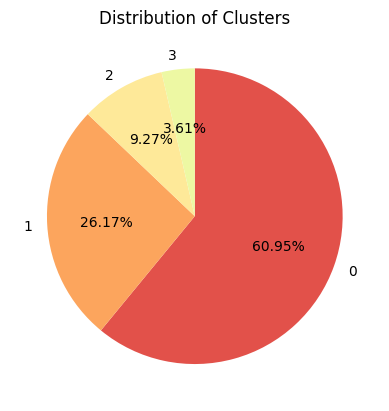

In [ ]:
# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()

# Create a pie chart to visualize the distribution of clusters
plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.2f%%', colors=sns.color_palette('Spectral'), startangle=90, counterclock=False)
plt.title('Distribution of Clusters')
plt.show()

### **7.6.2. Feature Importance for Clusters**

`selected_features = ['num_cuisines', 'online_order', 'book_table', 'ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']`

In [ ]:
mi_scores = {}

# Loop through selected features and calculate MI score
for feature in selected_features:
    mi_scores[feature] = mutual_info_score(foodiebay_ul[feature], foodiebay_ul['cluster'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the MI scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")

features, scores = zip(*sorted_scores)

online_order: 0.609
book_table: 0.384
votes: 0.346
ave_review_ranking: 0.280
ave_cost_for_two: 0.204
rate: 0.129
num_cuisines: 0.031


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


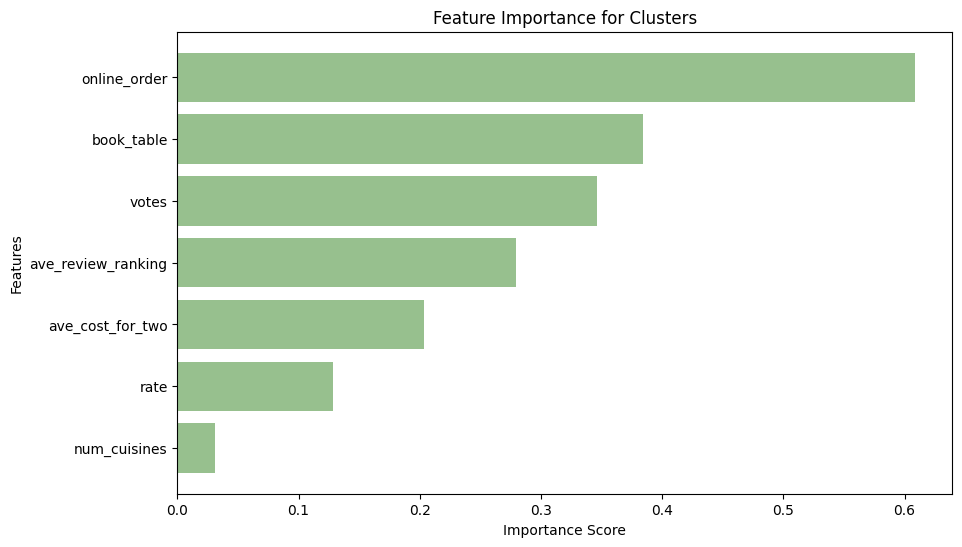

In [ ]:
# Create a bar plot to visualize the feature importance for clusters
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='#97C08E')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Clusters')
plt.gca().invert_yaxis()
plt.show()

### **7.6.3. Examine Clusters vs. Each of Other Variables**

**Clusters vs. Numerical Variables**

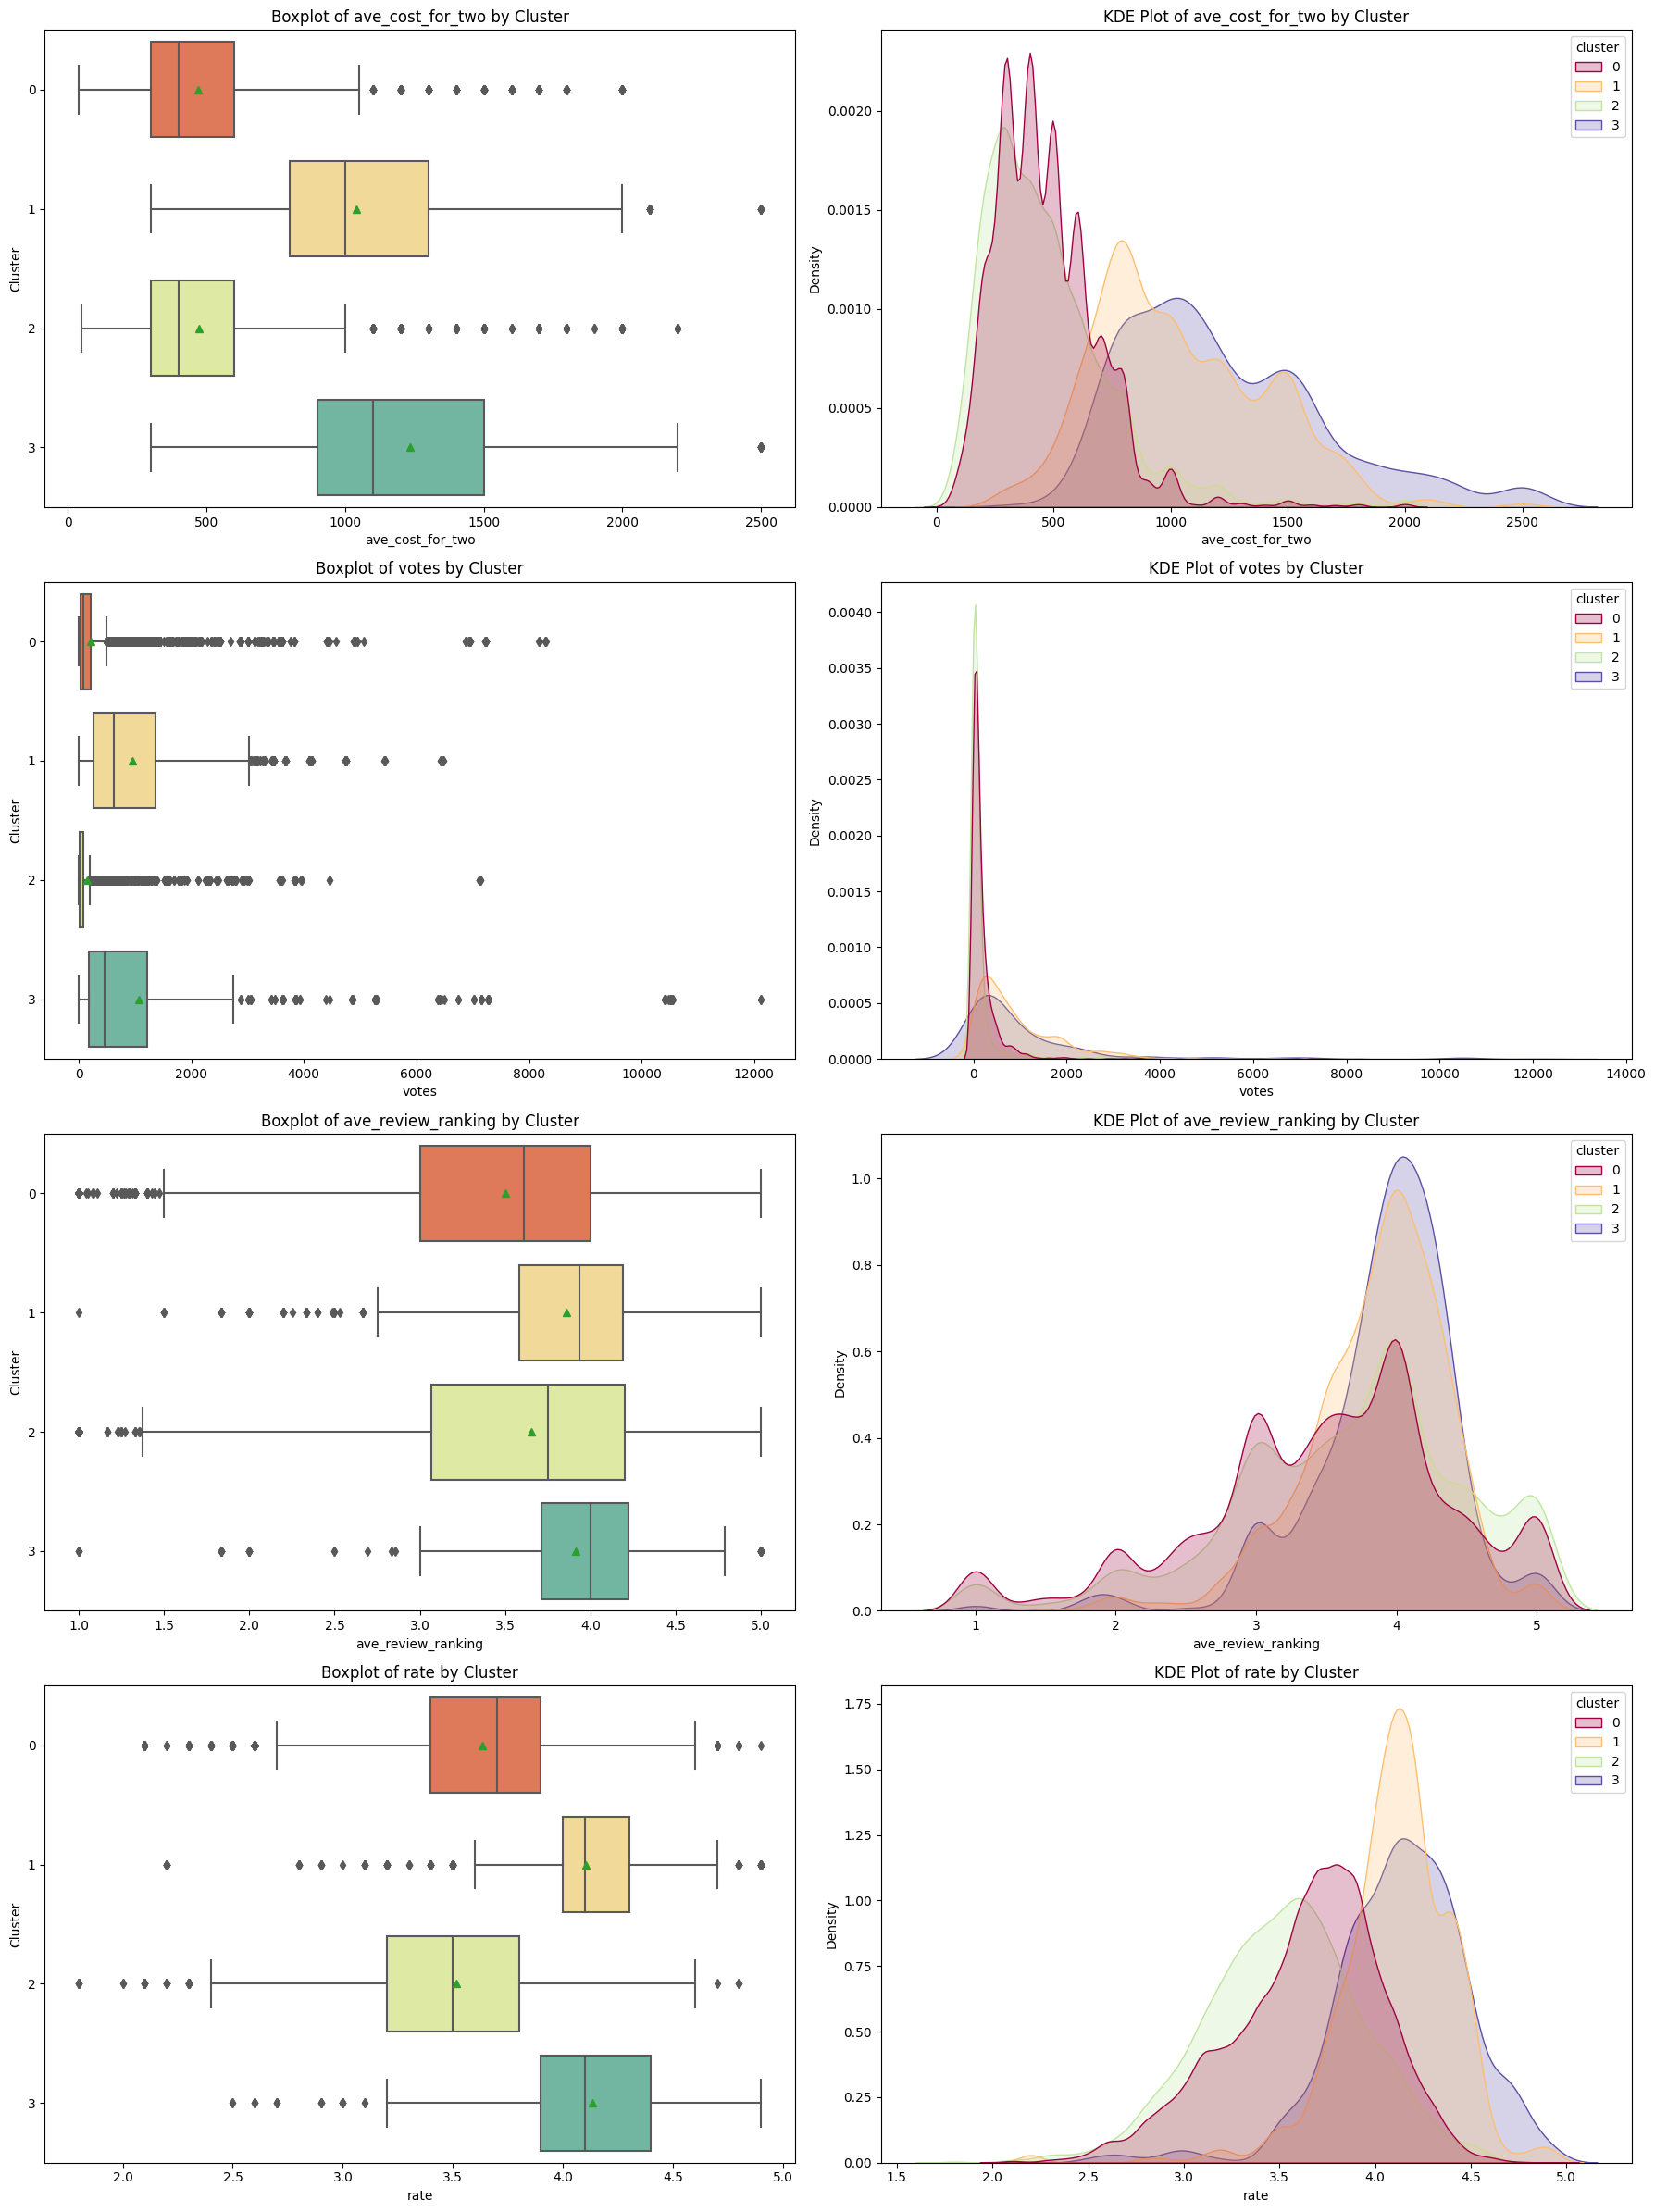

In [ ]:
# List of continuous variables to visualize
continuous_vars = ['ave_cost_for_two', 'votes', 'ave_review_ranking', 'rate']

# Create a 1x2 grid of subplots for each variable
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(18, 6*len(continuous_vars)))

# Loop through each variable
for i, var in enumerate(continuous_vars):
    # Plot the boxplot of the variable by 'cluster'
    sns.boxplot(data=foodiebay_ul, x=var, y='cluster', showmeans=True, palette='Spectral', orient='h', ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {var} by Cluster')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Cluster')

    # Plot the KDE plot of the variable by 'cluster'
    sns.kdeplot(data=foodiebay_ul, x=var, hue='cluster', palette='Spectral', fill=True, common_norm=False, ax=axes[i, 1])
    axes[i, 1].set_title(f'KDE Plot of {var} by Cluster')
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel('Density')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Observation from boxplots and KDE plots above:

* Cluster 0:
 * Vote: low
 * Review Ranking: low
 * Rate: low

* Cluster 1:
 * Vote: high
 * Review Ranking: high
 * Rate: high

* Cluster 2:
 * Vote: low
 * Review Ranking: low
 * Rate: low

* Cluster 3:
 * Vote: high
 * Review Ranking: high
 * Rate: high

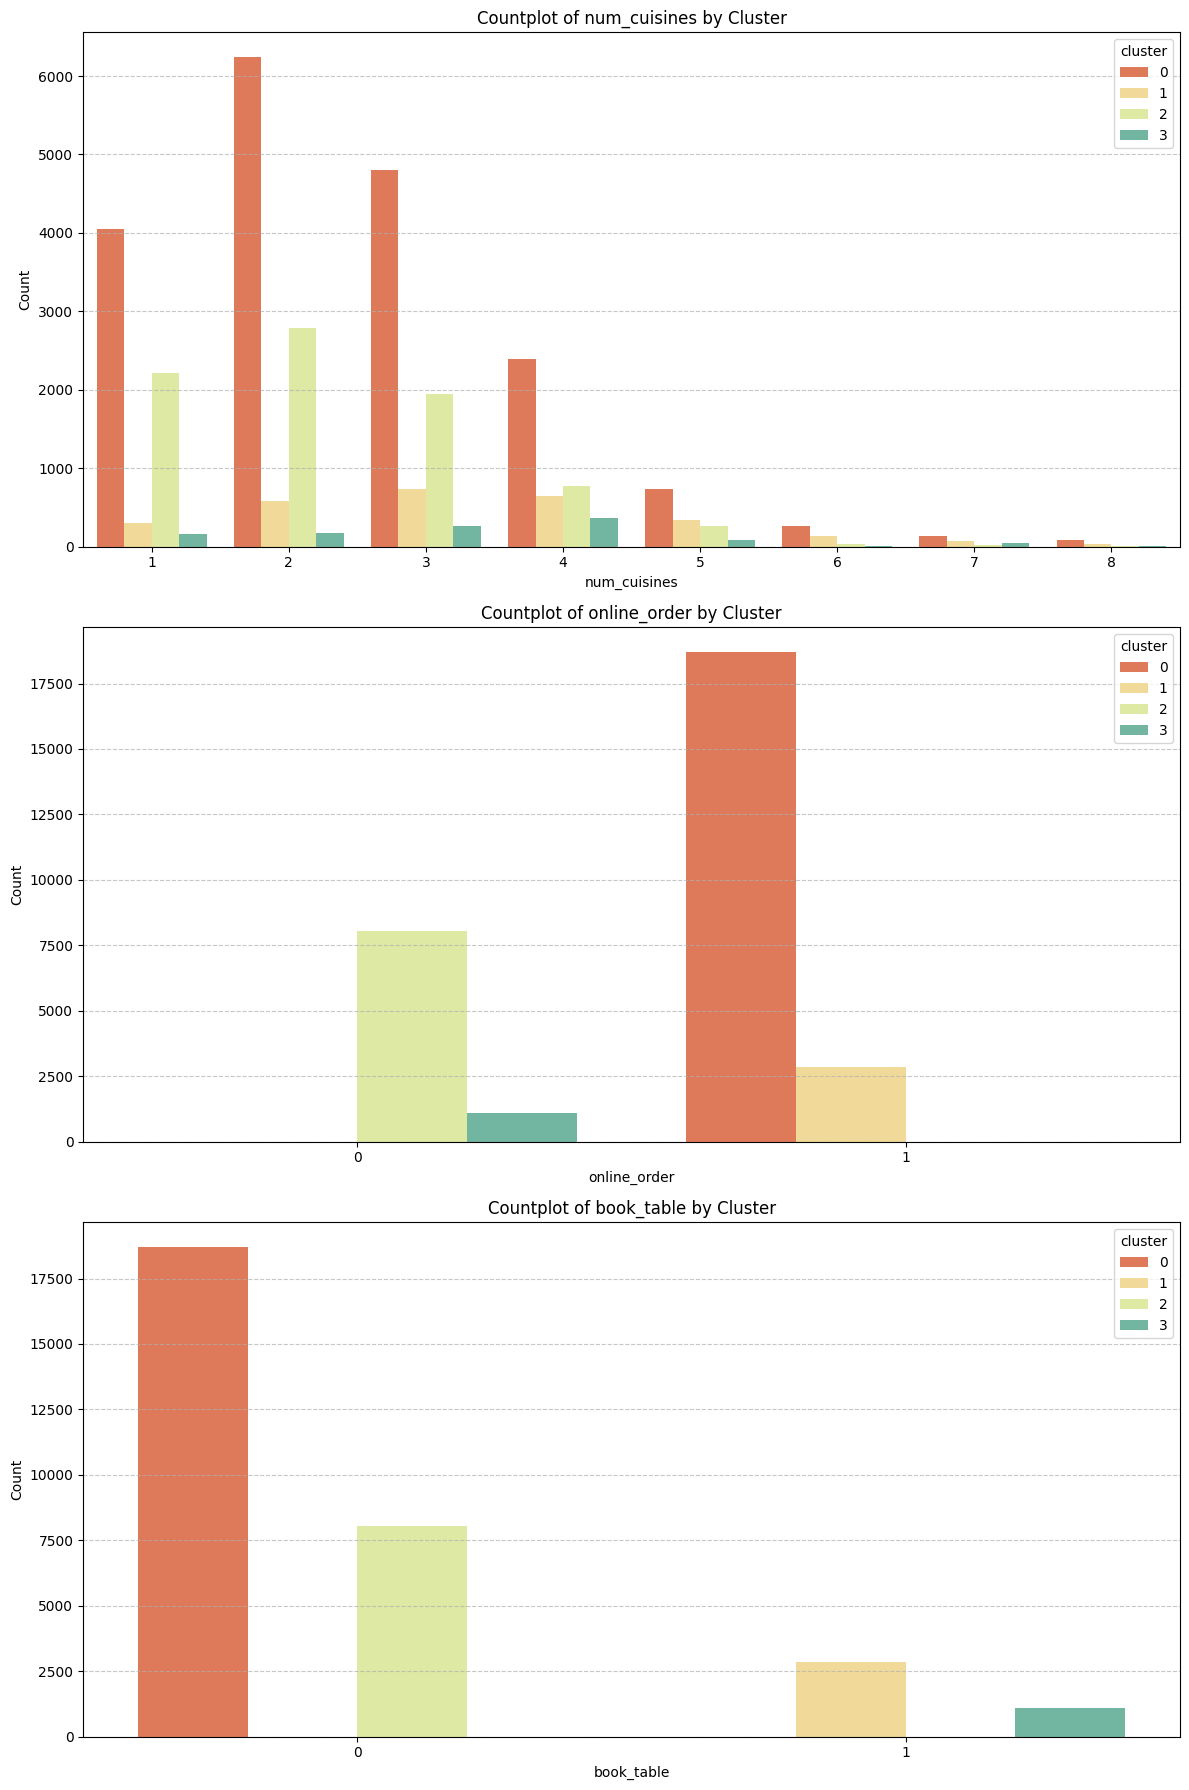

In [ ]:
# List of discrete variables to visualize
discrete_vars = ['num_cuisines', 'online_order', 'book_table']

# Create a grid of subplots
fig, axes = plt.subplots(len(discrete_vars), 1, figsize=(12, 6*len(discrete_vars)))

# Loop through each discrete variable
for i, var in enumerate(discrete_vars):
    # Create a countplot for the variable by 'cluster'
    sns.countplot(data=foodiebay_ul, x=var, hue='cluster', palette='Spectral', ax=axes[i])
    axes[i].set_title(f'Countplot of {var} by Cluster')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    # Add gridlines to the y-axis
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # adjust layout to prevent overlapping
plt.show()

Observation from countplots above:

* Cluster 0:
 * Online order: yes
 * Table booking: no

* Cluster 1:
 * Online order: yes
 * Table booking: yes

* Cluster 2:
 * Online order: no
 * Table booking: no

* Cluster 3:
 * Online order: no
 * Table booking: yes

**Clusters vs. Categorical Variables**

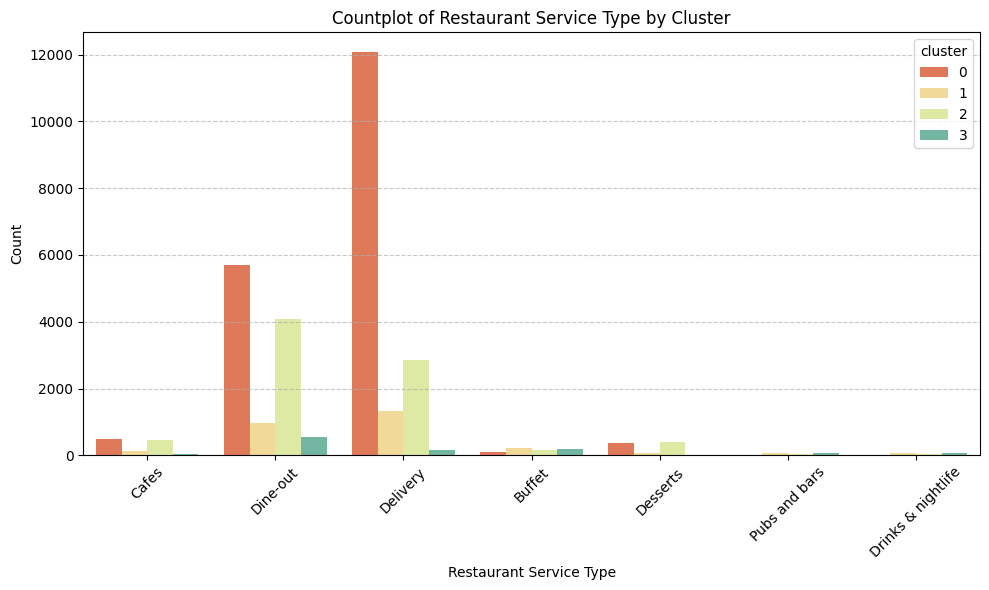

In [ ]:
# Create a countplot for 'listed_in_type' by 'cluster'
plt.figure(figsize=(10, 6))
sns.countplot(data=foodiebay_ul, x='listed_in_type', hue='cluster', palette='Spectral')
plt.title('Countplot of Restaurant Service Type by Cluster')
plt.xlabel('Restaurant Service Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

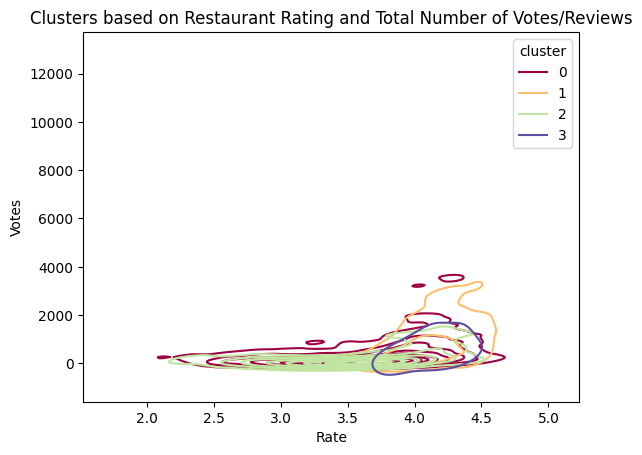

In [ ]:
# Create the KDE plot for the records
sns.kdeplot(data=foodiebay_ul, x='rate', y='votes', hue='cluster', palette='Spectral', legend='full')

# Settthe title and labels
plt.title('Clusters based on Restaurant Rating and Total Number of Votes/Reviews')
plt.xlabel('Rate')
plt.ylabel('Votes')

plt.show()

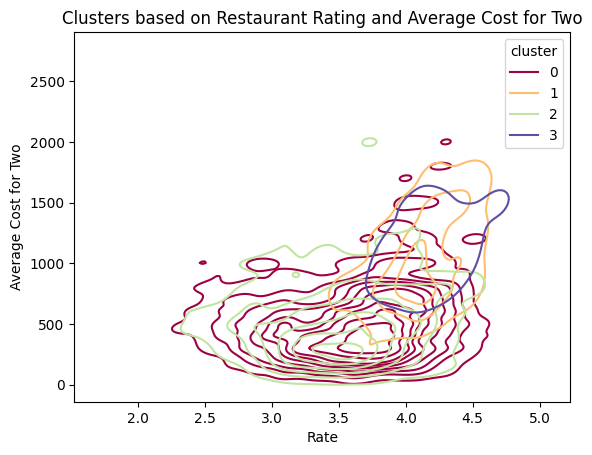

In [ ]:
# Create the KDE plot for the records
sns.kdeplot(data=foodiebay_ul, x='rate', y='ave_cost_for_two', hue='cluster', palette='Spectral', legend='full')

# Set the title and labels
plt.title('Clusters based on Restaurant Rating and Average Cost for Two')
plt.xlabel('Rate')
plt.ylabel('Average Cost for Two')

plt.show()

## **7.7. Label Clusters**

### **7.7.1. Inspect Features of Interest**

In [ ]:
foodiebay_ul.groupby('cluster').votes.describe()

count    mean     std  min    25%    50%     75%      max
cluster                                                             
0       18711.00  207.25  463.02 0.00  25.00  74.00  213.00  8304.00
1        2846.00  947.49  938.58 0.00 258.25 626.00 1370.00  6470.00
2        8033.00  147.21  462.77 0.00  11.00  27.00   83.00  7137.00
3        1109.00 1075.66 1707.24 8.00 176.00 466.00 1214.00 12121.00

In [ ]:
foodiebay_ul.groupby('cluster').ave_cost_for_two.describe()

count    mean    std    min    25%     50%     75%     max
cluster                                                              
0       18711.00  469.67 226.03  40.00 300.00  400.00  600.00 2000.00
1        2846.00 1040.09 364.71 300.00 800.00 1000.00 1300.00 2500.00
2        8033.00  472.45 284.84  50.00 300.00  400.00  600.00 2200.00
3        1109.00 1233.27 433.70 300.00 900.00 1100.00 1500.00 2500.00

In [ ]:
foodiebay_ul.groupby('cluster').rate.describe()

count  mean  std  min  25%  50%  75%  max
cluster                                             
0       18711.00  3.63 0.40 2.10 3.40 3.70 3.90 4.90
1        2846.00  4.10 0.31 2.20 4.00 4.10 4.30 4.90
2        8033.00  3.52 0.41 1.80 3.20 3.50 3.80 4.80
3        1109.00  4.13 0.35 2.50 3.90 4.10 4.40 4.90

**Observations:**

* Cluster 0:

 * No Table Booking
 * Moderate Votes
 * Moderate Cost
 * Moderate Rating

* Cluster 1:

 * Table Booking Available
 * High Votes
 * High Cost
 * High Rating

* Cluster 2:

 * No Table Booking
 * Low Votes
 * Moderate Cost
 * Low Rating

* Cluster 3:

 * Table Booking Available
 * Low Votes
 * High Cost
 * High Rating

### **7.7.2. Label Clusters**

**Technical:**

* Cluster 0: No Table Booking, Moderate Votes, Moderate Cost, Moderate Rating

* Cluster 1: Table Booking Available, High Votes, High Cost, High Rating

* Cluster 2: No Table Booking, Low Votes, Moderate Cost, Low Rating

* Cluster 3: Table Booking Available, Low Votes, High Cost, High Rating

**Business:**

* Convenience Eateries (Cluster 0):

 * Description: Restaurants that offer convenience with moderate popularity and pricing.

* Fine Dining Destinations (Cluster 1):

 * Description: Upscale dining establishments known for their high popularity, premium pricing, and excellent ratings.

* Local Favorites (Cluster 2):

 * Description: Neighborhood eateries with lower popularity, affordable pricing, and moderate ratings.

* Gourmet Experiences (Cluster 3):

 * Description: Exclusive dining venues offering gourmet experiences, albeit with lower popularity and premium pricing.

In [ ]:
foodiebay_ul

listed_in_city listed_in_type                               cuisines  num_cuisines                                         dish_liked  num_dishes_liked  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate  cluster
0                   JP Nagar          Cafes                                   Cafe             1                                               None                 0             0           0            700.00     13                4.75  3.60        2
1      Koramangala 5th Block       Dine-out         Burger, Continental, Fast Food             3                                               None                 0             1           0            400.00     28                4.50  3.80        0
2                  Jayanagar       Delivery             South Indian, Healthy Food             2                                               None                 0             1           0            200.00     18                4.00  3.90        0
3               Brigade Road       Delivery  Chinese, North Indian, Biryani, Kebab             4  Fish, Dumplings, Biryani, Paneer Tikka Masala,...                 7             1           1           1200.00    550                4.80  4.30        1
4               New BEL Road       Dine-out                              Cafe, Tea             2  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...                 5             1           0            250.00     67                3.00  3.70        0
...                      ...            ...                                    ...           ...                                                ...               ...           ...         ...               ...    ...                 ...   ...      ...
30694       Old Airport Road       Dine-out     Continental, Chinese, North Indian             3                                    Cocktails, Beer                 2             0           1           1000.00    200                3.00  3.80        3
30695           Kammanahalli       Delivery                       Desserts, Bakery             2                                               None                 0             1           0            500.00     23                3.45  3.60        0
30696                MG Road       Delivery   Street Food, Beverages, North Indian             3                                               None                 0             0           0            300.00     23                3.45  3.10        2
30697              Bellandur       Delivery           Arabian, BBQ, Rolls, Chinese             4  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...                 6             1           0            500.00    162                3.50  4.00        0
30698           Brigade Road       Delivery              Fast Food, Biryani, Rolls             3             Rolls, Chicken Tikka Roll, Cheese Roll                 3             1           0            350.00    163                3.25  3.10        0

[30699 rows x 13 columns]

In [ ]:
# Assign labels to restaurants based on inspection
cluster_labels_tech = {
    0: "No Table Booking, Moderate Votes, Moderate Cost, Moderate Rating",
    1: "Table Booking Available, High Votes, High Cost, High Rating",
    2: "No Table Booking, Low Votes, Moderate Cost, Low Rating",
    3: "Table Booking Available, Low Votes, High Cost, High Rating",
}

foodiebay_ul['restaurant_label_tech'] = foodiebay_ul['cluster'].map(cluster_labels_tech) # create a new column 'restaurant_label_tech' based on the cluster labels

In [ ]:
# Assign labels to restaurants based on inspection
cluster_labels_biz = {
    0: "Convenience Eateries",
    1: "Fine Dining Destinations",
    2: "Local Favorites",
    3: "Gourmet Experiences",
}

foodiebay_ul['restaurant_label_biz'] = foodiebay_ul['cluster'].map(cluster_labels_biz) # create a new column 'restaurant_label_biz' based on the cluster labels

In [ ]:
foodiebay_ul

listed_in_city listed_in_type                               cuisines  num_cuisines                                         dish_liked  num_dishes_liked  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate  cluster                              restaurant_label_tech      restaurant_label_biz
0                   JP Nagar          Cafes                                   Cafe             1                                               None                 0             0           0            700.00     13                4.75  3.60        2  No Table Booking, Low Votes, Moderate Cost, Lo...           Local Favorites
1      Koramangala 5th Block       Dine-out         Burger, Continental, Fast Food             3                                               None                 0             1           0            400.00     28                4.50  3.80        0  No Table Booking, Moderate Votes, Moderate Cos...      Convenience Eateries
2                  Jayanagar       Delivery             South Indian, Healthy Food             2                                               None                 0             1           0            200.00     18                4.00  3.90        0  No Table Booking, Moderate Votes, Moderate Cos...      Convenience Eateries
3               Brigade Road       Delivery  Chinese, North Indian, Biryani, Kebab             4  Fish, Dumplings, Biryani, Paneer Tikka Masala,...                 7             1           1           1200.00    550                4.80  4.30        1  Table Booking Available, High Votes, High Cost...  Fine Dining Destinations
4               New BEL Road       Dine-out                              Cafe, Tea             2  Ginger Chai, Pakoda, Tea, Paneer Thali, Chole ...                 5             1           0            250.00     67                3.00  3.70        0  No Table Booking, Moderate Votes, Moderate Cos...      Convenience Eateries
...                      ...            ...                                    ...           ...                                                ...               ...           ...         ...               ...    ...                 ...   ...      ...                                                ...                       ...
30694       Old Airport Road       Dine-out     Continental, Chinese, North Indian             3                                    Cocktails, Beer                 2             0           1           1000.00    200                3.00  3.80        3  Table Booking Available, Low Votes, High Cost,...       Gourmet Experiences
30695           Kammanahalli       Delivery                       Desserts, Bakery             2                                               None                 0             1           0            500.00     23                3.45  3.60        0  No Table Booking, Moderate Votes, Moderate Cos...      Convenience Eateries
30696                MG Road       Delivery   Street Food, Beverages, North Indian             3                                               None                 0             0           0            300.00     23                3.45  3.10        2  No Table Booking, Low Votes, Moderate Cost, Lo...           Local Favorites
30697              Bellandur       Delivery           Arabian, BBQ, Rolls, Chinese             4  Pita Bread, Rolls, Shawarma Roll, Lebanese Sha...                 6             1           0            500.00    162                3.50  4.00        0  No Table Booking, Moderate Votes, Moderate Cos...      Convenience Eateries
30698           Brigade Road       Delivery              Fast Food, Biryani, Rolls             3             Rolls, Chicken Tikka Roll, Cheese Roll                 3             1           0            350.00    163                3.25  3.10        0  No Table Booking, Moderate Votes, Moderate Cos...      Convenience Eateries

[30699 rows x 15 columns]

### **7.7.3. Finalize Output**

**Technical**

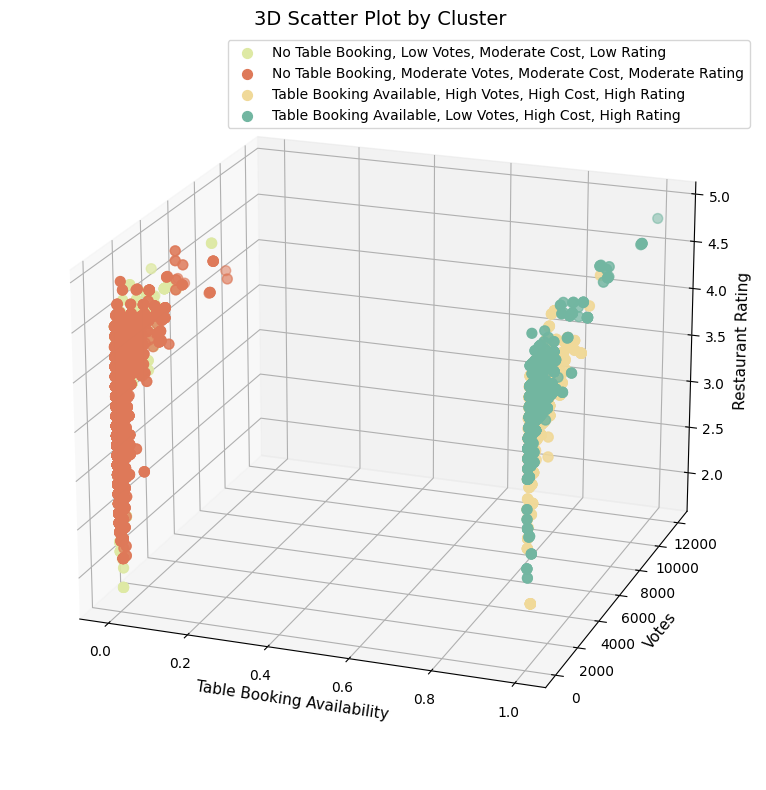

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a dictionary to map cluster labels to colors
cluster_colors = {0: '#DE7959',
                  1: '#F0D999',
                  2: '#DEE9A4',
                  3: '#72B6A1'}

# Loop through each cluster and create a scatter plot for each
for cluster_label in foodiebay_ul['cluster'].unique():
    cluster_data = foodiebay_ul[foodiebay_ul['cluster'] == cluster_label]
    ax.scatter(
        cluster_data['book_table'],                    # X-axis
        cluster_data['votes'],                         # Y-axis
        cluster_data['rate'],                          # Z-axis
        c=cluster_colors[cluster_label],               # Use different colors for each cluster
        marker='o',                                    # Marker type (circle)
        s=50,                                          # Marker size
        label=f'{cluster_labels_tech[cluster_label]}'  # Label by cluster based on 'restaurant_label_tech' - retrieve the technical label for the current cluster
    )

# Add labels to axes
ax.set_xlabel('Table Booking Availability', fontsize=11)
ax.set_ylabel('Votes', fontsize=11)
ax.set_zlabel('Restaurant Rating', fontsize=11)

# Set plot title and adjust font size
plt.title('3D Scatter Plot by Cluster ', fontsize=14)

# Add a legend to label cluster colors
ax.legend(loc='upper right')

# Adjust the viewing angle for better visibility
ax.view_init(elev=20, azim=-70)

plt.tight_layout()
plt.show()

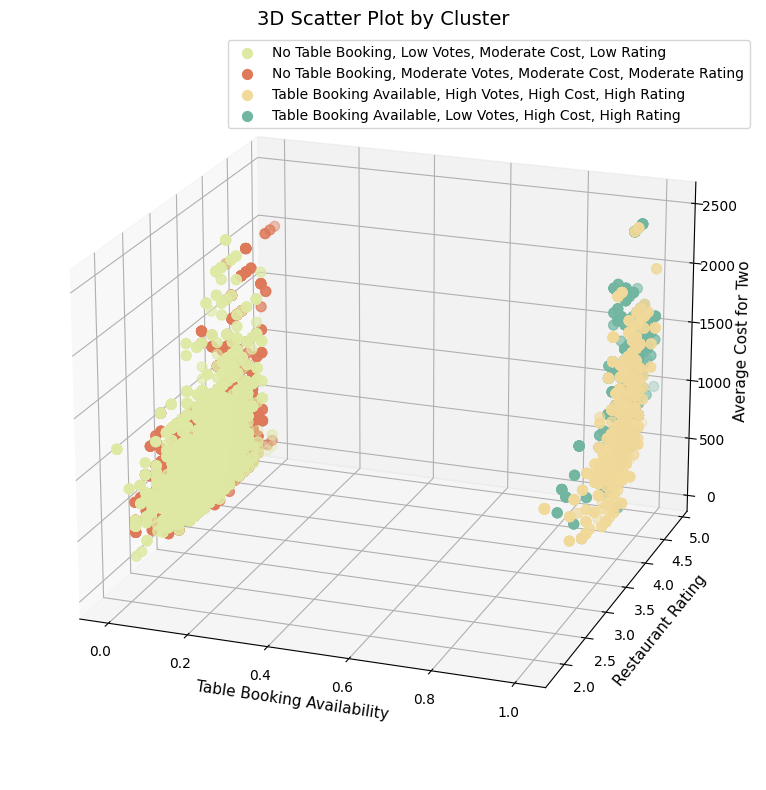

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a dictionary to map cluster labels to colors
cluster_colors = {0: '#DE7959',
                  1: '#F0D999',
                  2: '#DEE9A4',
                  3: '#72B6A1'}

# Loop through each cluster and create a scatter plot for each
for cluster_label in foodiebay_ul['cluster'].unique():
    cluster_data = foodiebay_ul[foodiebay_ul['cluster'] == cluster_label]
    ax.scatter(
        cluster_data['book_table'],                    # X-axis
        cluster_data['rate'],                          # Y-axis
        cluster_data['ave_cost_for_two'],              # Z-axis
        c=cluster_colors[cluster_label],               # Use different colors for each cluster
        marker='o',                                    # Marker type (circle)
        s=50,                                          # Marker size
        label=f'{cluster_labels_tech[cluster_label]}'  # Label by cluster based on 'restaurant_label_tech'
    )

# Add labels to axes
ax.set_xlabel('Table Booking Availability', fontsize=11)
ax.set_ylabel('Restaurant Rating', fontsize=11)
ax.set_zlabel('Average Cost for Two', fontsize=11)

# Set plot title and adjust font size
plt.title('3D Scatter Plot by Cluster', fontsize=14)

# Add a legend to label cluster colors
ax.legend(loc='upper right')

# Adjust the viewing angle for better visibility
ax.view_init(elev=20, azim=-70)

plt.tight_layout()
plt.show()

**Business**

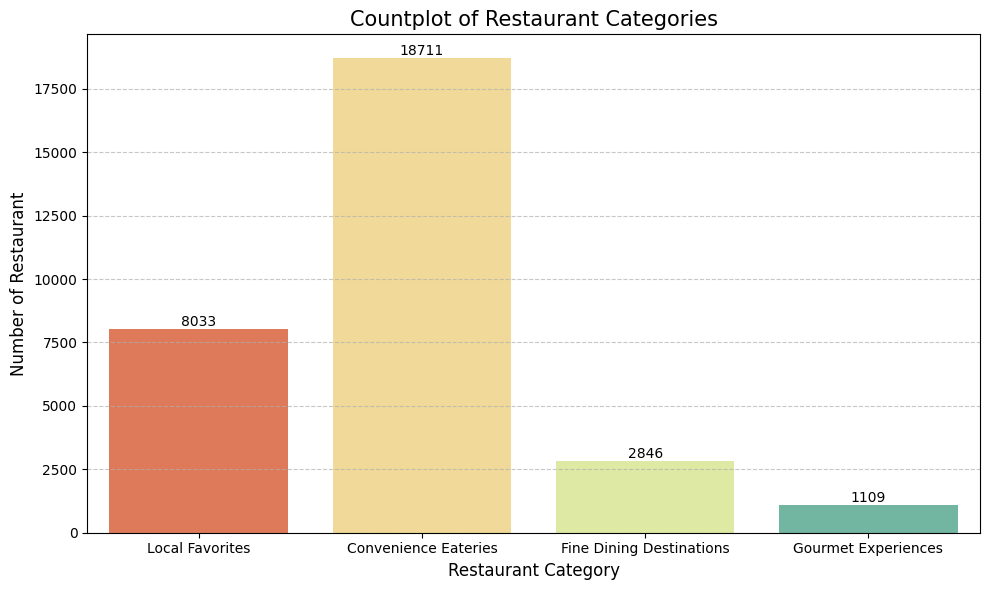

In [ ]:
# Create a countplot for 'restaurant_label_biz'
plt.figure(figsize=(10, 6))
sns.countplot(data=foodiebay_ul, x='restaurant_label_biz', palette='Spectral')

# Add count labels on top of the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)

# Set plot title and labels
plt.title("Countplot of Restaurant Categories", fontsize=15)
plt.xlabel("Restaurant Category", fontsize=12)
plt.ylabel("Number of Restaurant", fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()

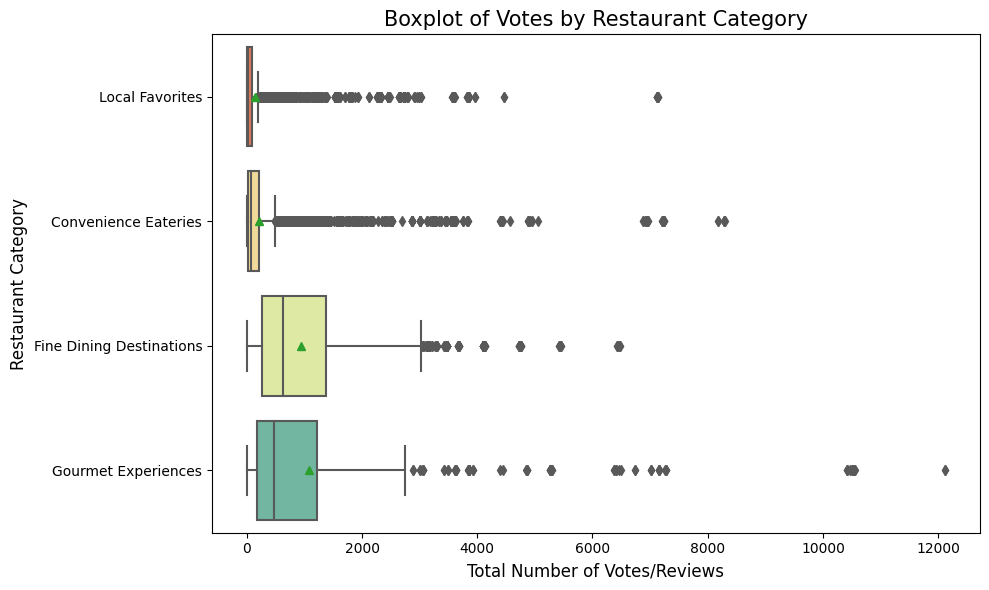

In [ ]:
# Create a horizontal boxplot for 'votes' by 'restaurant_label_biz'
plt.figure(figsize=(10, 6))
sns.boxplot(data=foodiebay_ul, y='restaurant_label_biz', x='votes', showmeans=True, palette='Spectral')
plt.title('Boxplot of Votes by Restaurant Category', fontsize=15)
plt.xlabel('Total Number of Votes/Reviews', fontsize=12)
plt.ylabel('Restaurant Category', fontsize=12)

plt.tight_layout()
plt.show()

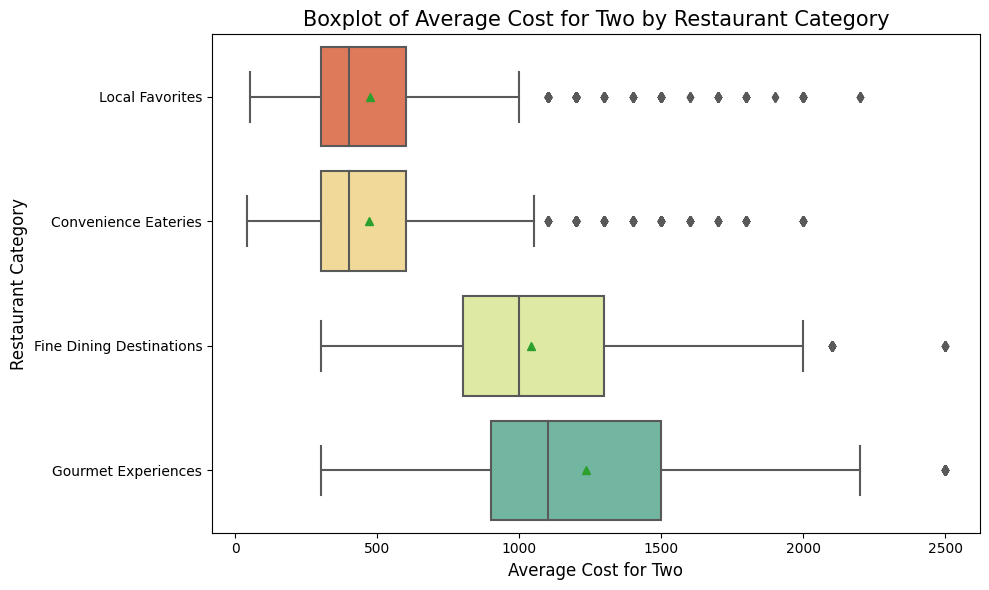

In [ ]:
# Create a horizontal boxplot for 'ave_cost_for_two' by 'restaurant_label_biz'
plt.figure(figsize=(10, 6))
sns.boxplot(data=foodiebay_ul, y='restaurant_label_biz', x='ave_cost_for_two', showmeans=True, palette='Spectral')
plt.title('Boxplot of Average Cost for Two by Restaurant Category', fontsize=15)
plt.xlabel('Average Cost for Two', fontsize=12)
plt.ylabel('Restaurant Category', fontsize=12)

plt.tight_layout()
plt.show()


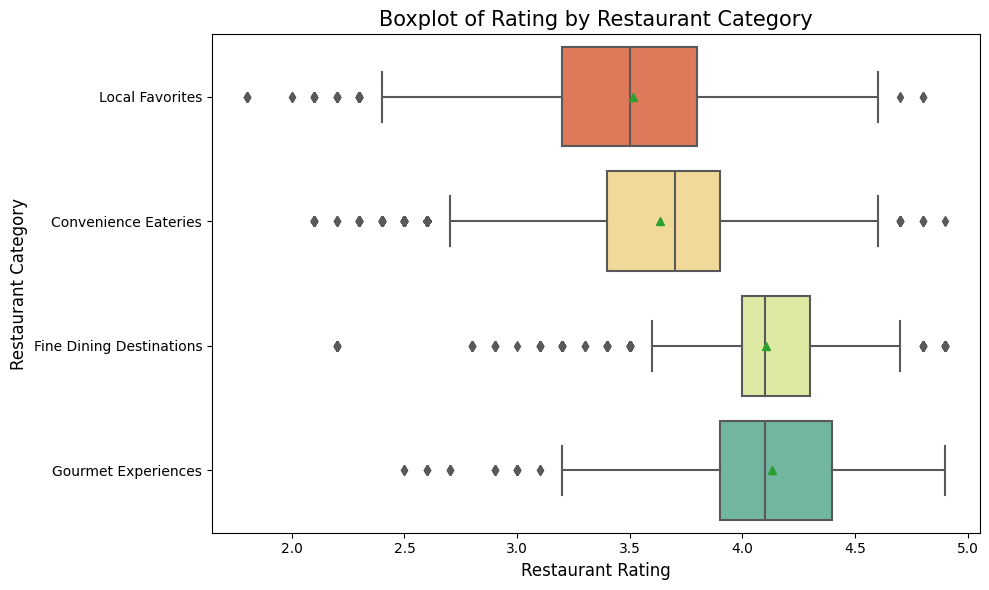

In [ ]:
# Create a horizontal boxplot for 'rate' by 'restaurant_label_biz'
plt.figure(figsize=(10, 6))
sns.boxplot(data=foodiebay_ul, y='restaurant_label_biz', x='rate', showmeans=True, palette='Spectral')
plt.title('Boxplot of Rating by Restaurant Category', fontsize=15)
plt.xlabel('Restaurant Rating', fontsize=12)
plt.ylabel('Restaurant Category', fontsize=12)

plt.tight_layout()
plt.show()